In [1]:
import pandas as pd
import os
import json
import pywer
# !pip install pyjarowinkler
from pyjarowinkler import distance as jwdistance

class Const:
    OCR = 'ocr'
    GROUND = 'groundtruth'
    REGION = 'region'
    LINE = 'line'
    SENTENCE = 'sentence'
    FILE = 'filename'
    DATASET = 'dataset_name'
    PREDICTION = 'prediction'
    PROMPT = 'prompt'
    LANGUAGE = 'language'
    NONE = None


In [7]:
datasets = []

for root, dirs, files in os.walk('../data/datasets/ocr/converted'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            if 'sample' not in input_file:
                with open(input_file) as f:
                    lines = f.read().splitlines()
                df_inter = pd.DataFrame(lines)
                df_inter.columns = ['json_element']
                df_inter['json_element'].apply(json.loads)
                df = pd.json_normalize(df_inter['json_element'].apply(json.loads))

                dataset_name = root.split('/')[-1].replace('_', '-')
                print(input_file, dataset_name)
                df['dataset_name'] = [dataset_name] * len(df)
                if 'ajmc' in dataset_name:
                    df['language'] = ['el'] * len(df)
                if 'overproof' in dataset_name:
                    df['language'] = ['en'] * len(df)
                if 'impresso' in dataset_name:
                    df['language'] = ['de'] * len(df)
                    
                datasets.append(df)
            

../data/datasets/ocr/converted/ajmc-mixed/ajmc_mixed.jsonl ajmc-mixed
../data/datasets/ocr/converted/overproof/overproof.jsonl overproof
../data/datasets/ocr/converted/icdar-2019/icdar-2019.jsonl icdar-2019
../data/datasets/ocr/converted/icdar-2017/icdar-2017.jsonl icdar-2017
../data/datasets/ocr/converted/impresso/impresso-nzz.jsonl impresso
../data/datasets/ocr/converted/ajmc-primary/ajmc_primary_text.jsonl ajmc-primary


In [8]:
print('Number of unique lines/sentences/regions.\n')
for dataset in datasets:
    print('Dataset:', dataset['dataset_name'].unique()[0], len(dataset), 'with duplicates')
    print('No. lines:', dataset['ocr.line']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. sentences:', dataset['ocr.sentence']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. regions:', dataset['ocr.region']. nunique(), '/', len(dataset['ocr.region']))
    print('-'*80)

Number of unique lines/sentences/regions.

Dataset: ajmc-mixed 2131 with duplicates
No. lines: 870 / 2131 No. sentences: 679 / 2131 No. regions: 63 / 2131
--------------------------------------------------------------------------------
Dataset: overproof 2669 with duplicates
No. lines: 2278 / 2669 No. sentences: 399 / 2669 No. regions: 41 / 2669
--------------------------------------------------------------------------------
Dataset: icdar-2019 404 with duplicates
No. lines: 0 / 404 No. sentences: 404 / 404 No. regions: 41 / 404
--------------------------------------------------------------------------------
Dataset: icdar-2017 477 with duplicates
No. lines: 0 / 477 No. sentences: 461 / 477 No. regions: 28 / 477
--------------------------------------------------------------------------------
Dataset: impresso 6140 with duplicates
No. lines: 3709 / 6140 No. sentences: 1943 / 6140 No. regions: 635 / 6140
--------------------------------------------------------------------------------
Dat

In [293]:
dataset = pd.concat(datasets)

In [294]:
dataset.head()


filename dataset_name  \
0  bsb10234118   ajmc-mixed   
1  bsb10234118   ajmc-mixed   
2  bsb10234118   ajmc-mixed   
3  bsb10234118   ajmc-mixed   
4  bsb10234118   ajmc-mixed   

                                            ocr.line  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...   
1  I. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...   
2  V. 9. Ἔνδον γὰρ ἀνήρ - Olim adnotavi articulum...   
3  δατος Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδ...   
4  xerit Sophocles χθονὸς ἀείρας et Oppian. Cyn. ...   

                              ocr.sentence  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.   
1                                  p. 731.   
2                                    V. 9.   
3                                     Lys.   
4                                     Cyn.   

                                          ocr.region  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
1  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
2  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
3  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
4  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   

                                    groundtruth.line  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...   
1  1. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...   
2  V. 9. "Evdov γὰρ ‘arıjg — Olim adnotavi articu...   
3  durog Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδα...   
4  xerit Sophocles χθονὸς deigag et Oppian. Cyn. ...   

                      groundtruth.sentence  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.   
1                                  p. 731.   
2                                    V. 9.   
3                                     Lys.   
4                                     Cyn.   

                                  groundtruth.region language article_id File  \
0  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...       el        NaN  NaN   
1  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...       el        NaN  NaN   
2  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...       el        NaN  NaN   
3  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...       el        NaN  NaN   
4  ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...       el        NaN  NaN   

  Date Type NbAlignedChar  
0  NaN  NaN           NaN  
1  NaN  NaN           NaN  
2  NaN  NaN           NaN  
3  NaN  NaN           NaN  
4  NaN  NaN           NaN

In [295]:
dataset['language'].unique()

array(['el', 'en', 'fr', 'pl', 'de', 'cz', 'sl', 'bg', 'es',
       'icdar2017_datasetpostocr_evaluation_2m_v1.2'], dtype=object)

In [296]:
dataset[dataset['language'].isnull()]

Empty DataFrame
Columns: [filename, dataset_name, ocr.line, ocr.sentence, ocr.region, groundtruth.line, groundtruth.sentence, groundtruth.region, language, article_id, File, Date, Type, NbAlignedChar]
Index: []

In [297]:
# GENERATE_SAMPLE = False

# if GENERATE_SAMPLE:
#     from sklearn.model_selection import train_test_split

#     files_keep, files_removed, _, _ = train_test_split(dataset, dataset['dataset_name'], 
#                                                        test_size=0.90, random_state=42)
    
# if GENERATE_SAMPLE:
#     output_file = '../data/datasets/ocr/converted/sample/sample.jsonl'
#     with open(output_file, "w") as outfile:
#         for index, row in files_keep.iterrows():

#             json_line = json.dumps({Const.LANGUAGE: row['language'],
#                                     Const.FILE: row['filename'],
#                                     Const.DATASET: row['dataset_name'],
#                                     Const.OCR: {Const.LINE: row['ocr.line'],
#                                                 Const.SENTENCE: row['ocr.sentence'],
#                                                 Const.REGION: row['ocr.region']}, 
#                                     Const.GROUND: {Const.LINE: row['groundtruth.line'],
#                                                    Const.SENTENCE: row['groundtruth.sentence'],
#                                                    Const.REGION: row['groundtruth.region']},
#                                     'File': row['File'], 
#                                     'Date': row['Date'],
#                                     'Type': row['Type'], 
#                                     'NbAlignedChar': row['NbAlignedChar'], 
#                                     'article_id': row['article_id']
#                                     })

#             outfile.write(json_line + "\n")
#             outfile.flush()
            
            


### Analsys of preliminary results

In [325]:
results = []

for root, dirs, files in os.walk('../data/output'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            
            if 'sample' not in input_file:

                with open(input_file) as f:
                    lines = f.read().splitlines()
                try:
                    df_inter = pd.DataFrame(lines)
                    df_inter.columns = ['json_element']

                    dataset_name = root.split('/')[-1].replace('_', '-')
                    model_dataset_name = file[8:-6]
                    model_name = model_dataset_name.replace(root.split('/')[-1] + '-', '').strip()
                    
                    df_inter['json_element'].apply(json.loads)
                    df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
                    
                    df['model'] = [model_name] * len(df)
                    
                    print(root.split('/')[-1], dataset_name, model_name)
                    
                    df['dataset_name'] = [dataset_name] * len(df)
                    results.append(df)
                except:
                    print('We could not load {}'.format(file))

impresso-nzz impresso-nzz gpt-4
impresso-nzz impresso-nzz gpt-3.5-turbo
overproof overproof davinci
overproof overproof gpt-4
overproof overproof gpt-3.5-turbo
overproof overproof gpt2
overproof overproof facebook-opt-350m
overproof overproof decapoda-research-llama-7b-hf
overproof overproof bigscience-bloom-560m
htrec htrec gpt-4
htrec htrec tloen-alpaca-lora-7b
htrec htrec bigscience-bloom-560m
htrec htrec facebook-opt-350m
htrec htrec gpt-3.5-turbo
htrec htrec davinci
htrec htrec gpt2
htrec htrec decapoda-research-llama-7b-hf
ajmc_mixed ajmc-mixed decapoda-research-llama-7b-hf
ajmc_mixed ajmc-mixed bigscience-bloom-560m
ajmc_mixed ajmc-mixed gpt2
ajmc_mixed ajmc-mixed facebook-opt-350m
ajmc_mixed ajmc-mixed gpt-4
ajmc_mixed ajmc-mixed davinci
ajmc_mixed ajmc-mixed gpt-3.5-turbo
icdar-2019 icdar-2019 gpt2
icdar-2019 icdar-2019 bigscience-bloom-560m
icdar-2019 icdar-2019 decapoda-research-llama-7b-hf
icdar-2019 icdar-2019 facebook-opt-350m
icdar-2019 icdar-2019 gpt-4
icdar-2019 icdar-

In [299]:
len(results)

45

In [300]:
results[0].head()

filename  dataset_name  \
0  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
1  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
2  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
3  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
4  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   

                                            ocr.line  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
2                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  bürg. — Italien; Rom, Turin, Genua. — Helvctie...   

                                        ocr.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
2                                                  |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4                      — Italien; Rom, Turin, Genua.   

                                          ocr.region  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
2                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                    groundtruth.line  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
2                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  burg. — Italien; Rom, Turin, Genua. — Helvetie...   

                                groundtruth.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
2                                                      
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4                      — Italien; Rom, Turin, Genua.   

                                  groundtruth.region  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
2                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                   prediction.prompt  \
0              Correct the text: "Züricher Zeitung."   
1                                                NaN   
2                              Correct the text: "|"   
3  Correct the text: "Freknkreich; (Unterwerfung ...   
4  Correct the text: "— Italien; Rom, Turin, Genua."   

                                     prediction.line  \
0                                   Zürcher Zeitung.   
1                                   Zürcher Zeitung.   
2                                   Zürcher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  Bürg. — Italien: Rom, Turin, Genua. — Helvetie...   

                                 prediction.sentence  \
0                                   Zürcher Zeitung.   
1                                   Zürcher Zeitung.   
2               There is no text provided to correct   
3  Frankreich (Unterwerfung einiger Chouans-Chefs...   
4                       - Italy: Rome, Turin, Genoa.   

                                   prediction.region  model  
0                                   Zürcher Zeitung.  gpt-4  
1                                   Zürcher Zeitung.  gpt-4  
2                                   Zürcher Zeitung.  gpt-4  
3  Frankreich; (Unterwerfung einiger Chouans-Chef...  gpt-4  
4  Frankreich; (Unterwerfung einiger Chouans-Chef...  gpt-4

## Post-process


    AJMC
    

In [320]:
data[data.dataset_name == 'icdar-2017']




filename dataset_name ocr.line  \
472  ../../data/datasets/ocr/original/icdar-2017/IC...   icdar-2017  No text   
473  ../../data/datasets/ocr/original/icdar-2017/IC...   icdar-2017  No text   
474  ../../data/datasets/ocr/original/icdar-2017/IC...   icdar-2017  No text   
475  ../../data/datasets/ocr/original/icdar-2017/IC...   icdar-2017  No text   
476  ../../data/datasets/ocr/original/icdar-2017/IC...   icdar-2017  No text   

                                          ocr.sentence  \
472  Then within a while after the Priour came unto...   
473  Anon he said unto him, what dost thou here, an...   
474  The young man with great reverence answered an...   
475  And sir if it please you to have me, I shall d...   
476    And when the Priour had heard his words, he was   

                                            ocr.region groundtruth.line  \
472  264 A PLEASANT HISTORIE good and well disposed...          No text   
473  264 A PLEASANT HISTORIE good and well disposed...          No text   
474  264 A PLEASANT HISTORIE good and well disposed...          No text   
475  264 A PLEASANT HISTORIE good and well disposed...          No text   
476  264 A PLEASANT HISTORIE good and well disposed...          No text   

                                  groundtruth.sentence  \
472  Then within a while after the Priour came unto...   
473  Anon he said unto him, what dost thou here, an...   
474  The young man with great reverence answered an...   
475  And sir if it please you to have me, I shall d...   
476    And when the Priour had heard his words, he was   

                                    groundtruth.region  \
472  and well disposed people, they spent in unthri...   
473  and well disposed people, they spent in unthri...   
474  and well disposed people, they spent in unthri...   
475  and well disposed people, they spent in unthri...   
476  and well disposed people, they spent in unthri...   

                                     prediction.prompt prediction.line  ...  \
472  Correct the text: "Then within a while after t...             NaN  ...   
473  Correct the text: "Anon he said unto him, what...             NaN  ...   
474  Correct the text: "The young man with great re...             NaN  ...   
475  Correct the text: "And sir if it please you to...             NaN  ...   
476  Correct the text: "And when the Priour had hea...             NaN  ...   

    region-cer-improvement region-wer-improvement region-ocr-noise-group  \
472              -0.049778               1.536508                90-100%   
473              -0.049778               1.536508                90-100%   
474              -0.049778               1.536508                90-100%   
475              -0.049778               1.536508                90-100%   
476              -0.049778               1.536508                90-100%   

     article_id  century                                     language  \
472         NaN      NaN  icdar2017_datasetpostocr_evaluation_2m_v1.2   
473         NaN      NaN  icdar2017_datasetpostocr_evaluation_2m_v1.2   
474         NaN      NaN  icdar2017_datasetpostocr_evaluation_2m_v1.2   
475         NaN      NaN  icdar2017_datasetpostocr_evaluation_2m_v1.2   
476         NaN      NaN  icdar2017_datasetpostocr_evaluation_2m_v1.2   

                     File  Date       Type  NbAlignedChar  
472  eng_monograph/36.txt  1858  monograph           1525  
473  eng_monograph/36.txt  1858  monograph           1525  
474  eng_monograph/36.txt  1858  monograph           1525  
475  eng_monograph/36.txt  1858  monograph           1525  
476  eng_monograph/36.txt  1858  monograph           1525  

[5 rows x 51 columns]

In [301]:
data.columns

Index(['filename', 'dataset_name', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'prediction.prompt', 'prediction.line', 'prediction.sentence',
       'prediction.region', 'model', 'length', 'line-lev-ocr', 'line-lev-pred',
       'line-lev-improvement', 'line-cer-ocr', 'line-cer-pred', 'line-wer-ocr',
       'line-wer-pred', 'line-cer-improvement', 'line-wer-improvement',
       'line-ocr-noise-group', 'sentence-lev-ocr', 'sentence-lev-pred',
       'sentence-lev-improvement', 'sentence-cer-ocr', 'sentence-cer-pred',
       'sentence-wer-ocr', 'sentence-wer-pred', 'sentence-cer-improvement',
       'sentence-wer-improvement', 'sentence-ocr-noise-group',
       'region-lev-ocr', 'region-lev-pred', 'region-lev-improvement',
       'region-cer-ocr', 'region-cer-pred', 'region-wer-ocr',
       'region-wer-pred', 'region-cer-improvement', 'region-wer-improvement',
       'region-ocr-noise-group', 'article_id', 'cen

In [302]:
data.head()

filename  dataset_name  \
0  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
1  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
3  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
4  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   
5  ../../data/datasets/ocr/original/impresso-nzz/...  impresso-nzz   

                                            ocr.line  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  bürg. — Italien; Rom, Turin, Genua. — Helvctie...   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                        ocr.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4                      — Italien; Rom, Turin, Genua.   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                          ocr.region  \
0                                Züricher Zeitung. |   
1                                Züricher Zeitung. |   
3  Freknkreich; (Unterwerfung einiger Chouans-Che...   
4  Freknkreich; (Unterwerfung einiger Chouans-Che...   
5  Freknkreich; (Unterwerfung einiger Chouans-Che...   

                                    groundtruth.line  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  burg. — Italien; Rom, Turin, Genua. — Helvetie...   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                groundtruth.sentence  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4                      — Italien; Rom, Turin, Genua.   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                  groundtruth.region  \
0                                  Züricher Zeitung.   
1                                  Züricher Zeitung.   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...   
4  Frankreich; (Unterwerfung einiger Chouans-Chef...   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...   

                                   prediction.prompt  \
0              Correct the text: "Züricher Zeitung."   
1                                            No text   
3  Correct the text: "Freknkreich; (Unterwerfung ...   
4  Correct the text: "— Italien; Rom, Turin, Genua."   
5                                            No text   

                                     prediction.line  ...  \
0                                   Zürcher Zeitung.  ...   
1                                   Zürcher Zeitung.  ...   
3  Frankreich; (Unterwerfung einiger Chouans-Chef...  ...   
4  Bürg. — Italien: Rom, Turin, Genua. — Helvetie...  ...   
5  Frankreich; (Unterwerfung einiger Chouans-Chef...  ...   

  region-cer-improvement region-wer-improvement region-ocr-noise-group  \
0             -81.250000             -86.666667                 80-90%   
1             -81.250000             -86.666667                 80-90%   
3              34.969325              39.583333                90-100%   
4              34.969325              39.583333                90-100%   
5              34.969325              39.583333                90-100%   

   article_id  century  language  File  Date  Type  NbAlignedChar  
0         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
1         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
3         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
4         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
5         NaN      NaN       NaN   NaN   NaN   NaN            NaN  

[5 rows x 51 columns]

In [303]:
from Levenshtein import distance

def levenshtein(reference, hypothesis, progress_bar=False):
    print(reference, hypothesis)
    
    assert len(reference) == len(hypothesis)
    text = zip(reference, hypothesis)
    if progress_bar:
        text = tqdm(text, total=len(reference))
    d = [distance(r, h) for r, h in text]
    output = pd.DataFrame({"reference": reference, "hypothesis": hypothesis})\
        .assign(distance=lambda df: d)\
        .assign(
        cer=lambda df: df.apply(
            lambda r: 100 * r["distance"] / max(len(r["reference"]), 1),
            axis=1
        )
    )
    return output

In [304]:
levenshtein("ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), 
            "ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), progress_bar=False)

["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach'] ["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach']


reference        hypothesis  distance  cer
0  ve>nachlässig'c»  ve>nachlässig'c»         0  0.0
1      Slilrichtung      Slilrichtung         0  0.0
2            wieder            wieder         0  0.0
3        gebührende        gebührende         0  0.0
4             Beach             Beach         0  0.0

In [305]:
results[0].isnull().values.any()

True

In [306]:
import Levenshtein


def compute_levenshtein_distance(text1, text2):
#     print(text1, text2)
    if ('No text' in text1) or 'No text' in text2:
        return -150
    return Levenshtein.distance(text1, text2)

def compute_normalized_levenshtein_distance_(text1, text2):
    distance = Levenshtein.distance(text1, text2)
    max_length = max(len(text1), len(text2))
    normalized_distance = distance / max_length
    return normalized_distance


def compute_normalized_levenshtein_distance(ocr_text, ground_truth_text):
    length = max(len(ocr_text), len(ground_truth_text))
    levenshtein_distance = distance(ocr_text, ground_truth_text)
    similarity = (length - levenshtein_distance) / length
    return similarity


def evaluate_ocr(original_ocr_text, corrected_ocr_text, ground_truth_text):
    original_distance = compute_levenshtein_distance(original_ocr_text, ground_truth_text)
    corrected_distance = compute_levenshtein_distance(corrected_ocr_text, ground_truth_text)
    return original_distance, corrected_distance


def get_improvement(original_distance, corrected_distance):
    return original_distance - corrected_distance


In [307]:
data.tail()

filename       dataset_name  \
323  Wecklein1894  ajmc-primary-text   
324  Wecklein1894  ajmc-primary-text   
325  Wecklein1894  ajmc-primary-text   
326  Wecklein1894  ajmc-primary-text   
327  Wecklein1894  ajmc-primary-text   

                                      ocr.line  \
323     ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα,   
324    δοκεῖν πεσεῖν ἂν κἂν ἀπὸ σμικροῦ κακοῦ.   
325  ὅπου δ’ ὑβρίζειν δρᾶν θ’ ἃ βούλεται παρῇ,   
326         ταύτην νόμιζε τὴν πόλιν χρόνῳ ποτὲ   
327       ἐξ οὐρίων δραμοῦσαν ἐς βυθὸν πεσεῖν.   

                                          ocr.sentence  \
323  ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα, δοκεῖν ...   
324  ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα, δοκεῖν ...   
325  δέος γὰρ πρόσεστιν αἰσχύνη W ὁμοῦ, σωτηρίαν ἔχ...   
326  δέος γὰρ πρόσεστιν αἰσχύνη W ὁμοῦ, σωτηρίαν ἔχ...   
327  δέος γὰρ πρόσεστιν αἰσχύνη W ὁμοῦ, σωτηρίαν ἔχ...   

                                            ocr.region  \
323  μηδὲν φόβου πρόβλημα und αἰδοῦς ἔχων. ἀλλ’ ἄνδ...   
324  μηδὲν φόβου πρόβλημα und αἰδοῦς ἔχων. ἀλλ’ ἄνδ...   
325  μηδὲν φόβου πρόβλημα und αἰδοῦς ἔχων. ἀλλ’ ἄνδ...   
326  μηδὲν φόβου πρόβλημα und αἰδοῦς ἔχων. ἀλλ’ ἄνδ...   
327  μηδὲν φόβου πρόβλημα und αἰδοῦς ἔχων. ἀλλ’ ἄνδ...   

                              groundtruth.line  \
323     ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα,   
324    δοκεῖν πεσεῖν ἂν κἂν ἀπὸ σμικροῦ κακοῦ.   
325  ὅπου δ’ ὑβρίζειν δρᾶν θ’ ἃ βούλεται παρῇ,   
326         ταύτην νόμιζε τὴν πόλιν χρόνῳ ποτὲ   
327       ἐξ οὐρίων δραμοῦσαν ἐς βυθὸν πεσεῖν.   

                                  groundtruth.sentence  \
323  ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα, δοκεῖν ...   
324  ἀλλ’ ἄνδρα χρή, κἂν σῶμα γεννήσῃ μέγα, δοκεῖν ...   
325  δέος γὰρ ᾧ πρόσεστιν αἰσχύνη θ’ ὁμοῦ, σωτηρίαν...   
326  δέος γὰρ ᾧ πρόσεστιν αἰσχύνη θ’ ὁμοῦ, σωτηρίαν...   
327  δέος γὰρ ᾧ πρόσεστιν αἰσχύνη θ’ ὁμοῦ, σωτηρίαν...   

                                    groundtruth.region  \
323  μηδὲν φόβου πρόβλημα μηδ’ αἰδοῦς ἔχων. ἀλλ’ ἄν...   
324  μηδὲν φόβου πρόβλημα μηδ’ αἰδοῦς ἔχων. ἀλλ’ ἄν...   
325  μηδὲν φόβου πρόβλημα μηδ’ αἰδοῦς ἔχων. ἀλλ’ ἄν...   
326  μηδὲν φόβου πρόβλημα μηδ’ αἰδοῦς ἔχων. ἀλλ’ ἄν...   
327  μηδὲν φόβου πρόβλημα μηδ’ αἰδοῦς ἔχων. ἀλλ’ ἄν...   

                                     prediction.prompt  \
323  Correct the text: "μηδὲν φόβου πρόβλημα und αἰ...   
324  Correct the text: "δοκεῖν πεσεῖν ἂν κἂν ἀπὸ σμ...   
325  Correct the text: "δέος γὰρ πρόσεστιν αἰσχύνη ...   
326  Correct the text: "ταύτην νόμιζε τὴν πόλιν χρό...   
327  Correct the text: "ἐξ οὐρίων δραμοῦσαν ἐς βυθὸ...   

                                       prediction.line  ...  \
323           "ἀλλὰ ἄνδρα χρή, κἂν σῶμα γεννηθῇ μέγα,"  ...   
324          Δοκεῖν πέλεσθαι ἂν κἂν ἀπὸ σμικροῦ κακοῦ.  ...   
325     "ὅπου δὲ ὑβρίζειν δρᾶν θέλει ἃ βούλεται παρῇ,"  ...   
326  "Νόμιζε ποτέ ότι αυτή η πόλη είχε περάσει από ...  ...   
327            "Ἐξ οὐρανοῦ δραμοῦσαν ἐς βυθὸν πεσεῖν."  ...   

    region-cer-improvement region-wer-improvement region-ocr-noise-group  \
323              -4.061904              -4.907883                90-100%   
324              -4.061904              -4.907883                90-100%   
325              -4.061904              -4.907883                90-100%   
326              -4.061904              -4.907883                90-100%   
327              -4.061904              -4.907883                90-100%   

     article_id  century  language  File  Date  Type  NbAlignedChar  
323         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
324         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
325         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
326         NaN      NaN       NaN   NaN   NaN   NaN            NaN  
327         NaN      NaN       NaN   NaN   NaN   NaN            NaN  

[5 rows x 51 columns]

In [308]:
def postprocess(text):
    if text is not None:
        if len(text.strip()) > 0:
            if text.startswith('"'):
                text = text[1:]
            if text.endswith('"'):
                text = text[:-1]
    return text

In [ ]:
# Define OCR noise level bins
# bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
bins = [0, 0.7, 0.8, 0.9, 1]

# Assign OCR noise level labels
# labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
labels = ["0-70%", "70-80%", "80-90%", "90-100%"]


for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    dataset_name = results[idx]['dataset_name'].unique()[0]
    model_name = results[idx]['model'].unique()[0]
    
    print('Dataset:', dataset_name, 'Model:', model_name)
    
    if 'icdar' in dataset_name:
        text_types = ['sentence', 'region']
    else:
        text_types = ['line', 'sentence', 'region']
    for segment_type in text_types:
        
        results[idx]['length'] = results[idx][f'groundtruth.{segment_type}'].str.len()
        results[idx] = results[idx][results[idx]['length'] > 3]
        
        results[idx][f'prediction.{segment_type}'] = results[idx][f'prediction.{segment_type}'].apply(postprocess)
        
        results[idx][f'{segment_type}-lev-ocr'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'ocr.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-lev-pred'] = \
            results[idx].apply(lambda x: compute_normalized_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'prediction.{segment_type}']), axis=1)

        results[idx][f'{segment_type}-lev-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-lev-ocr'],
                                                         x[f'{segment_type}-lev-pred']), axis=1)
        # Compute CER
        results[idx][f'{segment_type}-cer-ocr'] = results[idx].apply(lambda x: pywer.cer(x[f'ocr.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-cer-pred'] = results[idx].apply(lambda x: pywer.cer(x[f'prediction.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        
        # Computer WER
        results[idx][f'{segment_type}-wer-ocr'] = results[idx].apply(lambda x: pywer.wer(x[f'ocr.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-wer-pred'] = results[idx].apply(lambda x: pywer.wer(x[f'prediction.{segment_type}'], 
                                                     x[f'groundtruth.{segment_type}']), axis=1)
        
        # CER & WER improvement
        results[idx][f'{segment_type}-cer-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-cer-ocr'],
                                                         x[f'{segment_type}-cer-pred']), axis=1)
        results[idx][f'{segment_type}-wer-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-wer-ocr'],
                                                         x[f'{segment_type}-wer-pred']), axis=1)
        
        # Create a new column for the OCR noise level bins
        results[idx][f"{segment_type}-ocr-noise-group"] = pd.cut(results[idx][f'{segment_type}-lev-ocr'], 
                                                 bins=bins, labels=labels, 
                                                 include_lowest=True)


Dataset: impresso-nzz Model: gpt-4
Dataset: impresso-nzz Model: gpt-3.5-turbo
Dataset: overproof Model: davinci
Dataset: overproof Model: gpt-4


In [310]:
data = pd.concat(results)

In [311]:
data.iloc[7]

filename                    ../../data/datasets/ocr/original/impresso-nzz/...
dataset_name                                                     impresso-nzz
ocr.line                    bürg. — Italien; Rom, Turin, Genua. — Helvctie...
ocr.sentence                                                — Großbritannien.
ocr.region                  Freknkreich; (Unterwerfung einiger Chouans-Che...
groundtruth.line            burg. — Italien; Rom, Turin, Genua. — Helvetie...
groundtruth.sentence                                        — Großbritannien.
groundtruth.region          Frankreich; (Unterwerfung einiger Chouans-Chef...
prediction.prompt                       Correct the text: "— Großbritannien."
prediction.line             Bürg. — Italien: Rom, Turin, Genua. — Helvetie...
prediction.sentence                                           Großbritannien.
prediction.region           Frankreich; (Unterwerfung einiger Chouans-Chef...
model                                                           

In [323]:
# for idx, result in enumerate(results):
result = data[data.dataset_name == 'icdar-2017']
for segment_type in ['line', 'sentence', 'region']:
    try:
        improved_texts = result[result['model'] == 'gpt-4'] #result[result[f'{segment_type}-lev-improvement'] >= 0.3]
        for _, improved_text in improved_texts.iterrows():
            print('Model:', improved_texts['model'].unique()[0])
            print('Dataset:', improved_texts['dataset_name'].unique()[0])
            print('Quality Band:', improved_text[f'{segment_type}-ocr-noise-group'])

            print('LEV ground-ocr', improved_text[f'{segment_type}-lev-ocr'], 
                  'LEV ground-pred', improved_text[f'{segment_type}-lev-pred'])
            print('LEV Improvement:', improved_text[f'{segment_type}-lev-improvement'])
            print('CER Improvement:', improved_text[f'{segment_type}-cer-improvement'])
            print('WER Improvement:', improved_text[f'{segment_type}-wer-improvement'])

            print('Ground:', improved_text[f'groundtruth.{segment_type}'][:50])
            print('OCR:', improved_text[f'ocr.{segment_type}'][:50])
            print('Pred:', improved_text[f'prediction.{segment_type}'])
            print('--'*50)
    except:
        continue

Model: gpt-4
Dataset: icdar-2017
Quality Band: nan
LEV ground-ocr nan LEV ground-pred nan
LEV Improvement: nan
CER Improvement: nan
WER Improvement: nan
Ground: No text
OCR: No text
Pred: nan
----------------------------------------------------------------------------------------------------
Model: gpt-4
Dataset: icdar-2017
Quality Band: nan
LEV ground-ocr nan LEV ground-pred nan
LEV Improvement: nan
CER Improvement: nan
WER Improvement: nan
Ground: No text
OCR: No text
Pred: nan
----------------------------------------------------------------------------------------------------
Model: gpt-4
Dataset: icdar-2017
Quality Band: nan
LEV ground-ocr nan LEV ground-pred nan
LEV Improvement: nan
CER Improvement: nan
WER Improvement: nan
Ground: No text
OCR: No text
Pred: nan
----------------------------------------------------------------------------------------------------
Model: gpt-4
Dataset: icdar-2017
Quality Band: nan
LEV ground-ocr nan LEV ground-pred nan
LEV Improvement: nan
CER Improv

Model: gpt-4
Dataset: icdar-2017
Quality Band: 90-100%
LEV ground-ocr 0.9921480650588895 LEV ground-pred 0.7511261261261262
LEV Improvement: 0.24102193893276336
CER Improvement: -4.628527205619704
WER Improvement: -5.350116758900867
Ground: 290 CE QU'ON PEUT VOIR DANS UNE RUE. XXXV Cette cr
OCR: 290 CE QU'ON PEUT VOIR DANS UNE RUE. XXXV Cette cr
Pred: 290 CE QUE L'ON PEUT VOIR DANS UNE RUE. XXXV Cette crise fut plus longue que celle qui avait précédé, et il y eut un moment où le médecin désespéra du succès. Ce n'était plus l'action du poison qui était à craindre, mais l'effet de cette secousse morale sur une organisation déjà profondément atteinte. Ludovic s'accusait et se désespérait, il rejetait sur lui la responsabilité de cette rechute, et parlait de suivre la jeune fille si elle n'en réchappait pas. Il demandait pardon au docteur de n'avoir pas mieux suivi ses conseils et offrait de quitter la chambre afin de ne pas compromettre de nouveau les effets de son traitement. Mais celui-

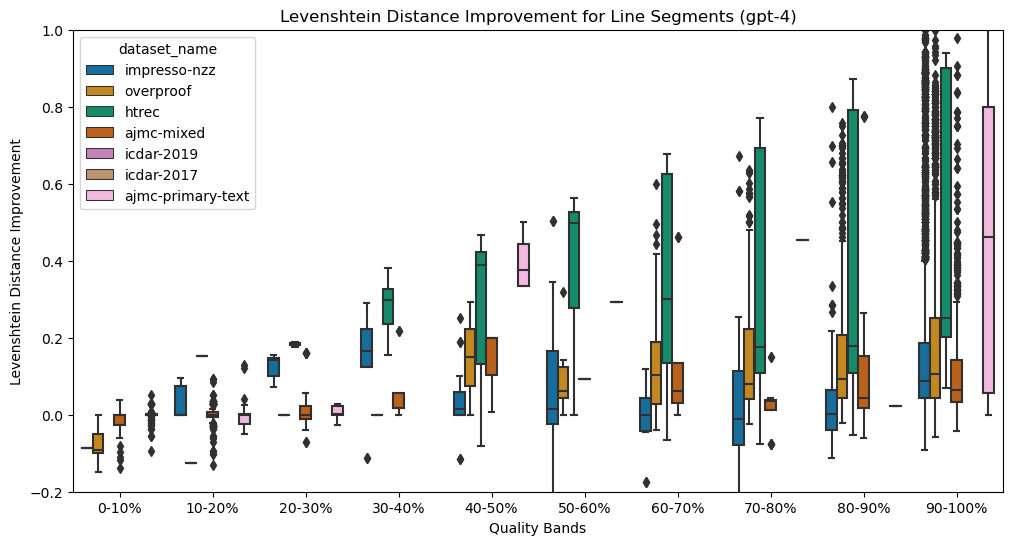

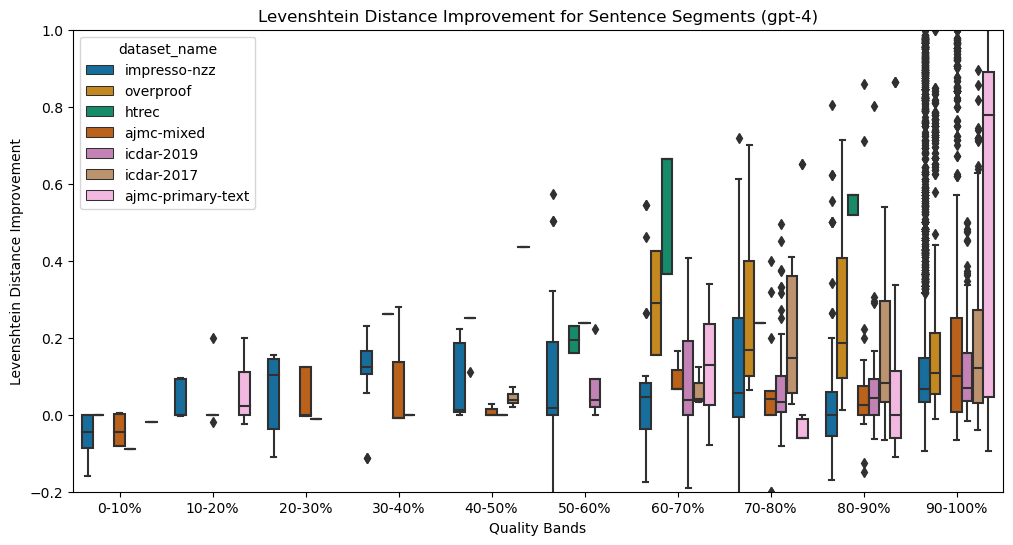

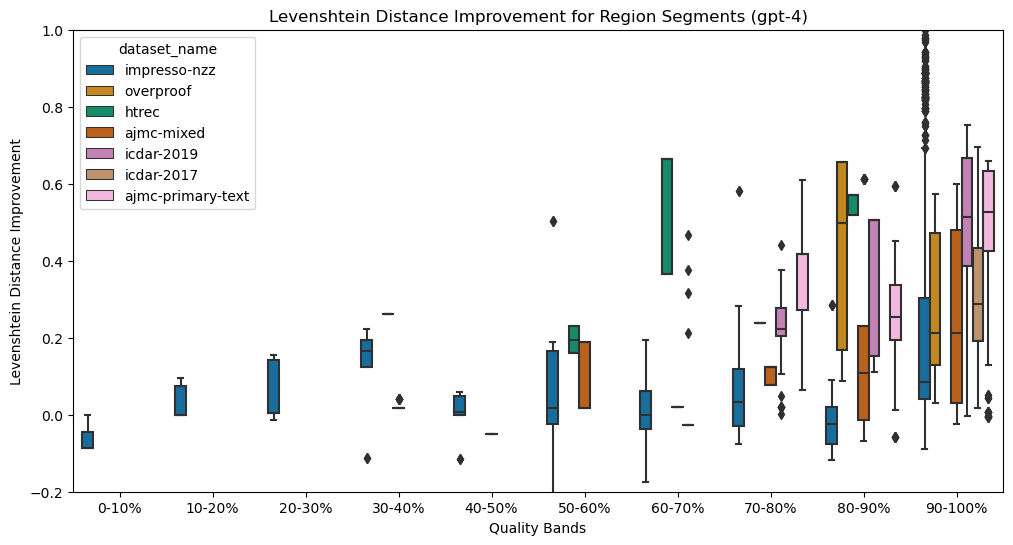

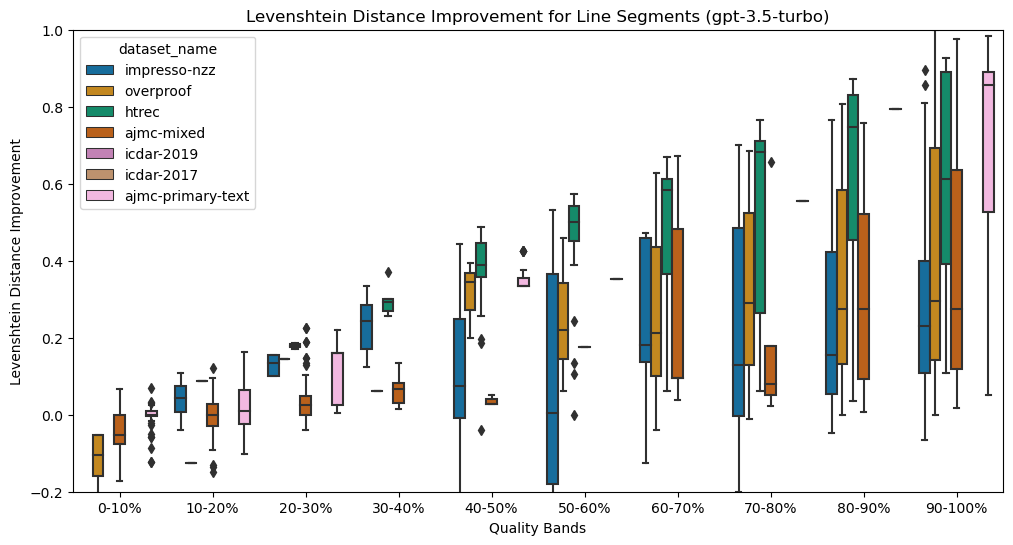

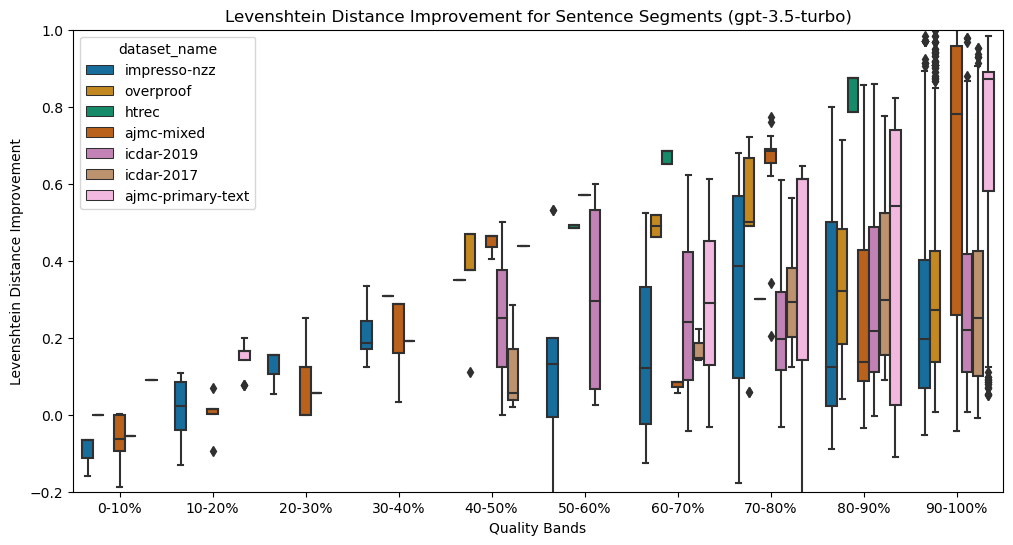

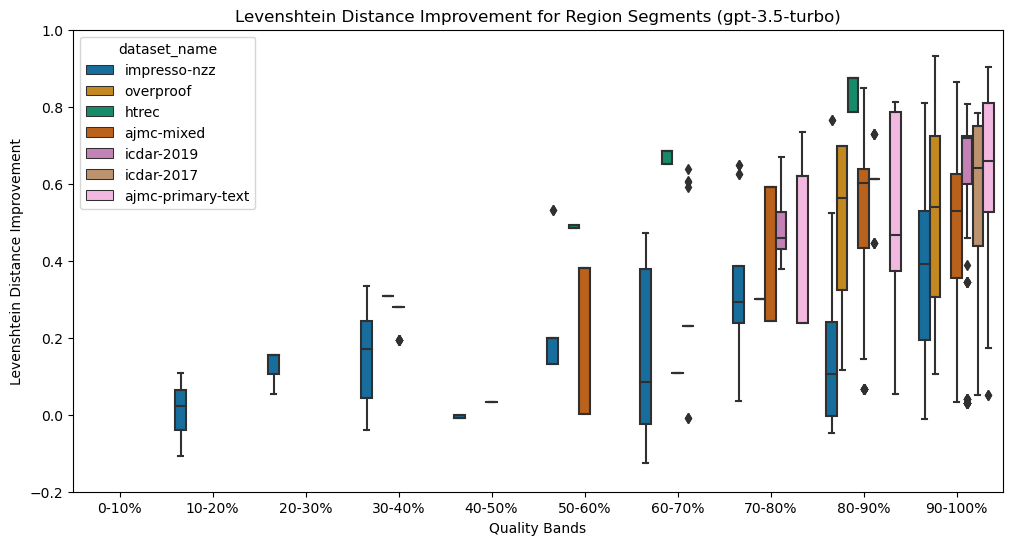

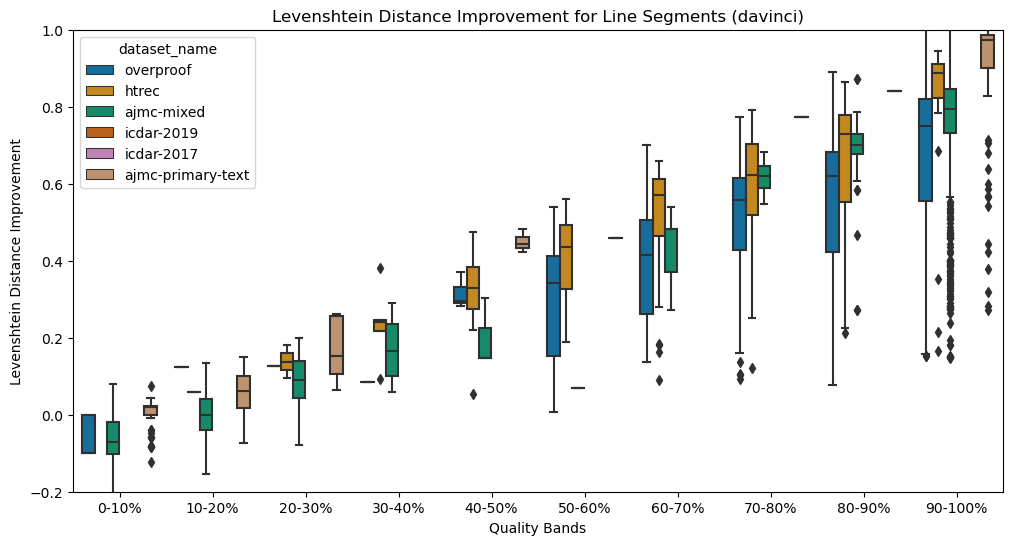

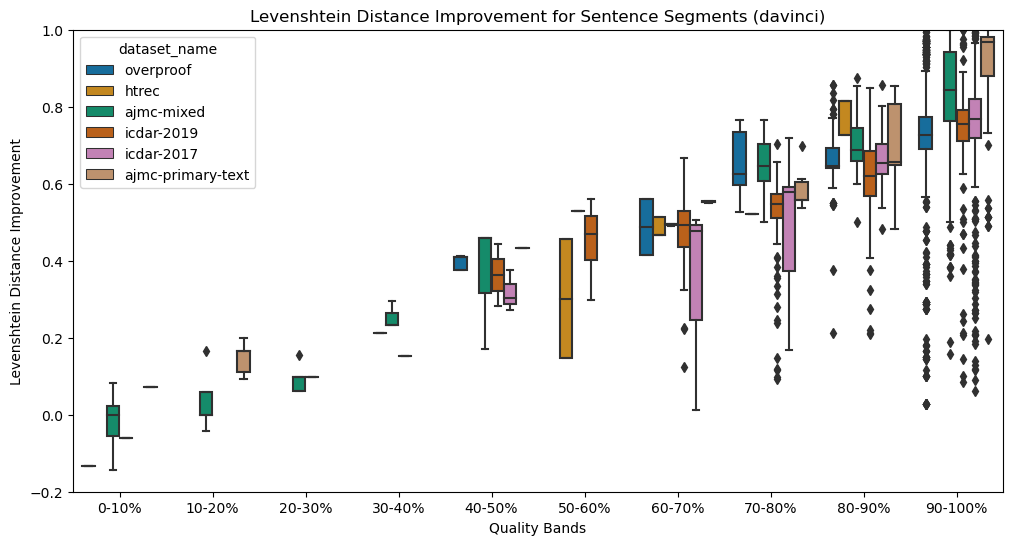

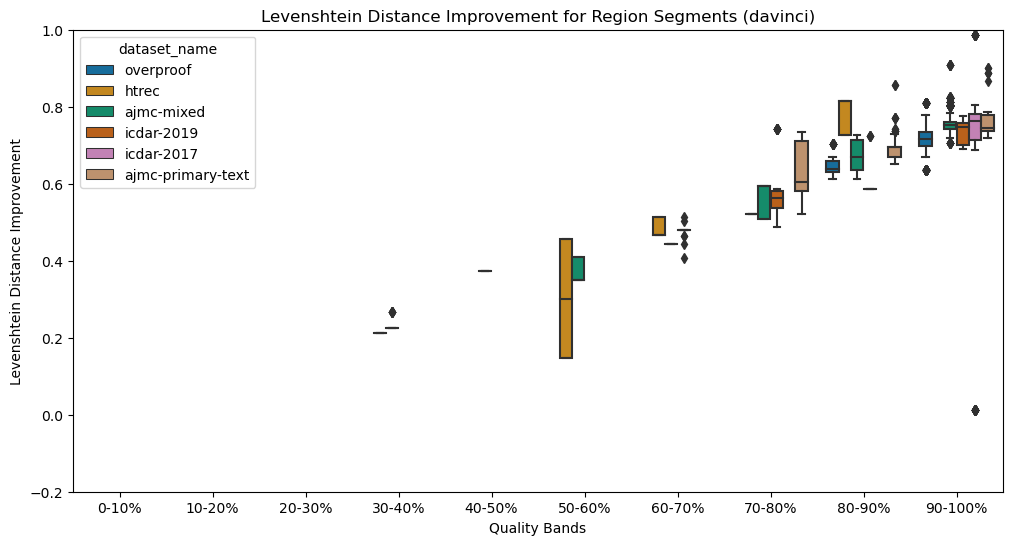

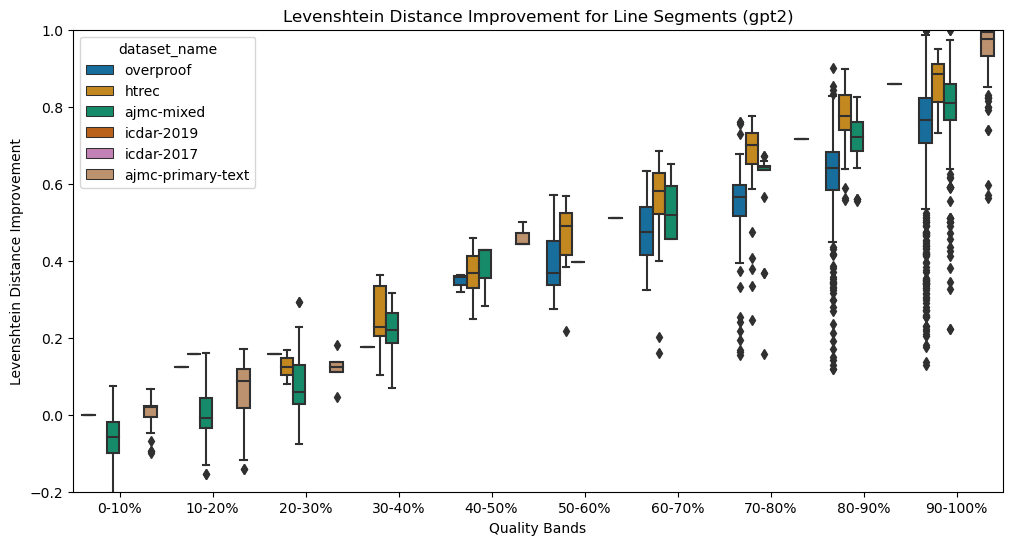

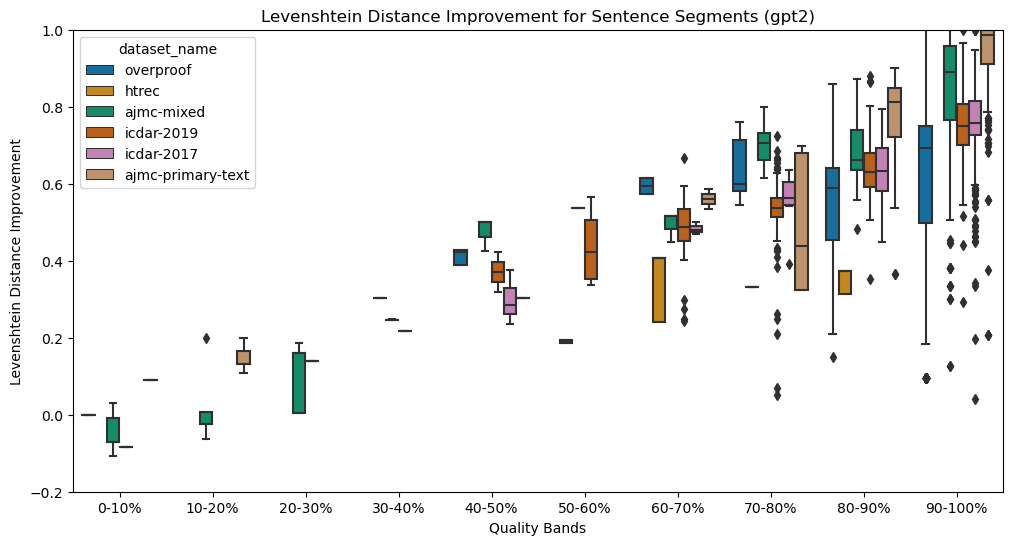

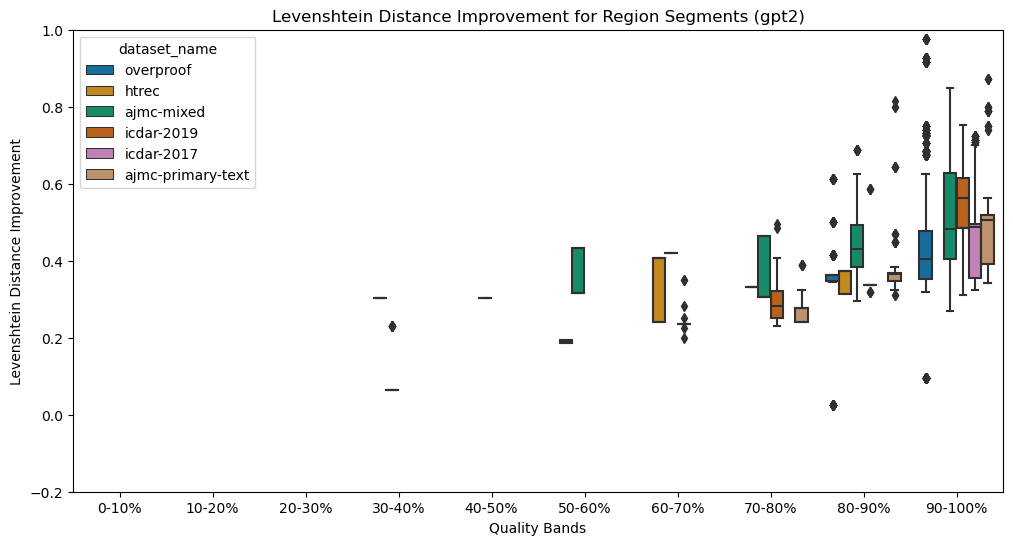

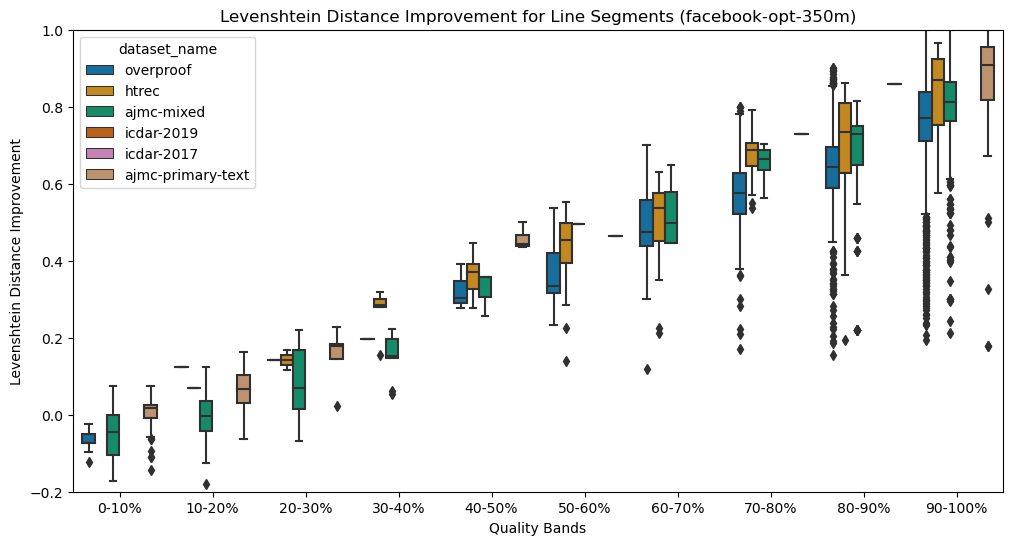

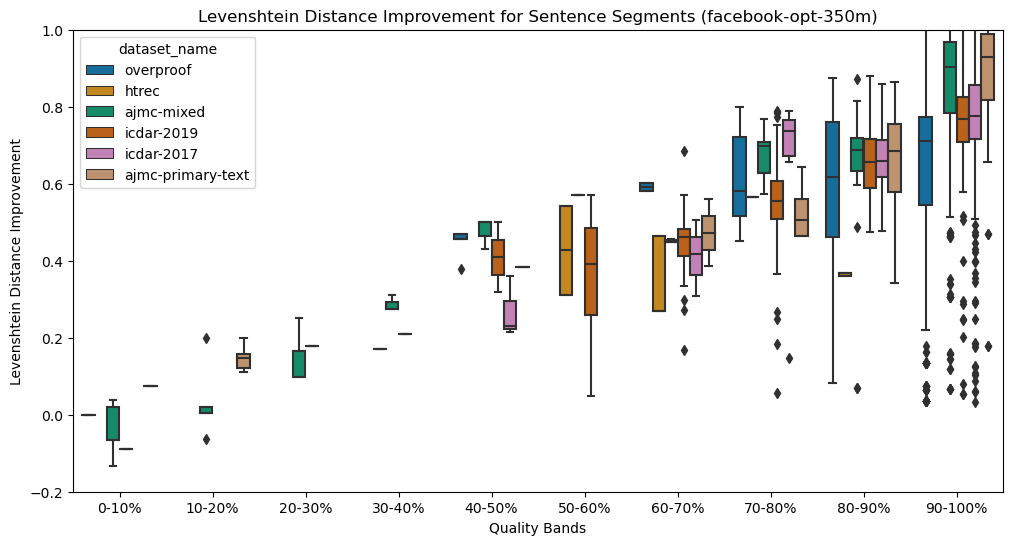

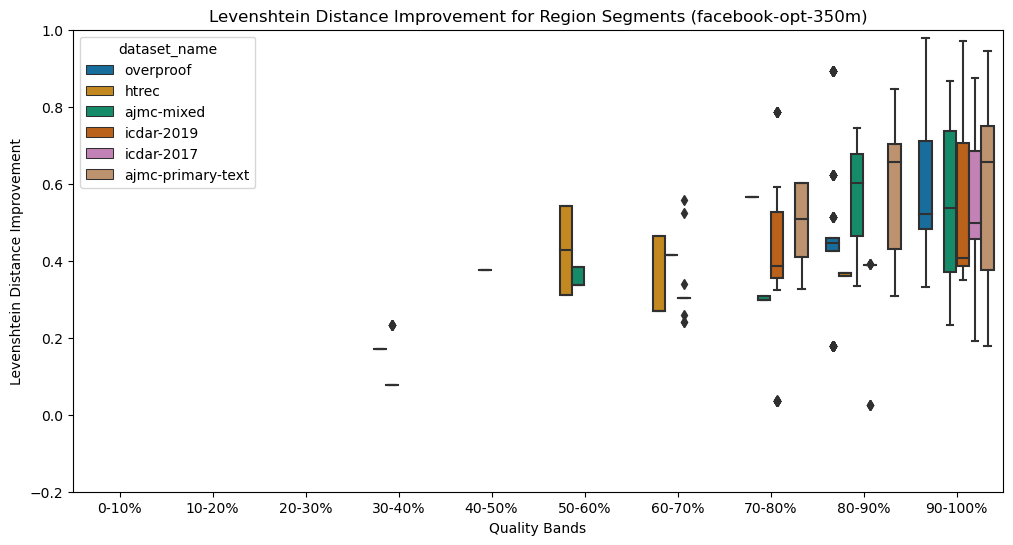

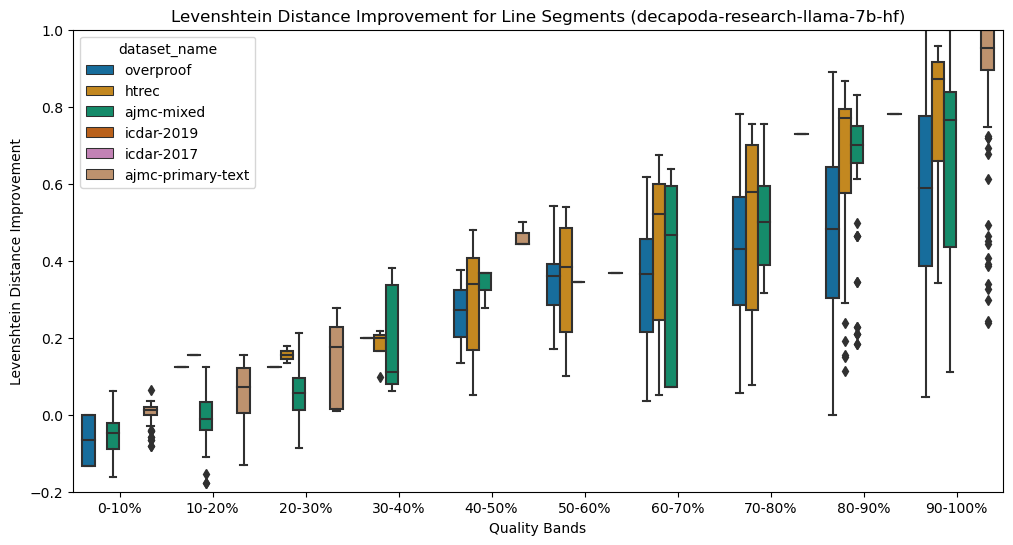

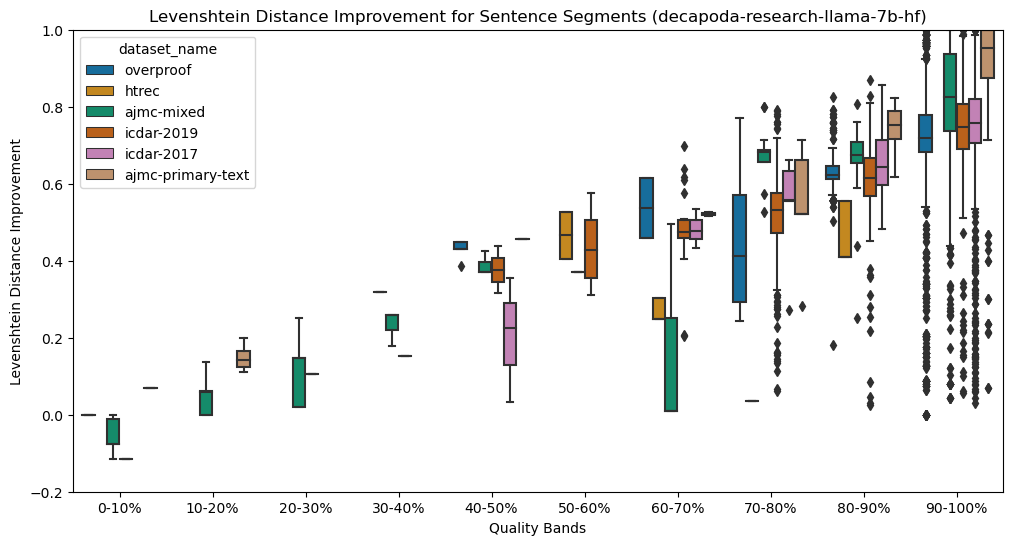

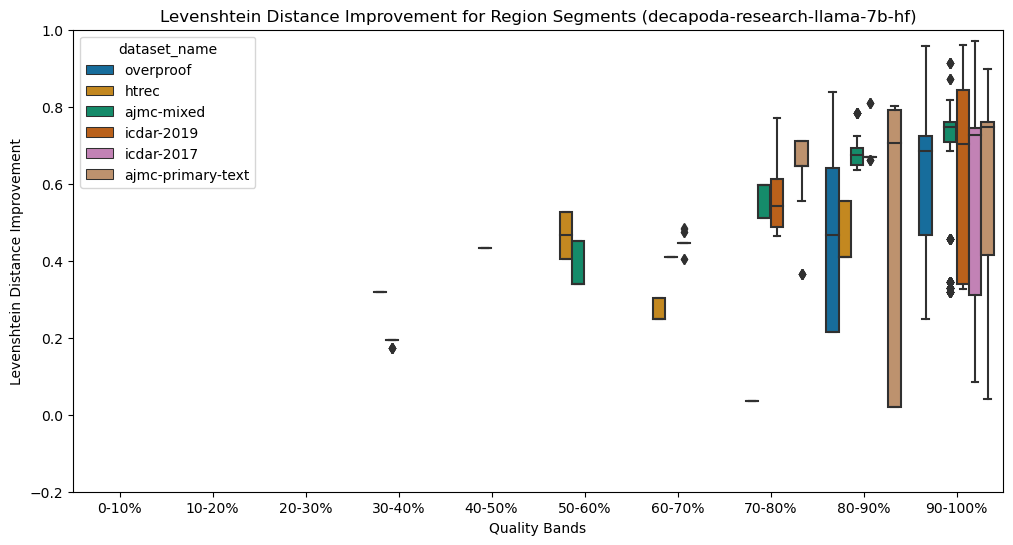

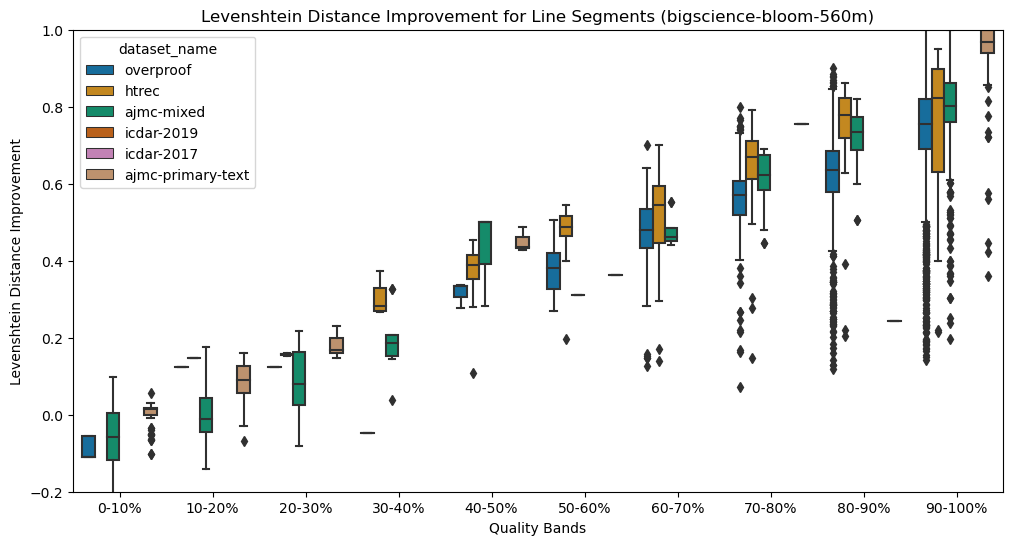

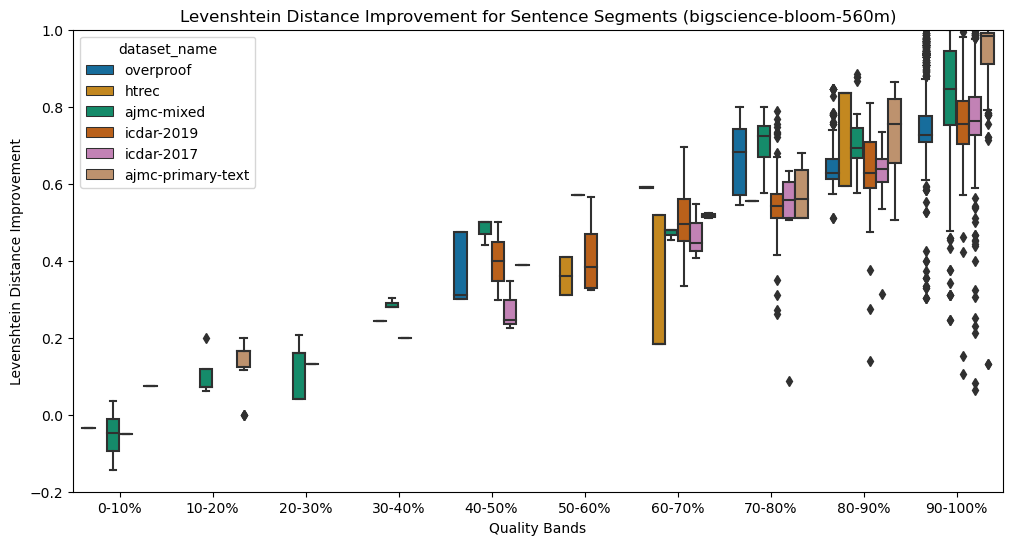

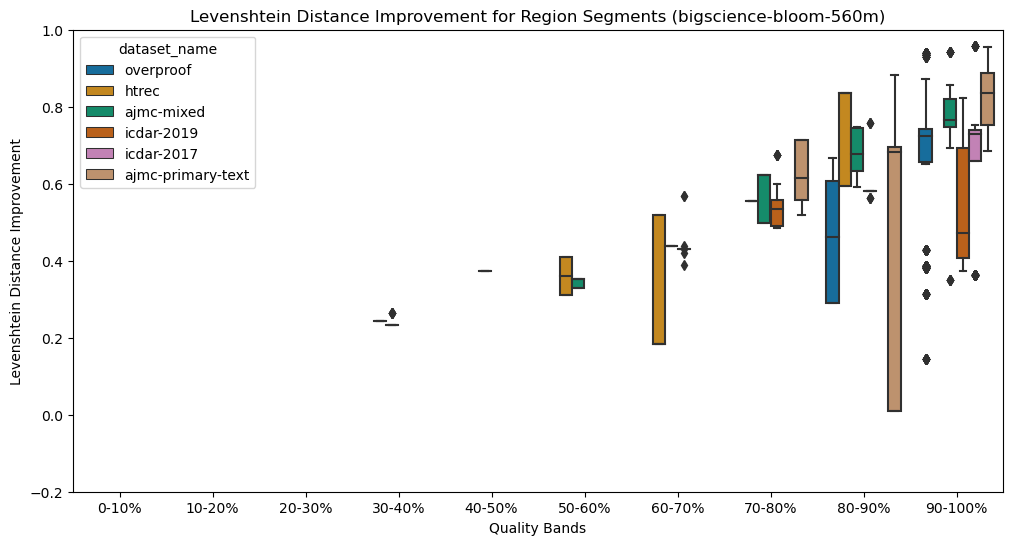

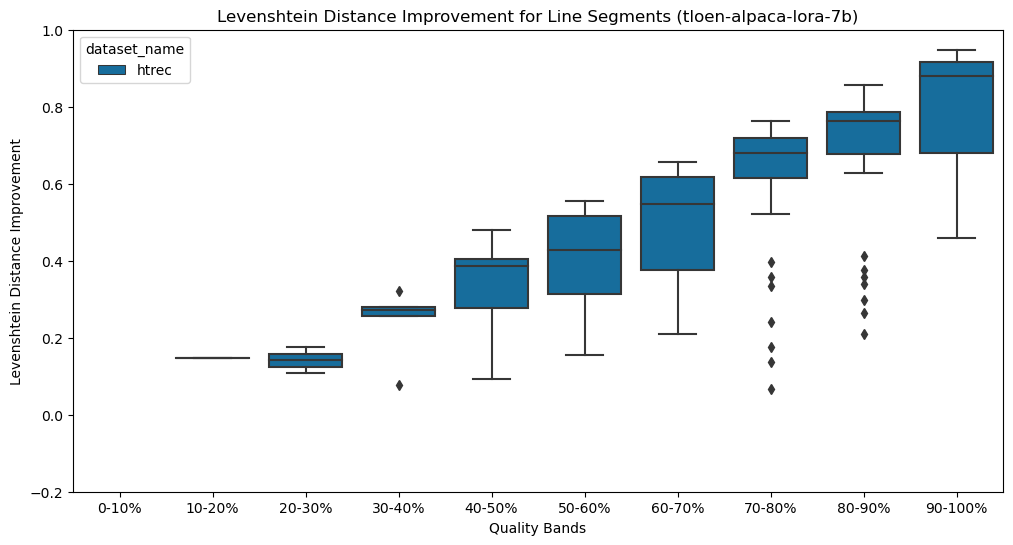

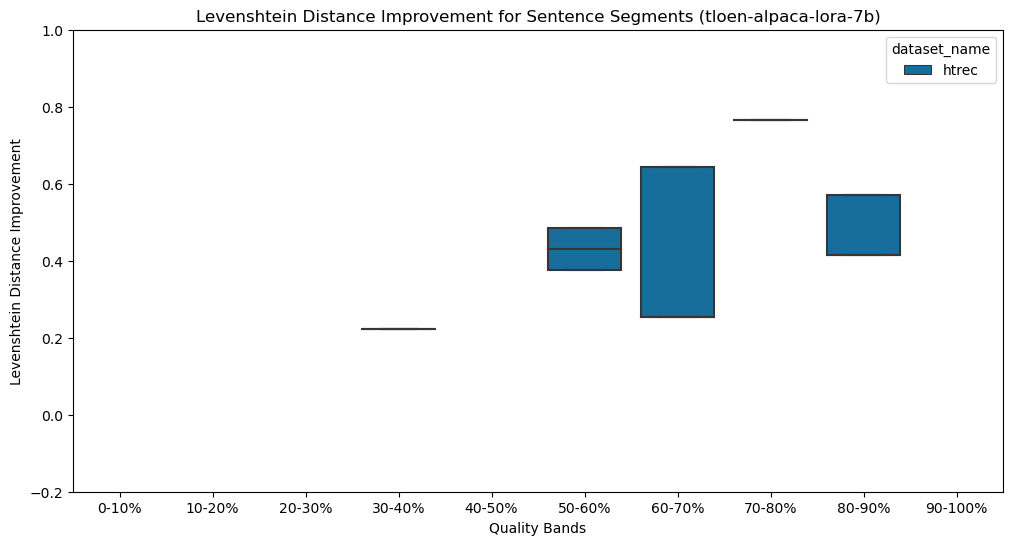

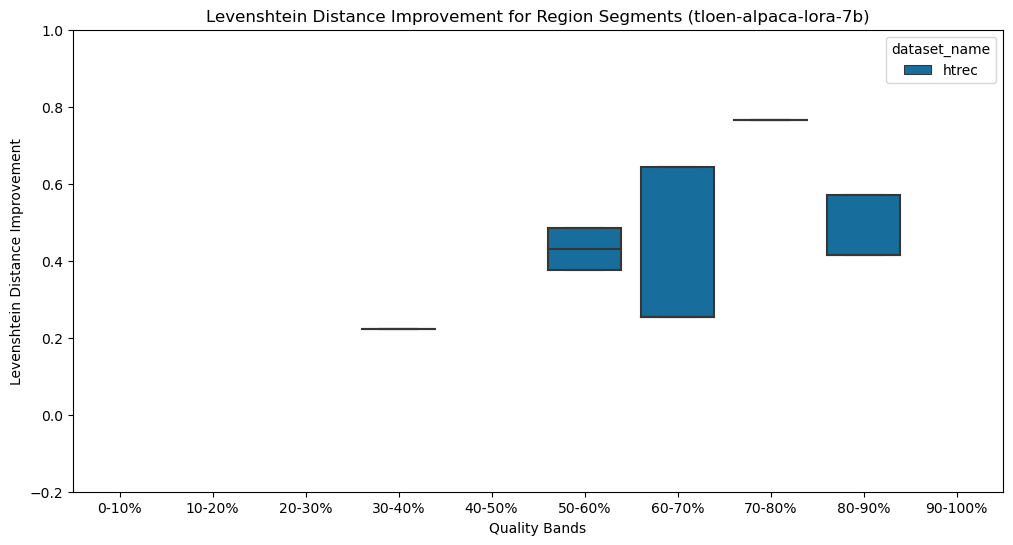

In [313]:
for model in data['model'].unique():
    data_per_model = data[data['model'] == model]
    for segment_type in ['line', 'sentence', 'region']:
        # Filter the data by dataset and segment type
        fig, ax = plt.subplots(figsize=(12, 6))

        # Create the box plot
        sns.boxplot(x=f'{segment_type}-ocr-noise-group', y=f'{segment_type}-lev-improvement', 
                    data=data_per_model, hue='dataset_name', palette='colorblind', ax=ax)

        # Set the plot title and axis labels
        plt.title(f'Levenshtein Distance Improvement for {segment_type.capitalize()} Segments ({model})')
        plt.xlabel('Quality Bands')
        plt.ylabel('Levenshtein Distance Improvement')
        
        plt.ylim((-0.2, 1.0))
        # Show the plot
        plt.show()



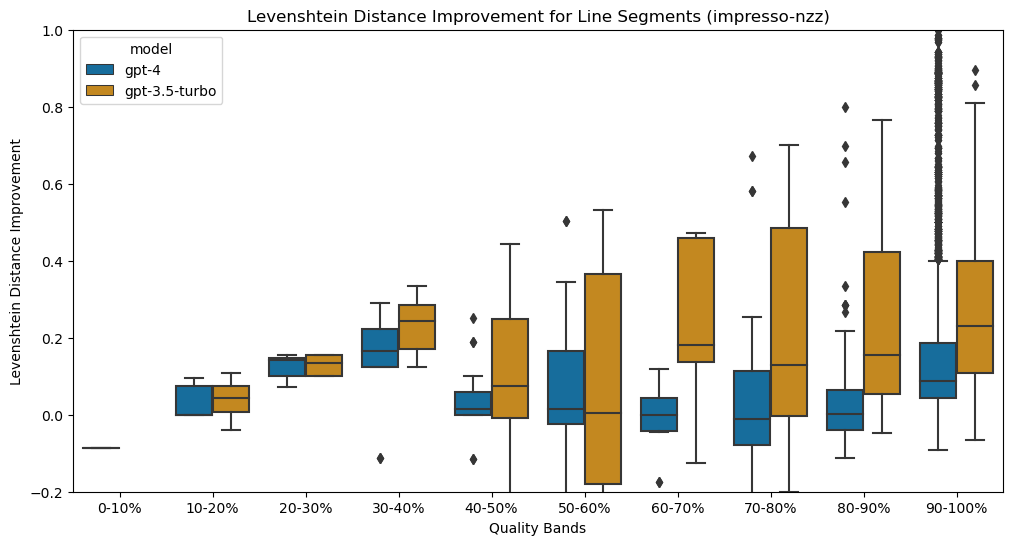

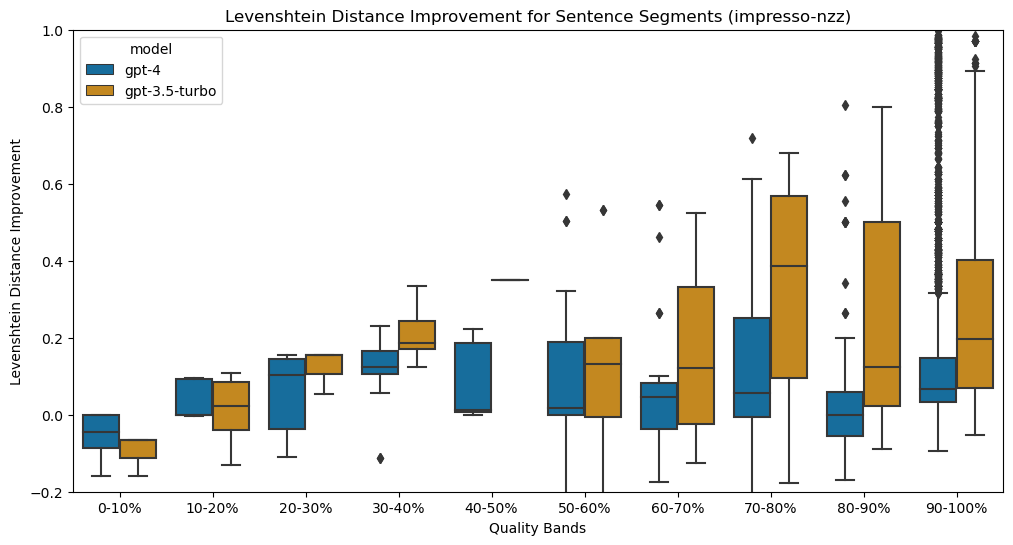

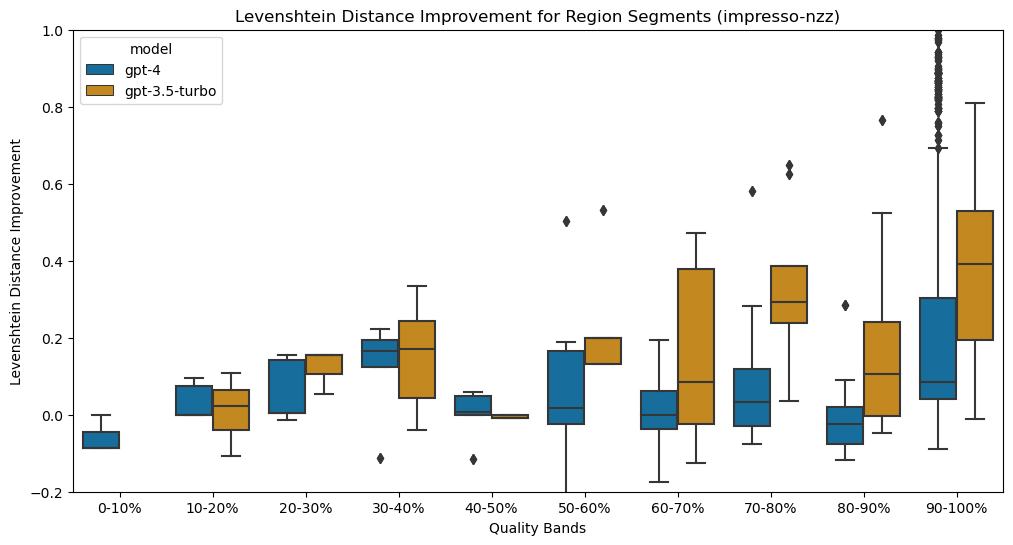

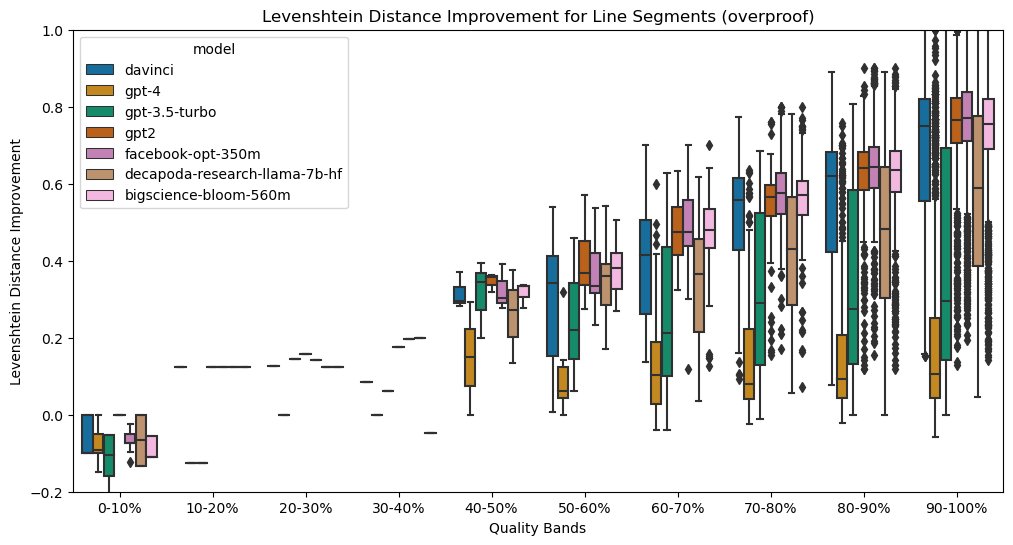

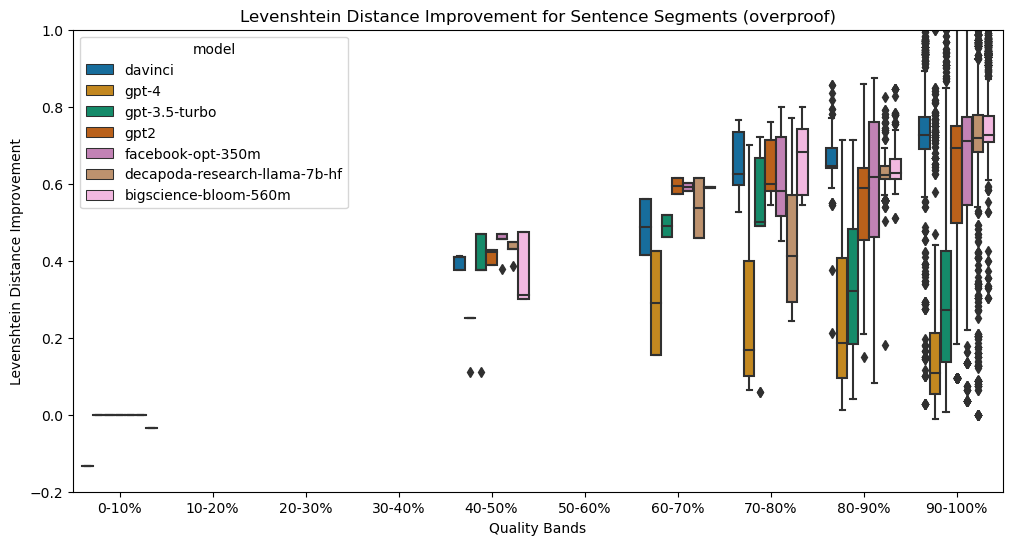

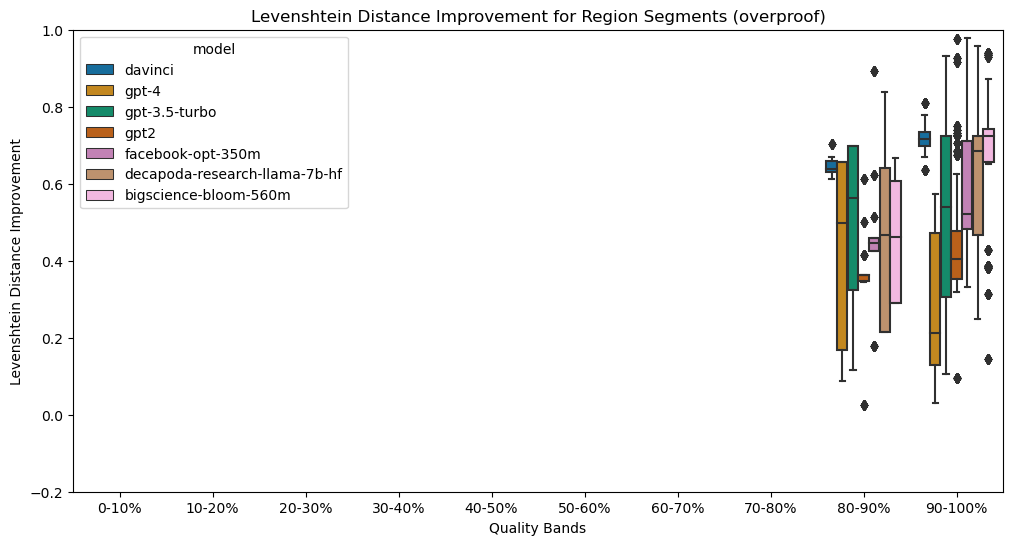

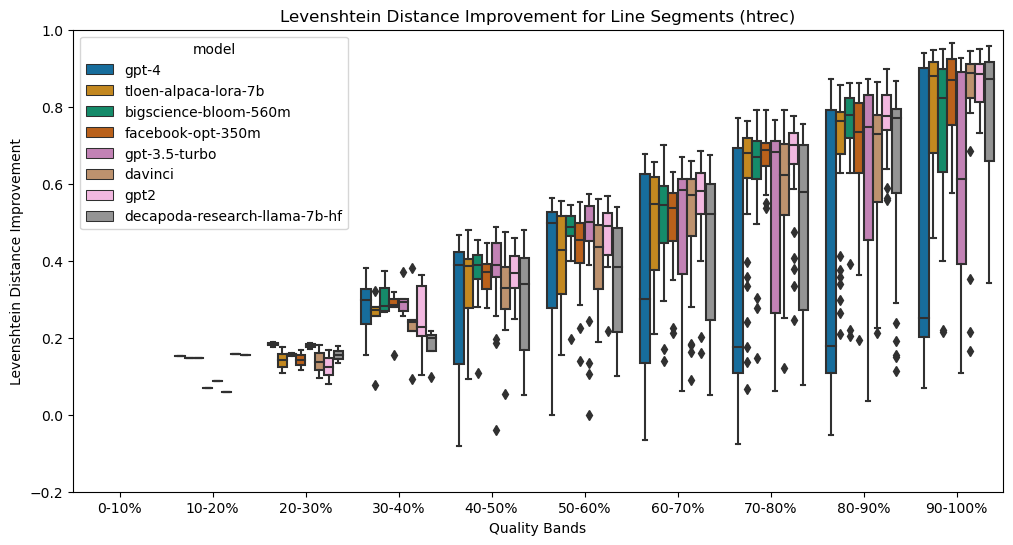

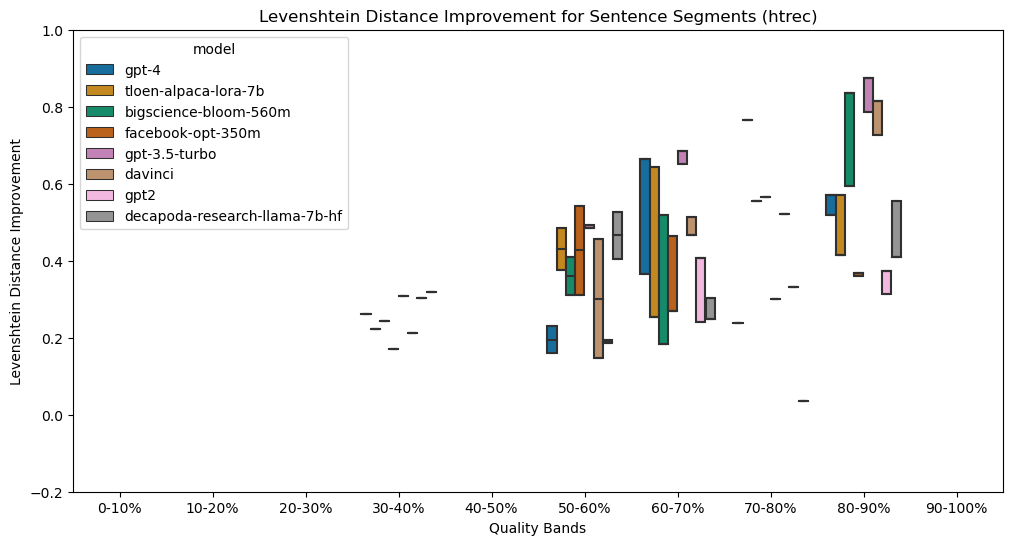

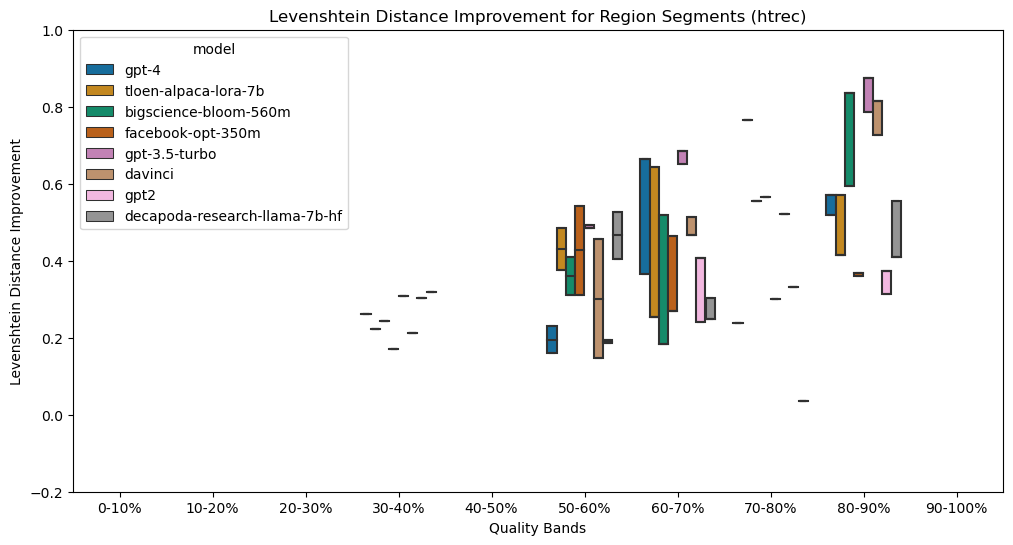

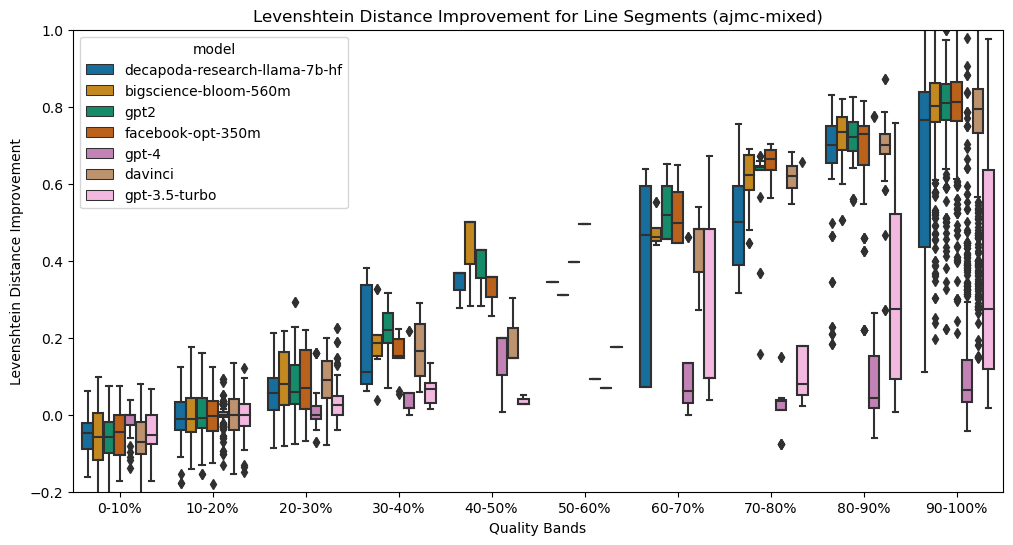

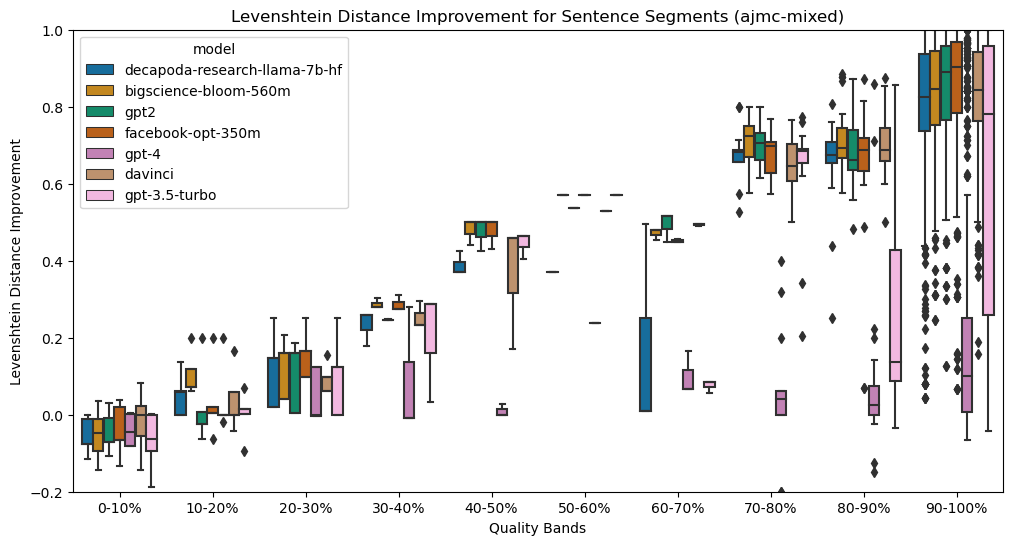

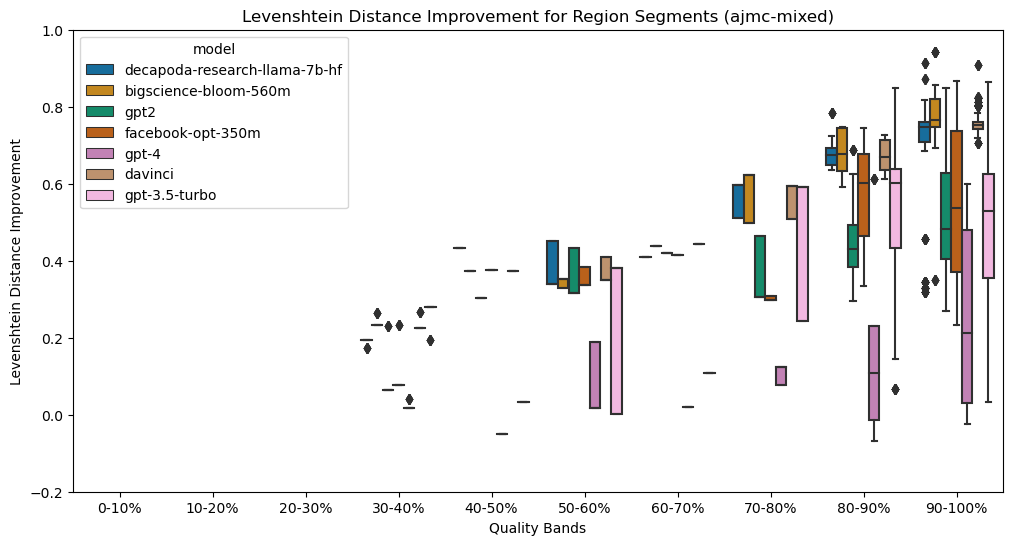

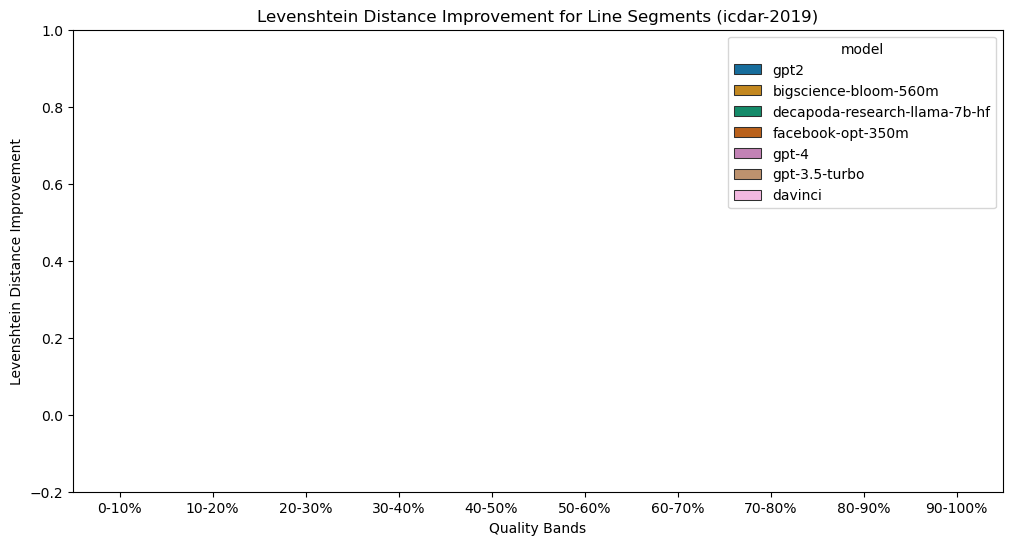

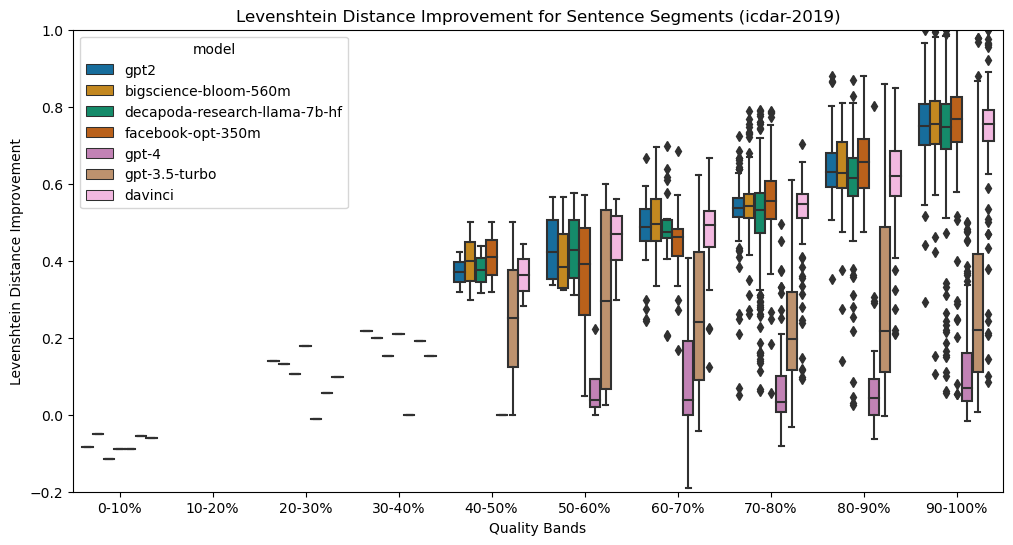

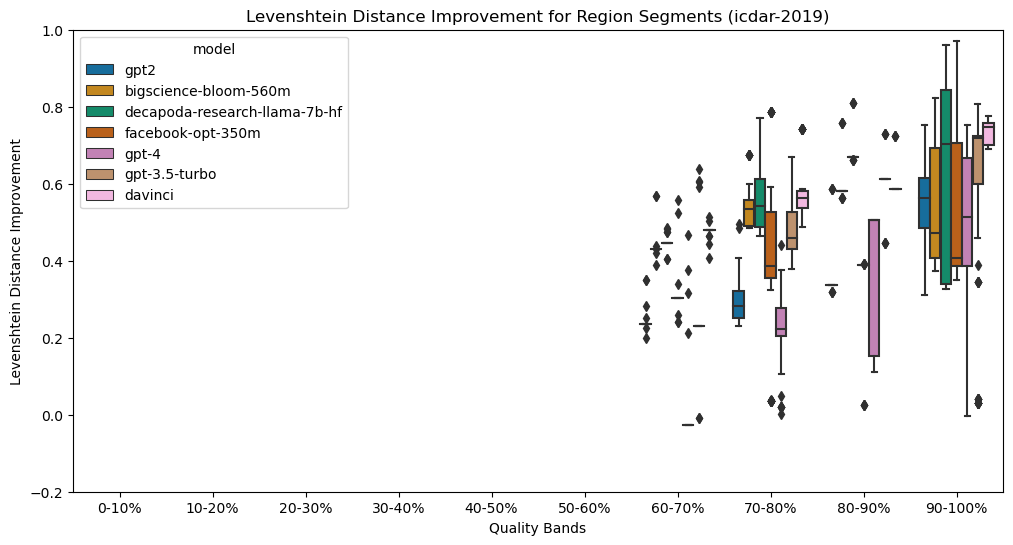

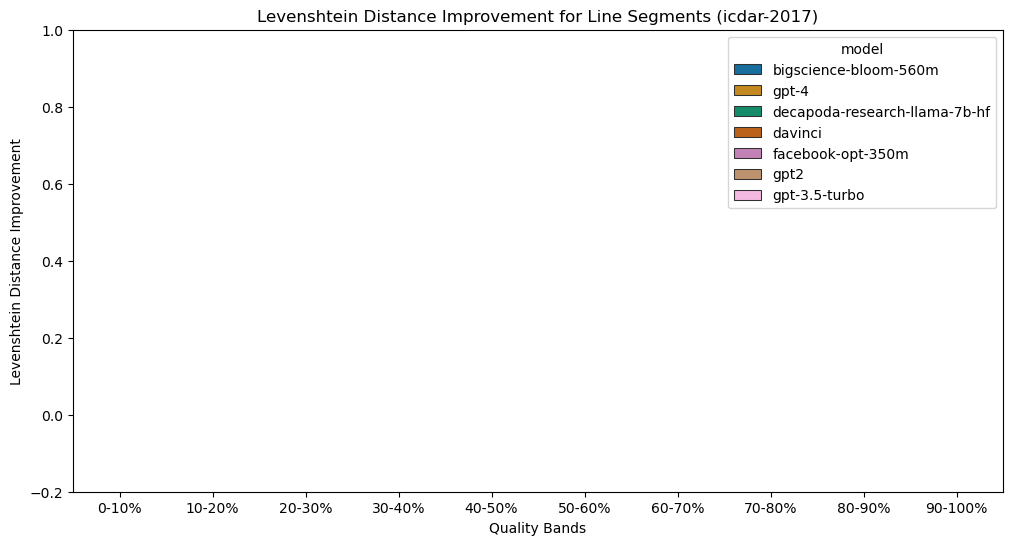

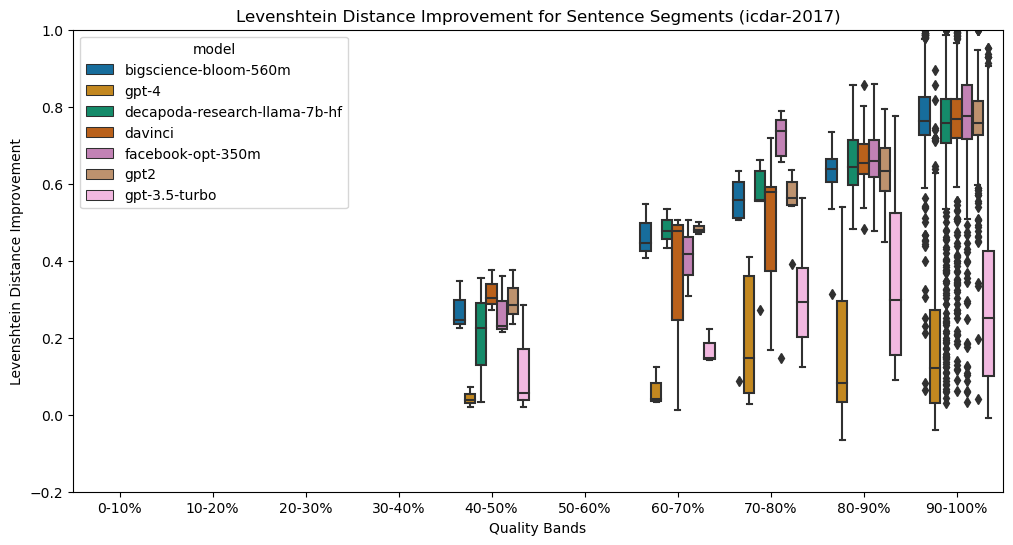

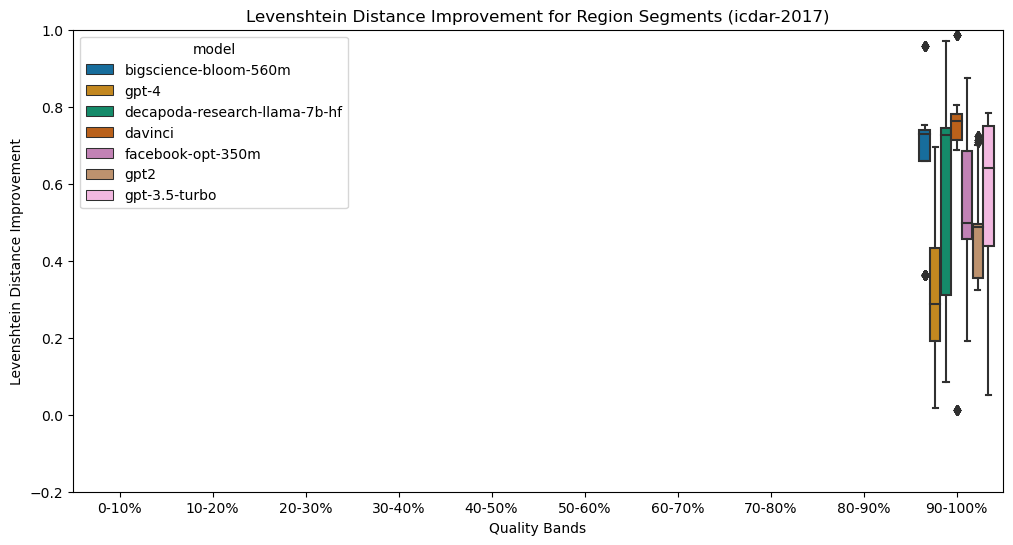

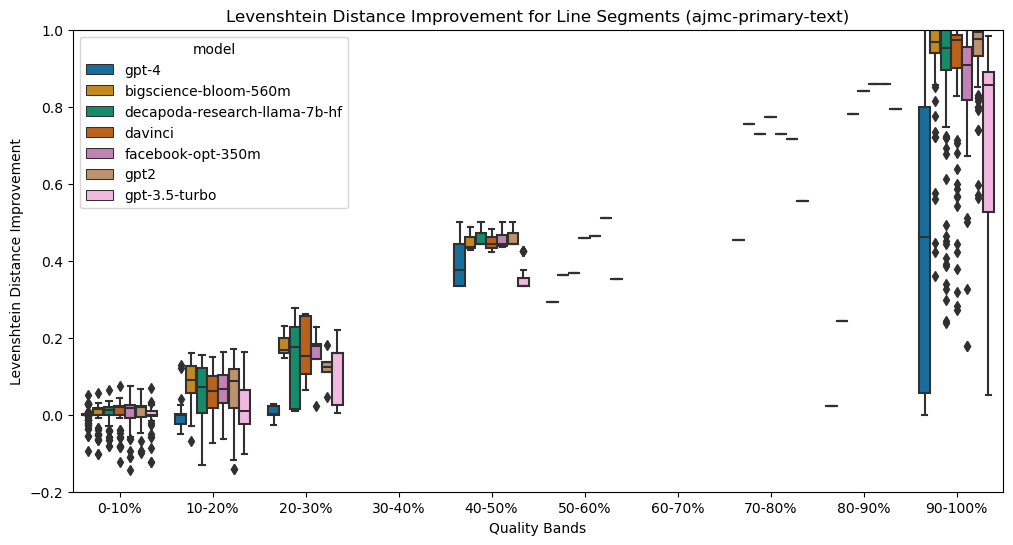

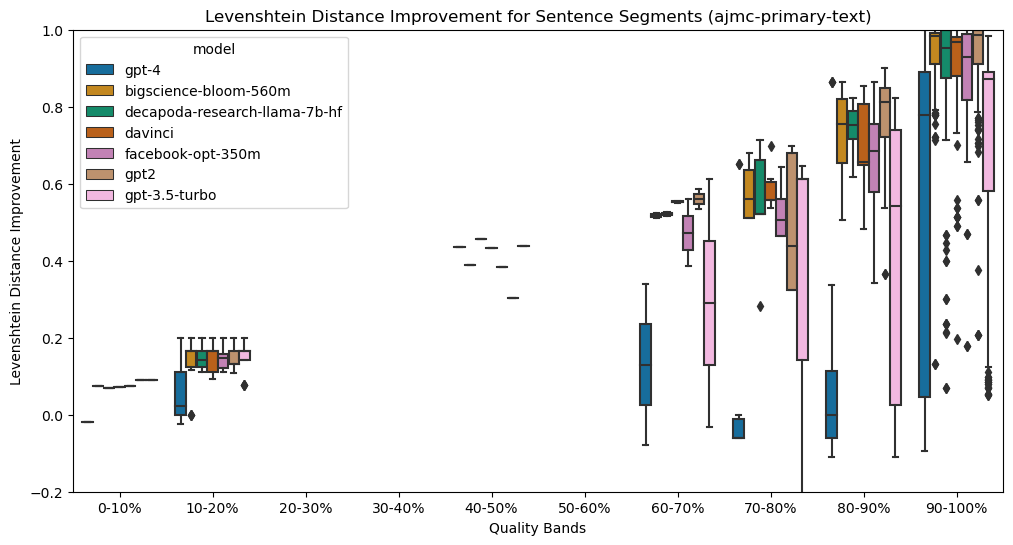

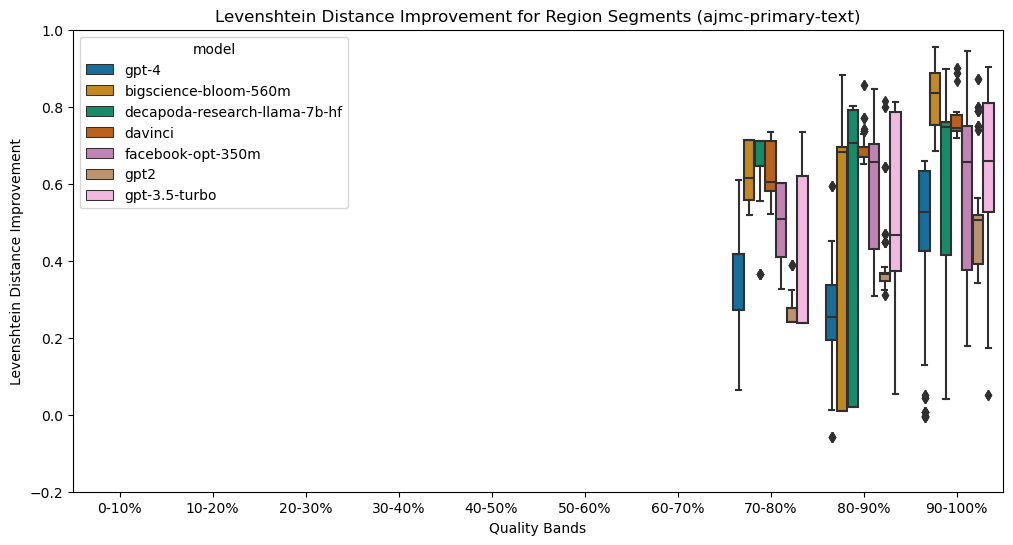

In [315]:
for model in data['dataset_name'].unique():
    data_per_model = data[data['dataset_name'] == model]
    for segment_type in ['line', 'sentence', 'region']:
        # Filter the data by dataset and segment type
        fig, ax = plt.subplots(figsize=(12, 6))

        # Create the box plot
        sns.boxplot(x=f'{segment_type}-ocr-noise-group', y=f'{segment_type}-lev-improvement', 
                    data=data_per_model, hue='model', palette='colorblind', ax=ax)

        # Set the plot title and axis labels
        plt.title(f'Levenshtein Distance Improvement for {segment_type.capitalize()} Segments ({model})')
        plt.xlabel('Quality Bands')
        plt.ylabel('Levenshtein Distance Improvement')
        
        plt.ylim((-0.2, 1.0))
        # Show the plot
        plt.show()



  line-ocr-noise-group  dataset_name  line-lev-improvement
0                0-10%  impresso-nzz             -0.087500
1               10-20%  impresso-nzz              0.037722
2               20-30%  impresso-nzz              0.123791
3               30-40%  impresso-nzz              0.121529
4               40-50%  impresso-nzz              0.016944


<Figure size 1200x600 with 0 Axes>

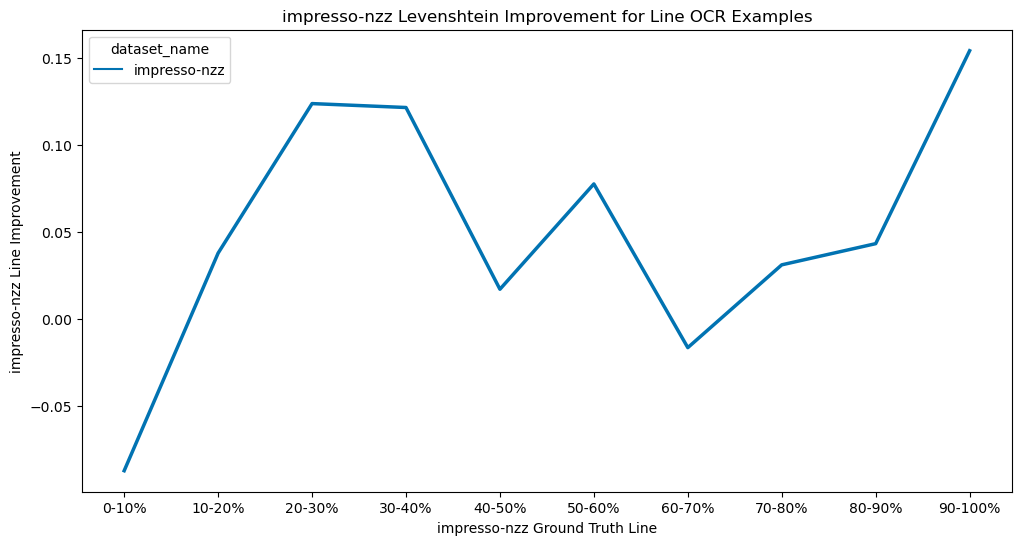

  sentence-ocr-noise-group  dataset_name  sentence-lev-improvement
0                    0-10%  impresso-nzz                 -0.055833
1                   10-20%  impresso-nzz                  0.041296
2                   20-30%  impresso-nzz                  0.052801
3                   30-40%  impresso-nzz                  0.111862
4                   40-50%  impresso-nzz                  0.088776


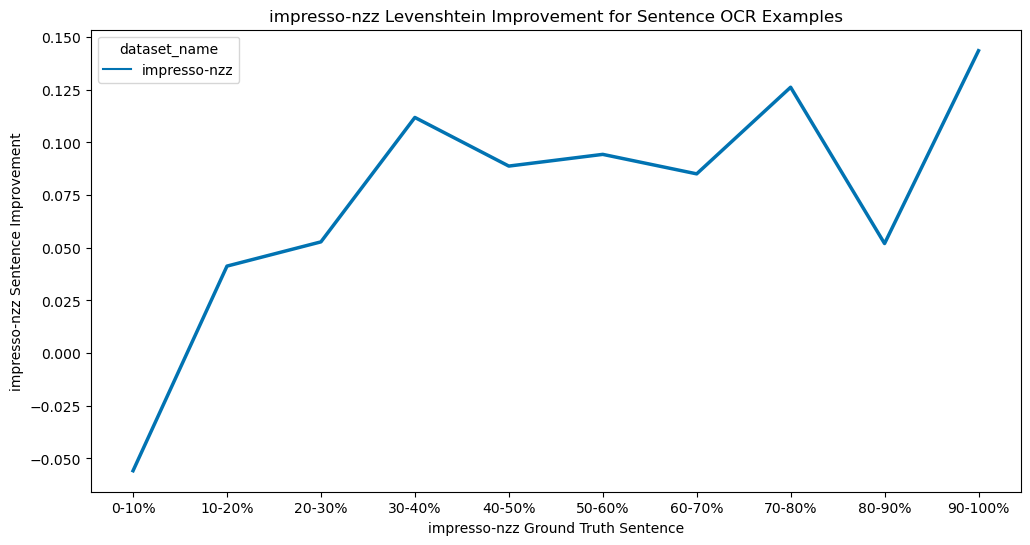

  region-ocr-noise-group  dataset_name  region-lev-improvement
0                  0-10%  impresso-nzz               -0.058333
1                 10-20%  impresso-nzz                0.037722
2                 20-30%  impresso-nzz                0.056182
3                 30-40%  impresso-nzz                0.126253
4                 40-50%  impresso-nzz               -0.002910


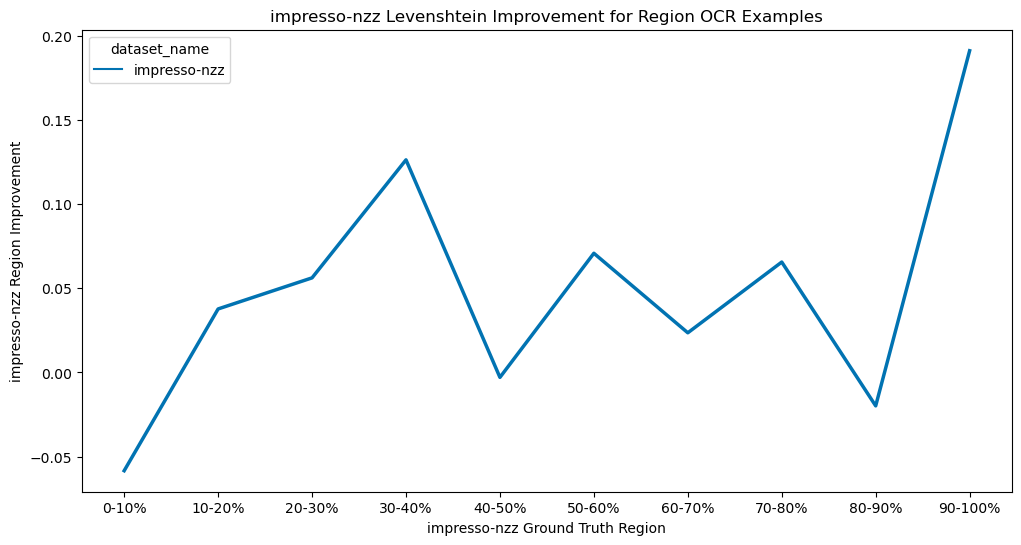

  line-ocr-noise-group  dataset_name  line-lev-improvement
0                0-10%  impresso-nzz                   NaN
1               10-20%  impresso-nzz              0.038790
2               20-30%  impresso-nzz              0.129963
3               30-40%  impresso-nzz              0.225430
4               40-50%  impresso-nzz              0.109180


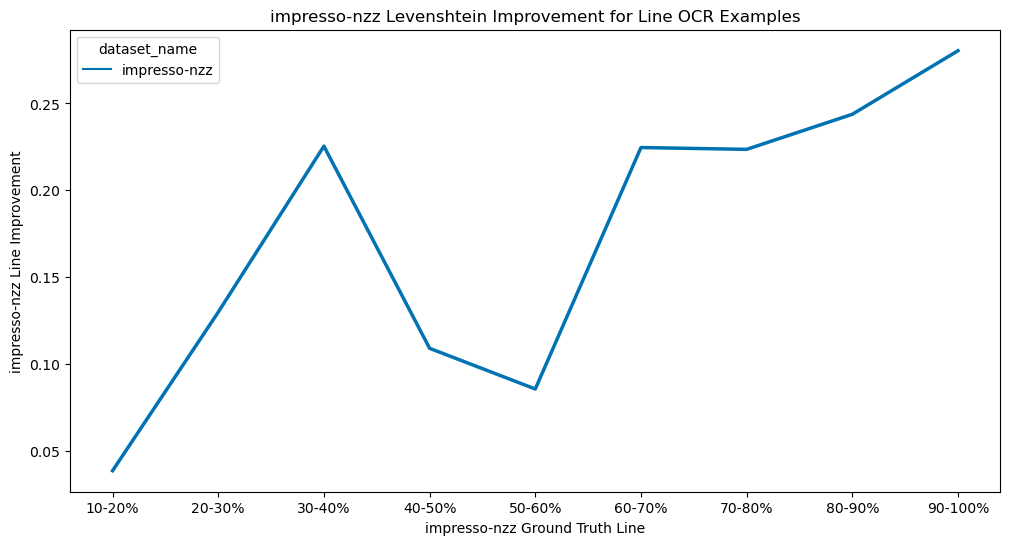

  sentence-ocr-noise-group  dataset_name  sentence-lev-improvement
0                    0-10%  impresso-nzz                 -0.097778
1                   10-20%  impresso-nzz                  0.024741
2                   20-30%  impresso-nzz                  0.121830
3                   30-40%  impresso-nzz                  0.214551
4                   40-50%  impresso-nzz                  0.350388


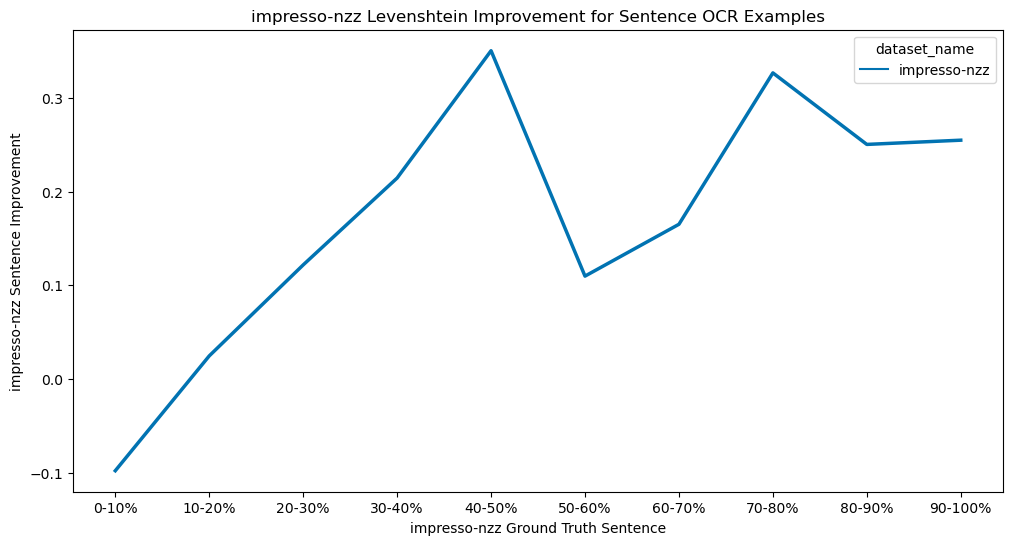

  region-ocr-noise-group  dataset_name  region-lev-improvement
0                  0-10%  impresso-nzz                     NaN
1                 10-20%  impresso-nzz                0.022537
2                 20-30%  impresso-nzz                0.121830
3                 30-40%  impresso-nzz                0.147840
4                 40-50%  impresso-nzz               -0.005556


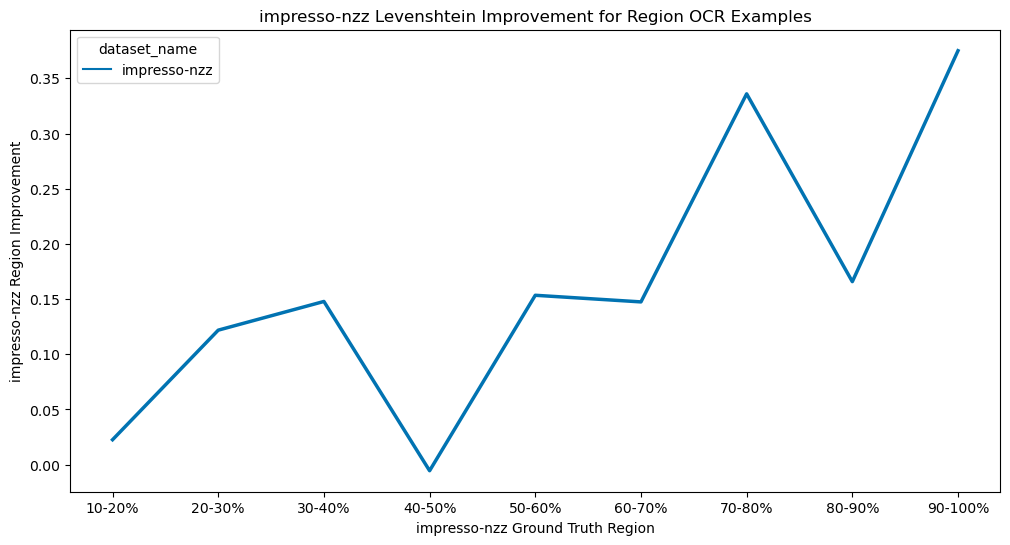

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.066667
1               10-20%    overproof              0.125000
2               20-30%    overproof              0.126386
3               30-40%    overproof              0.085921
4               40-50%    overproof              0.316046


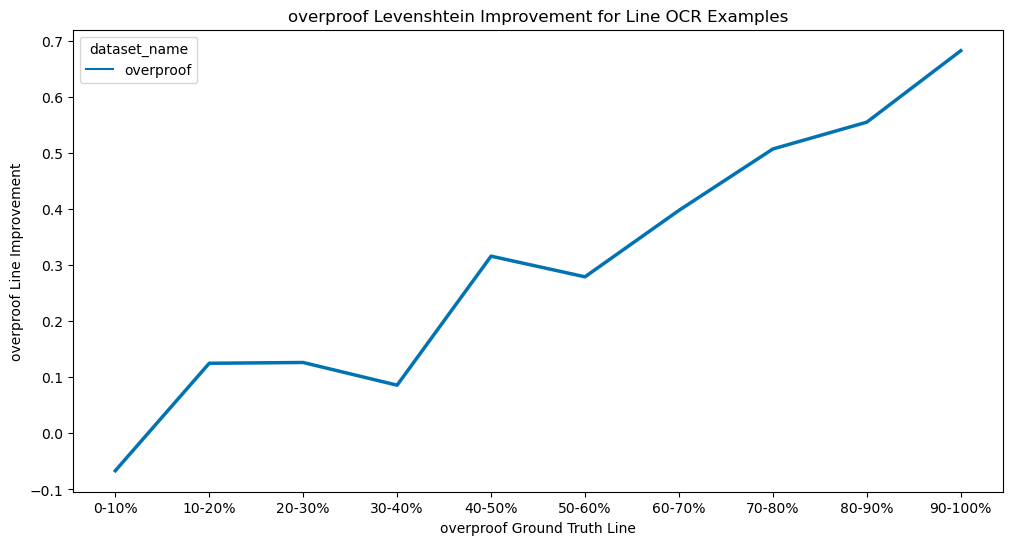

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                 -0.133333
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.396074


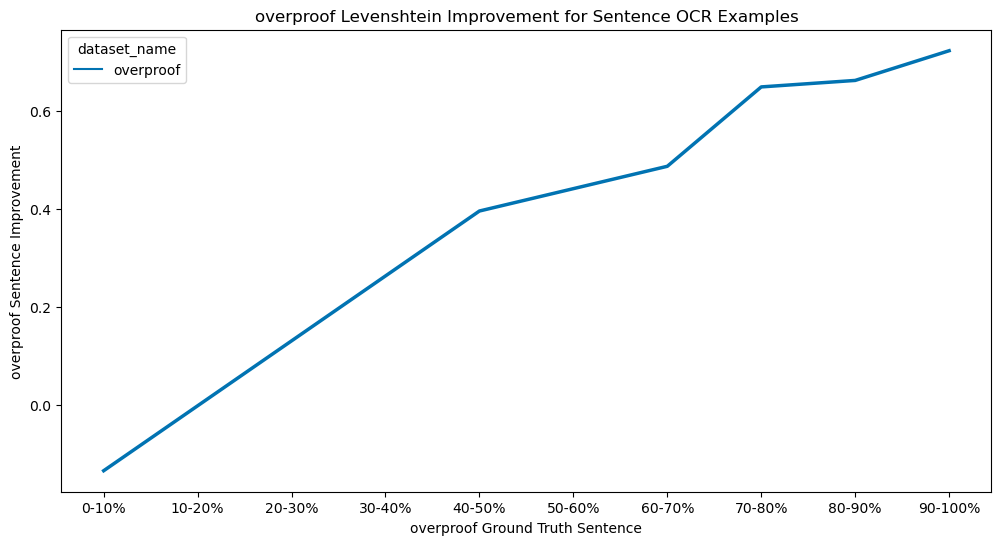

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


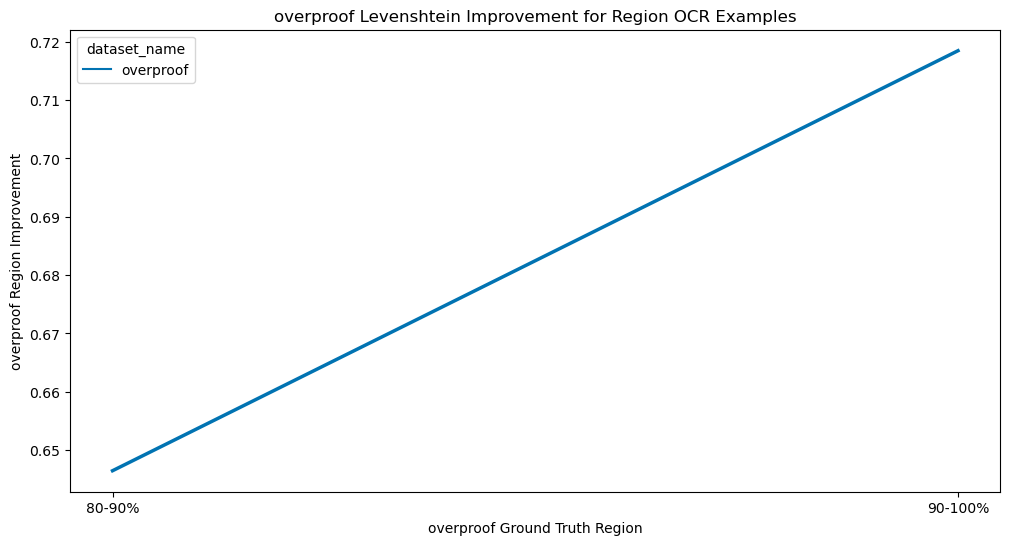

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.077879
1               10-20%    overproof             -0.125000
2               20-30%    overproof              0.000000
3               30-40%    overproof              0.000000
4               40-50%    overproof              0.147812


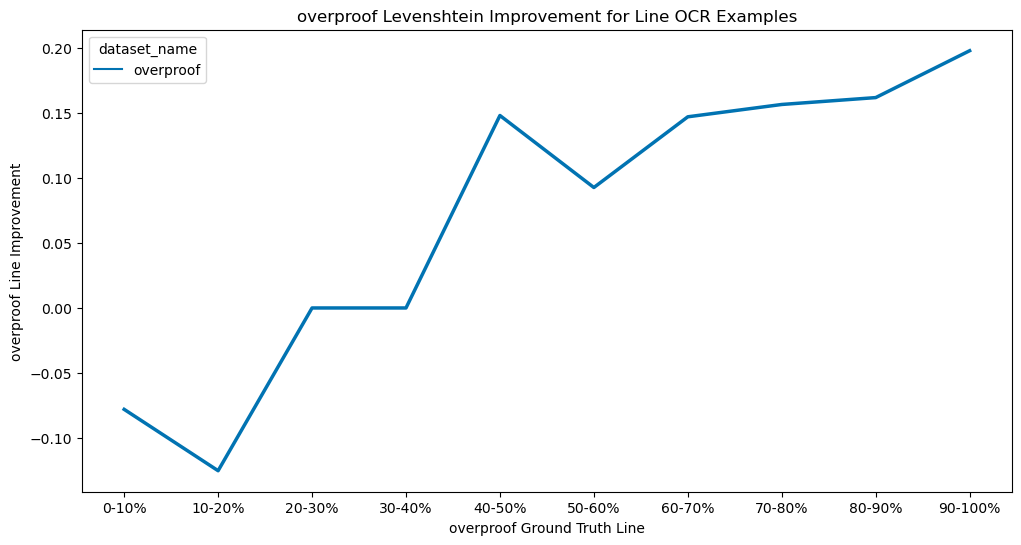

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.000000
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.222222


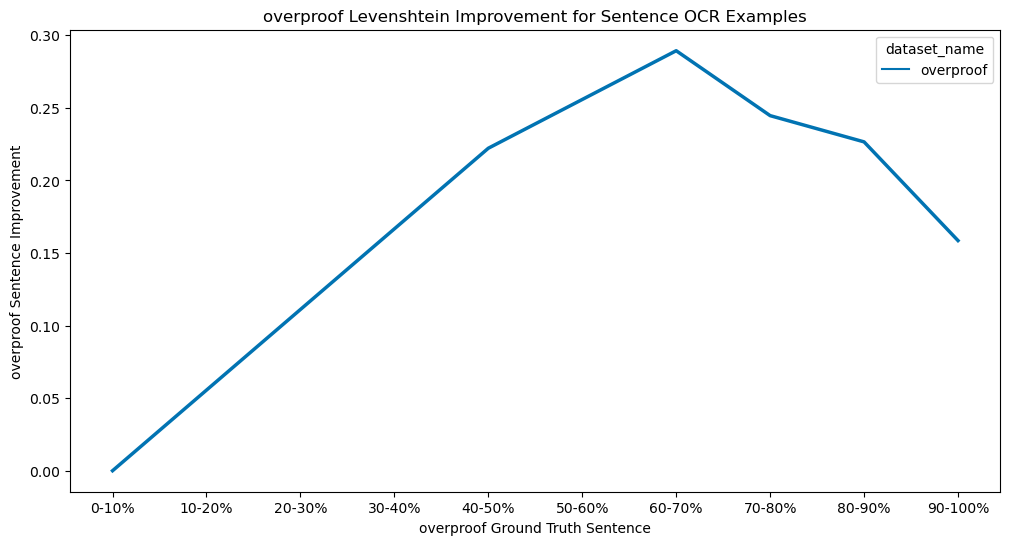

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


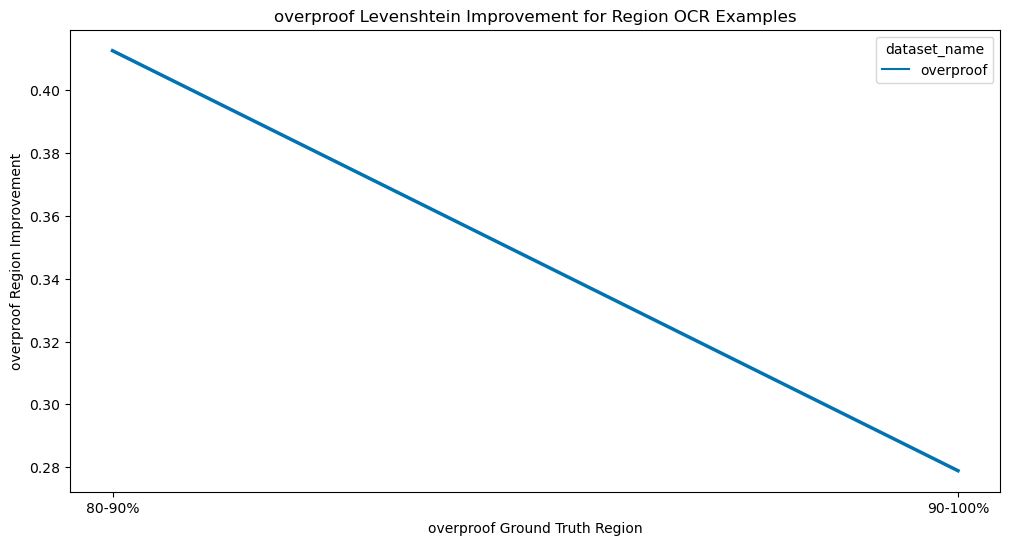

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.111111
1               10-20%    overproof             -0.125000
2               20-30%    overproof              0.144522
3               30-40%    overproof              0.062112
4               40-50%    overproof              0.312698


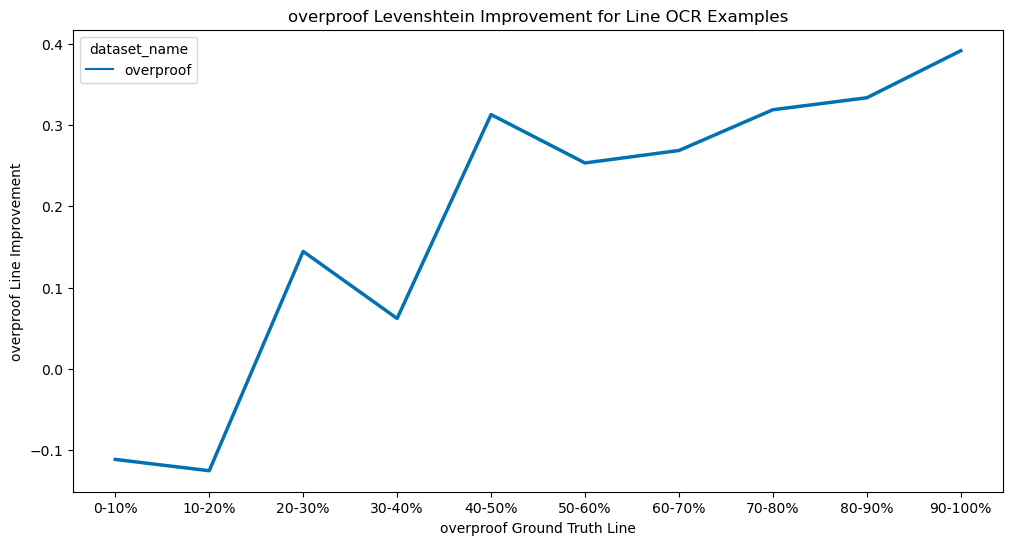

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.000000
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.360458


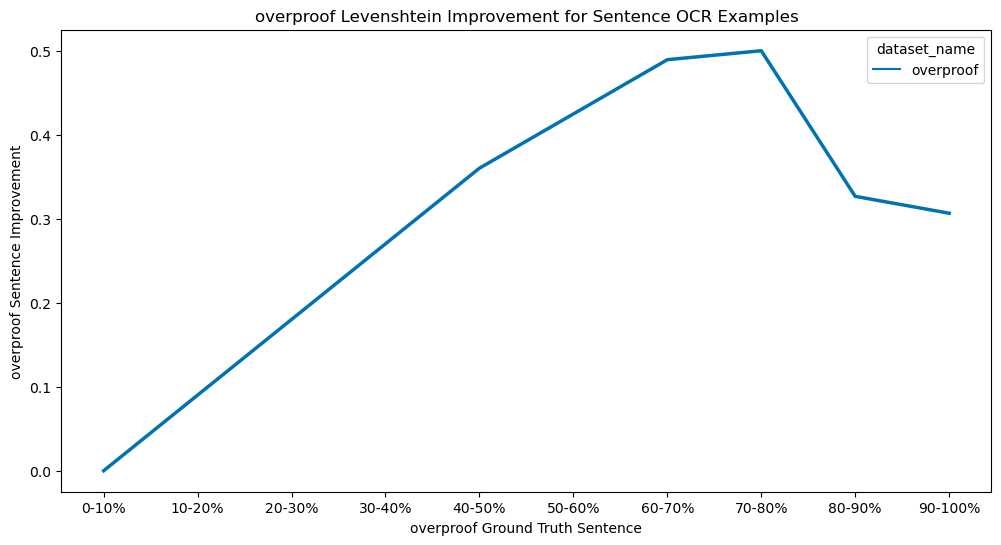

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


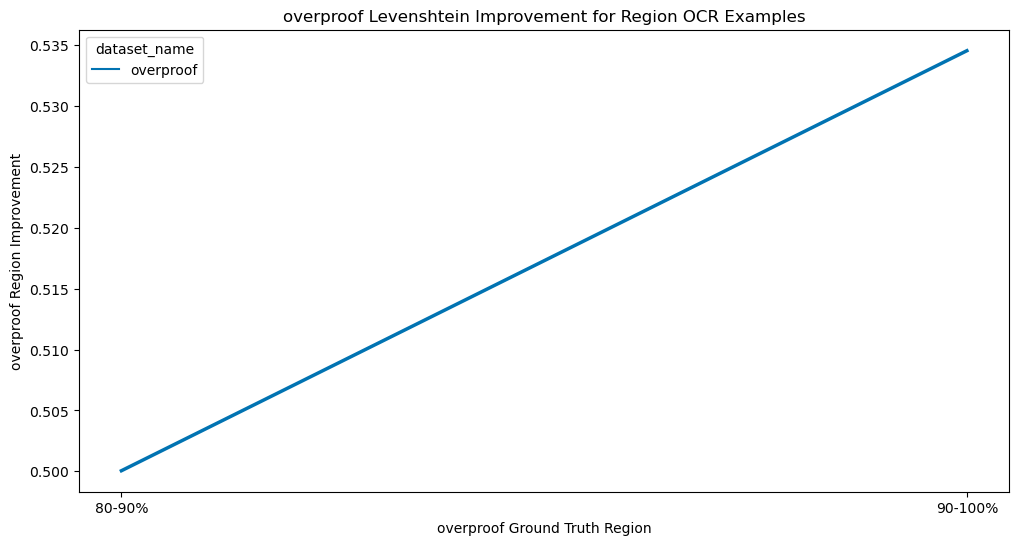

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof              0.000000
1               10-20%    overproof              0.125000
2               20-30%    overproof              0.156448
3               30-40%    overproof              0.175412
4               40-50%    overproof              0.346263


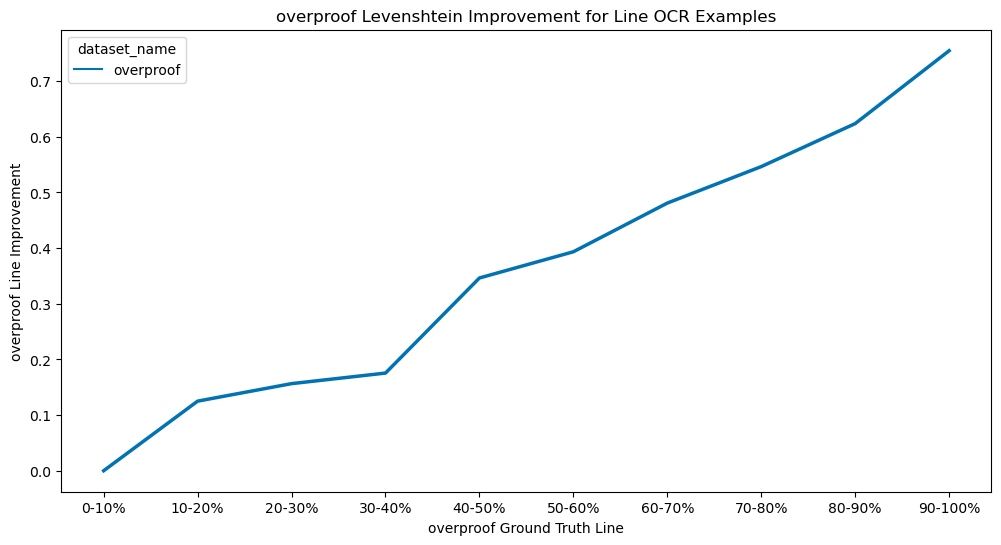

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.000000
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.411706


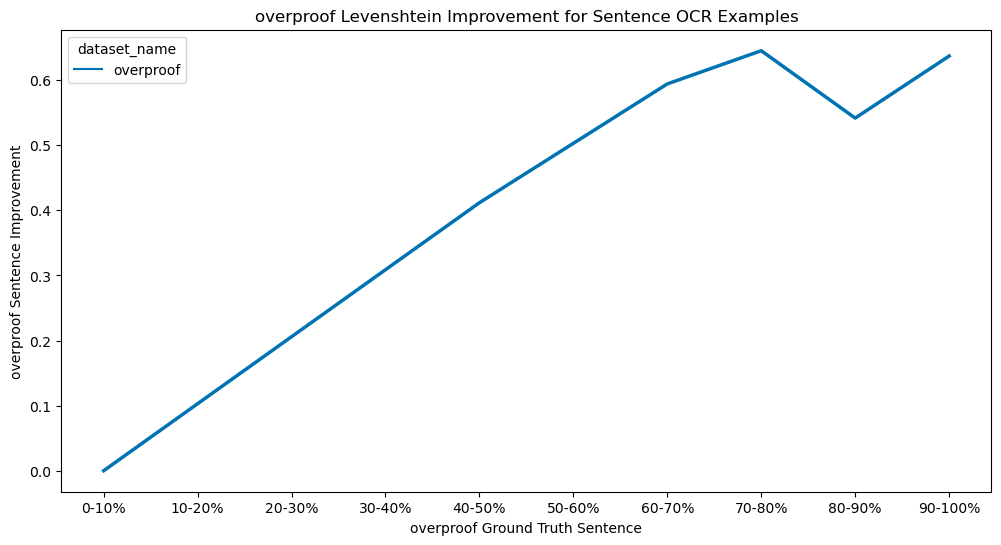

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


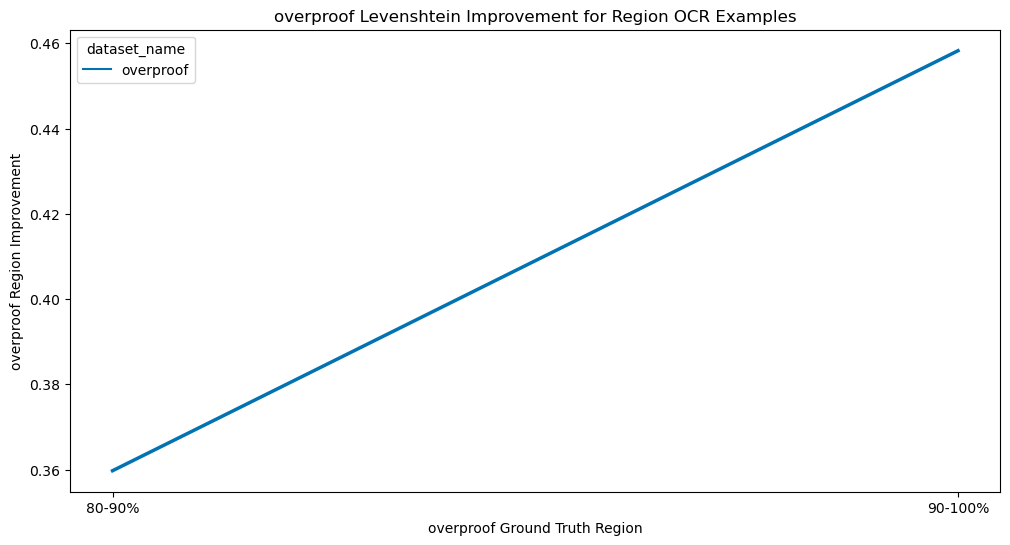

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.065041
1               10-20%    overproof              0.125000
2               20-30%    overproof              0.142292
3               30-40%    overproof              0.196311
4               40-50%    overproof              0.324202


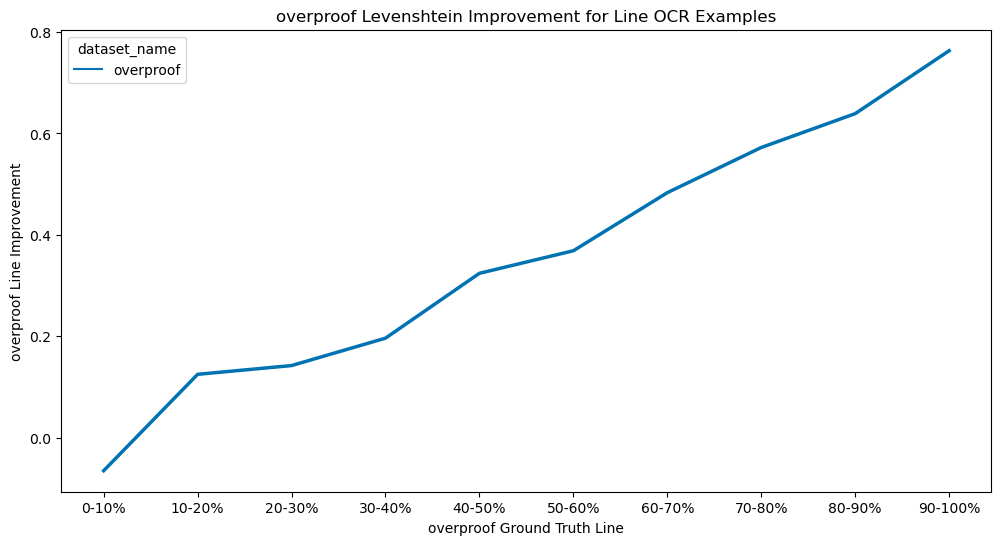

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.000000
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.445664


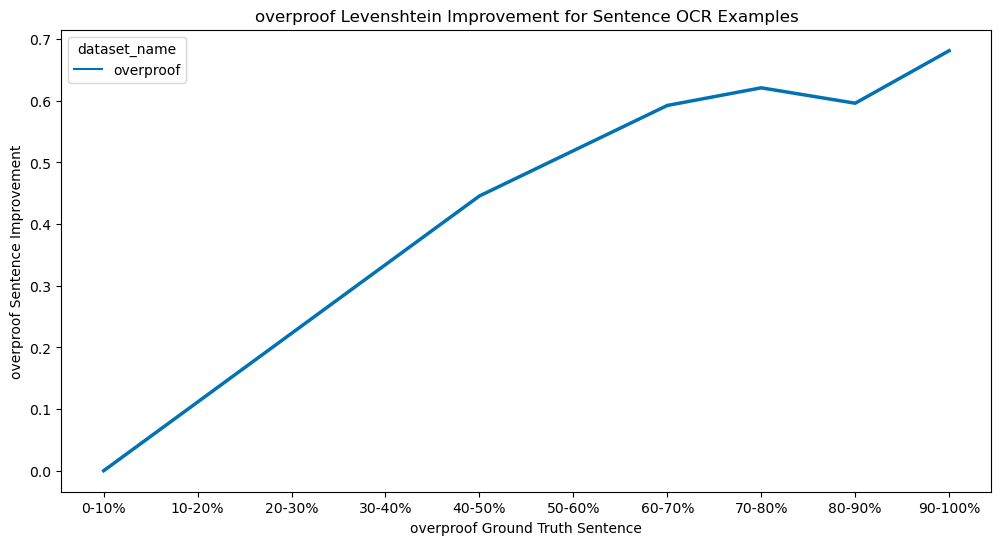

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


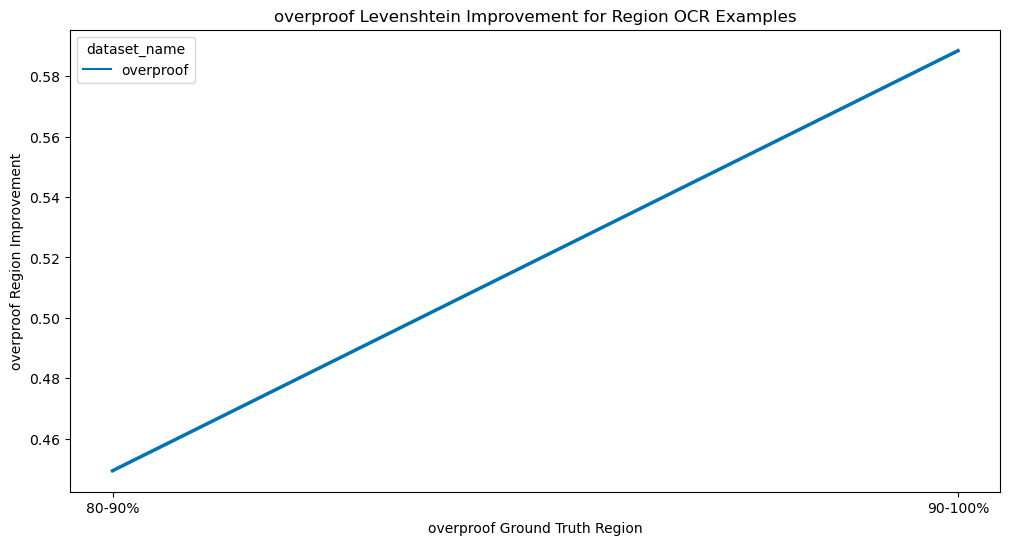

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.059259
1               10-20%    overproof              0.125000
2               20-30%    overproof              0.124579
3               30-40%    overproof              0.198890
4               40-50%    overproof              0.260294


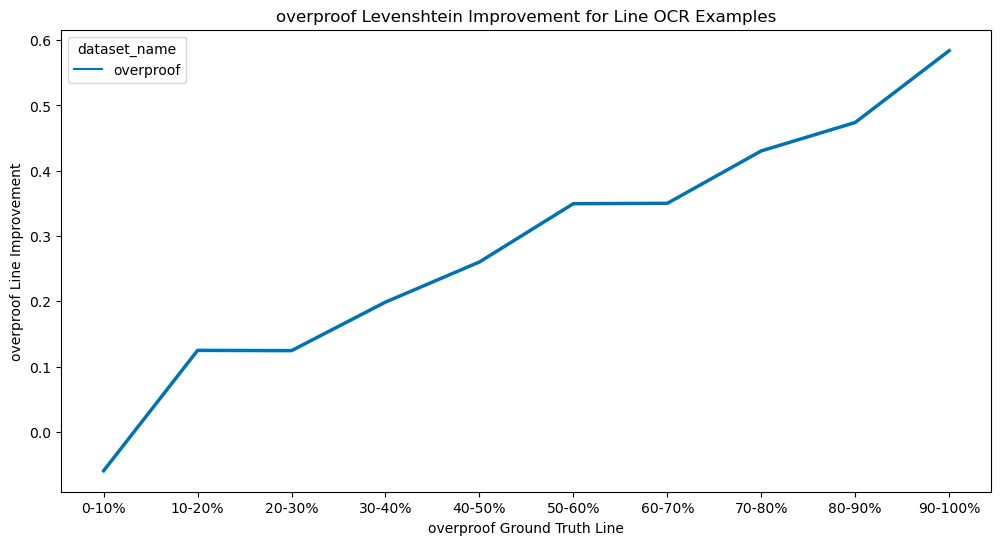

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                  0.000000
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.429361


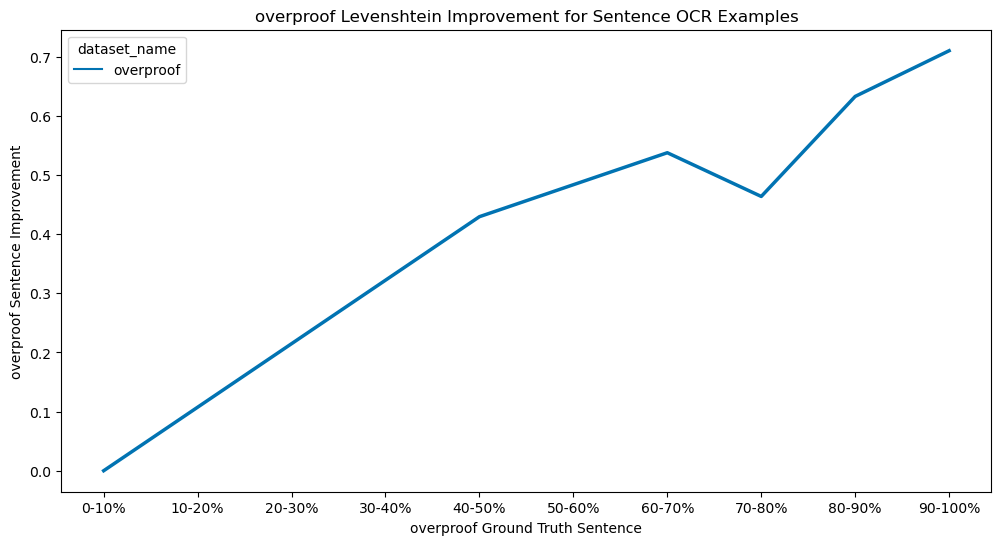

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


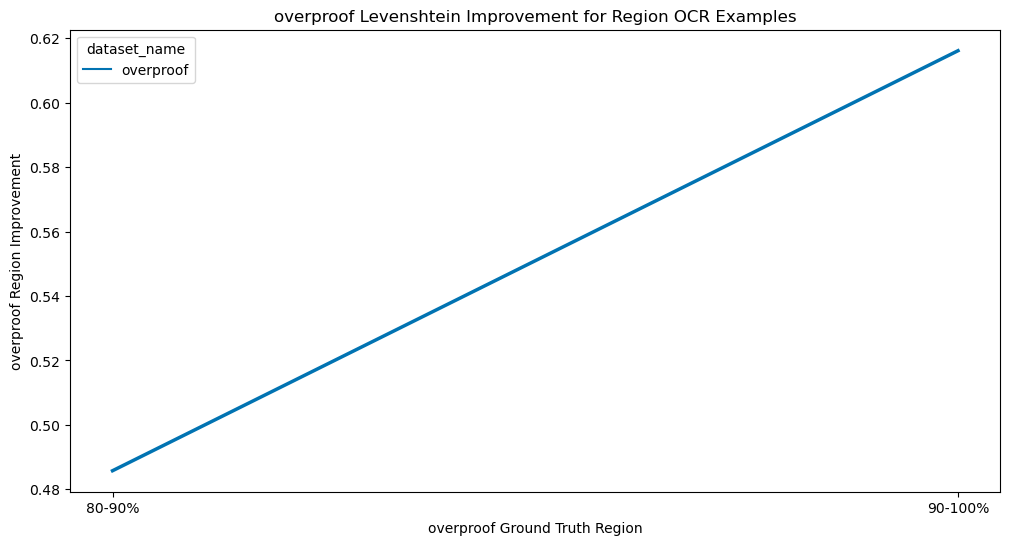

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%    overproof             -0.092593
1               10-20%    overproof              0.125000
2               20-30%    overproof              0.122727
3               30-40%    overproof             -0.046911
4               40-50%    overproof              0.316194


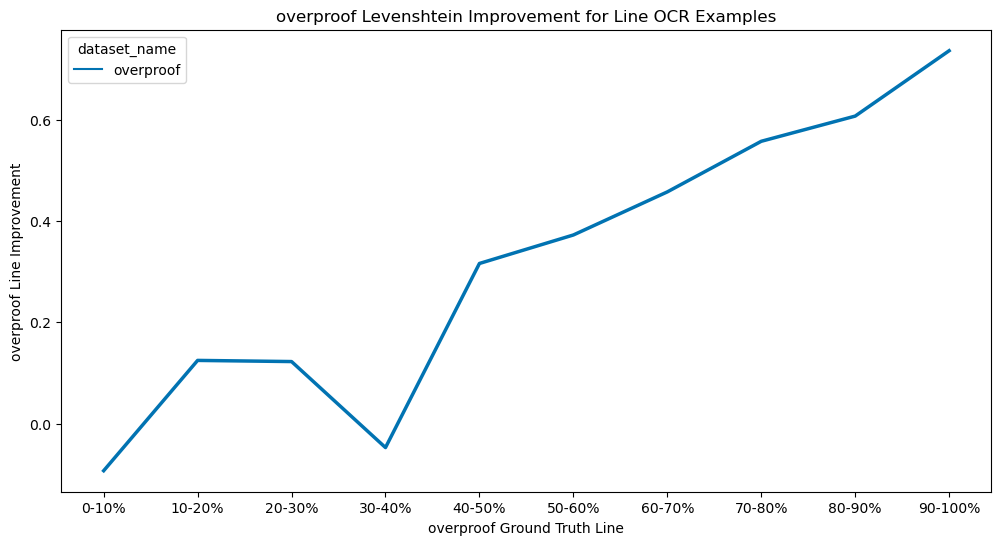

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%    overproof                 -0.034483
1                   10-20%    overproof                       NaN
2                   20-30%    overproof                       NaN
3                   30-40%    overproof                       NaN
4                   40-50%    overproof                  0.371696


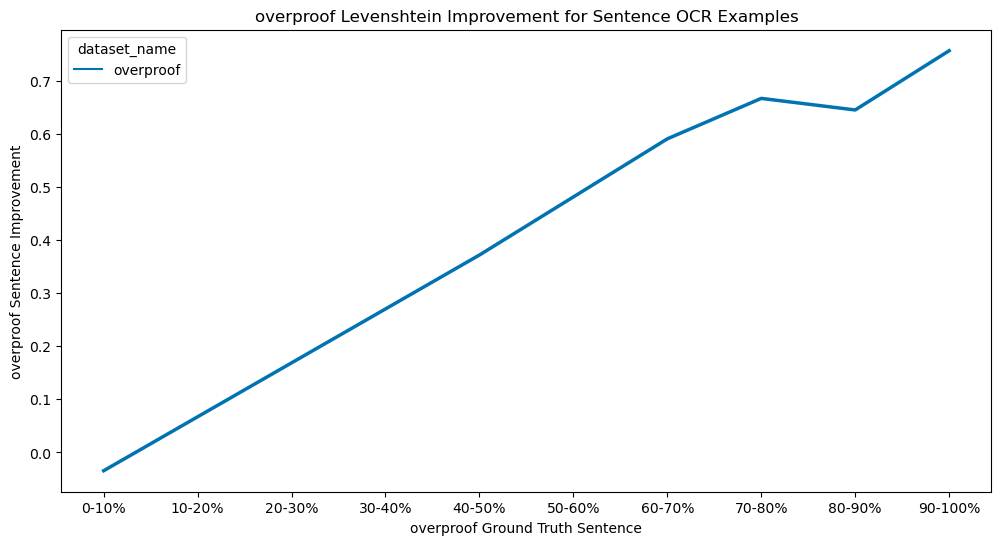

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%    overproof                     NaN
1                 10-20%    overproof                     NaN
2                 20-30%    overproof                     NaN
3                 30-40%    overproof                     NaN
4                 40-50%    overproof                     NaN


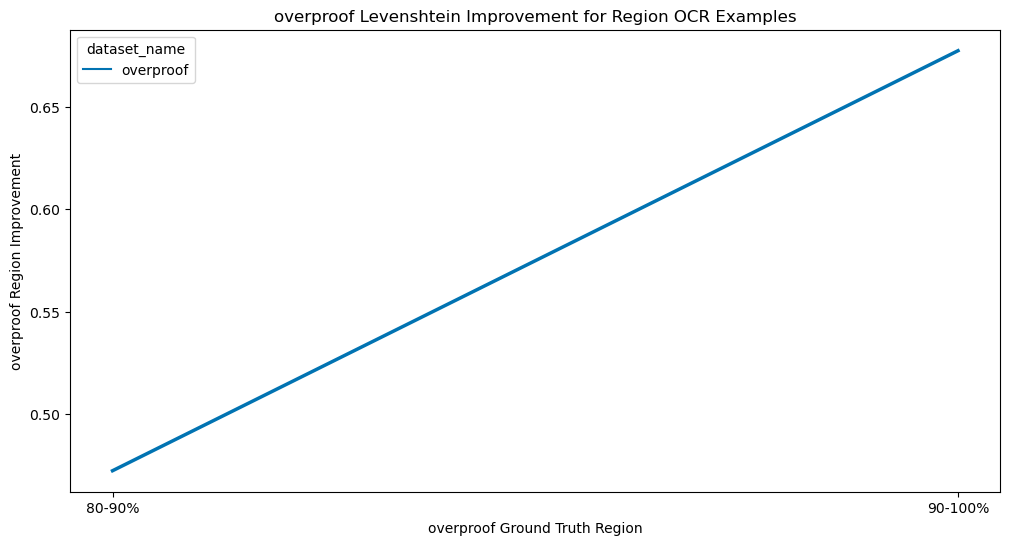

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.151316
2               20-30%        htrec              0.183191
3               30-40%        htrec              0.279144
4               40-50%        htrec              0.296073


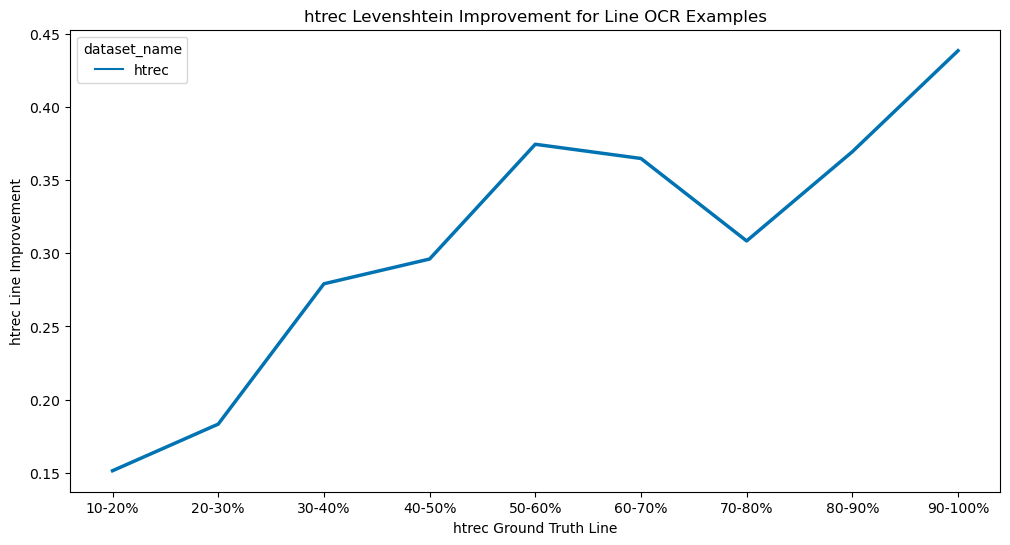

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.261261
4                   40-50%        htrec                       NaN


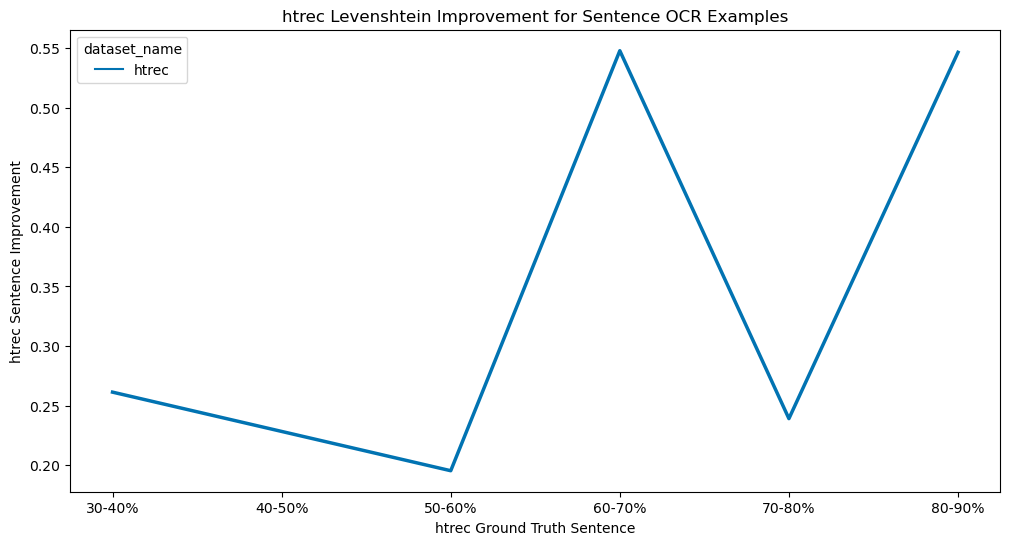

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.261261
4                 40-50%        htrec                     NaN


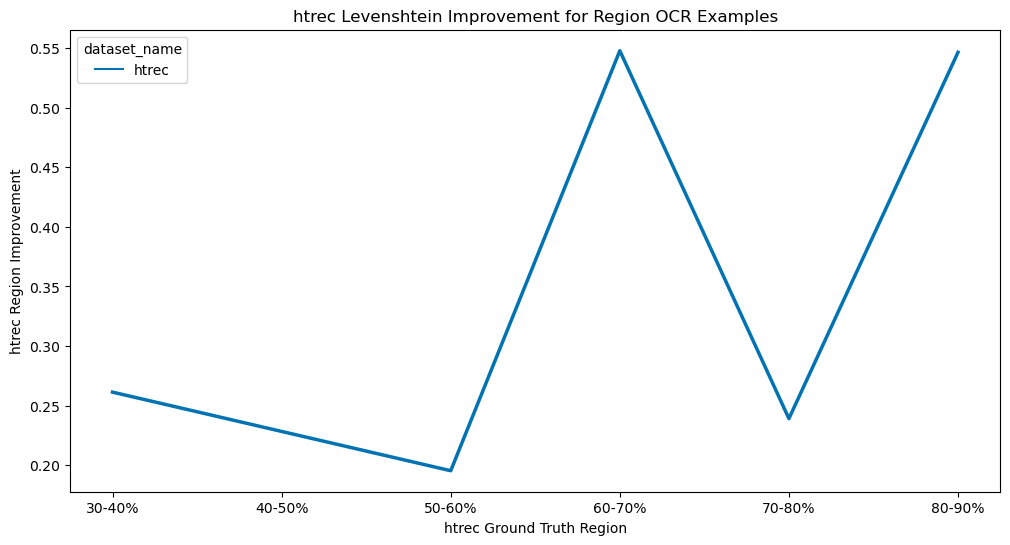

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.147173
2               20-30%        htrec              0.141263
3               30-40%        htrec              0.241540
4               40-50%        htrec              0.334539


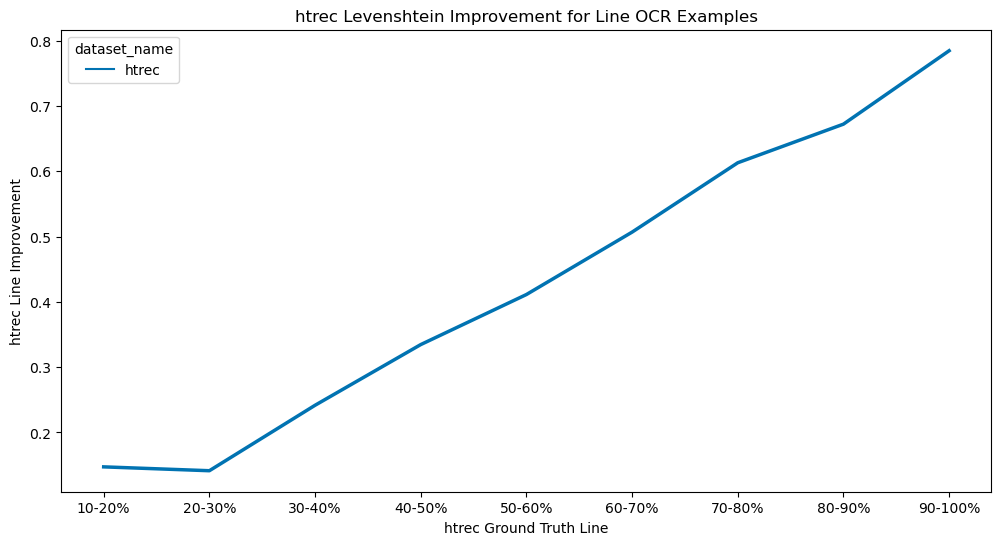

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.223724
4                   40-50%        htrec                       NaN


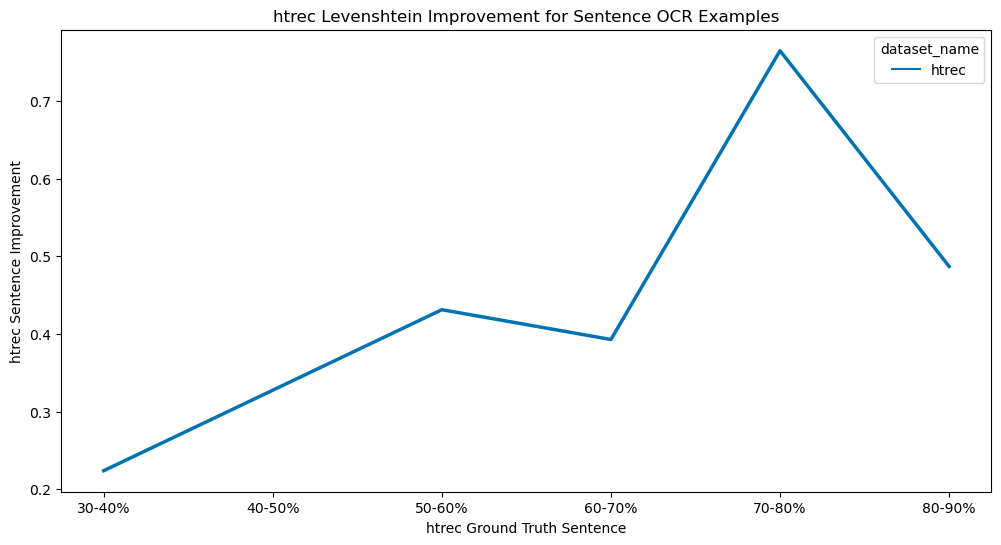

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.223724
4                 40-50%        htrec                     NaN


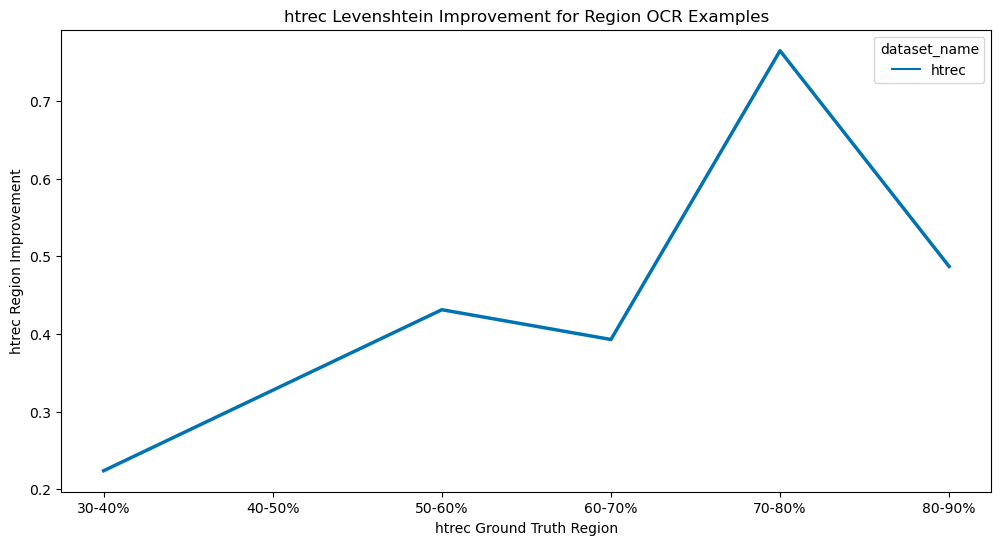

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.146332
2               20-30%        htrec              0.157188
3               30-40%        htrec              0.303930
4               40-50%        htrec              0.369831


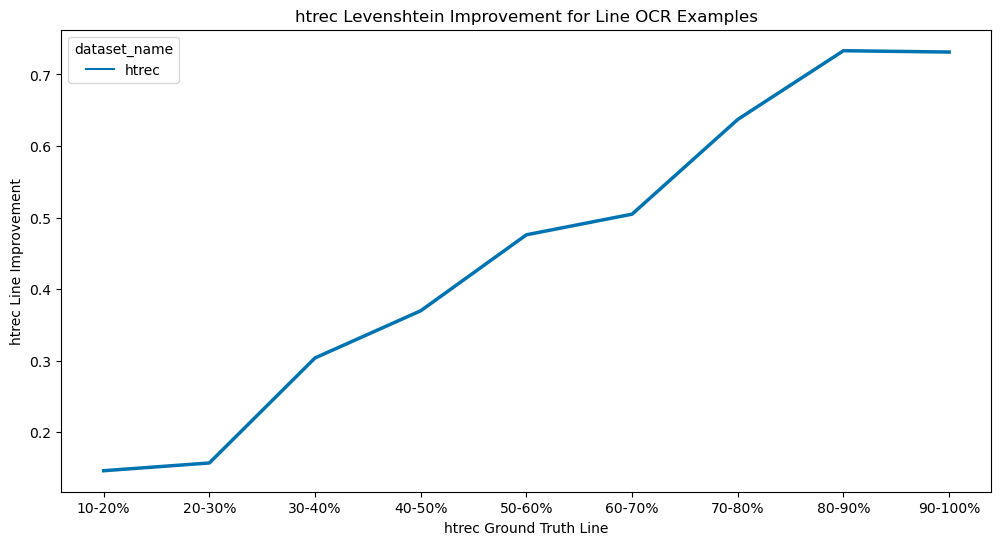

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.243506
4                   40-50%        htrec                       NaN


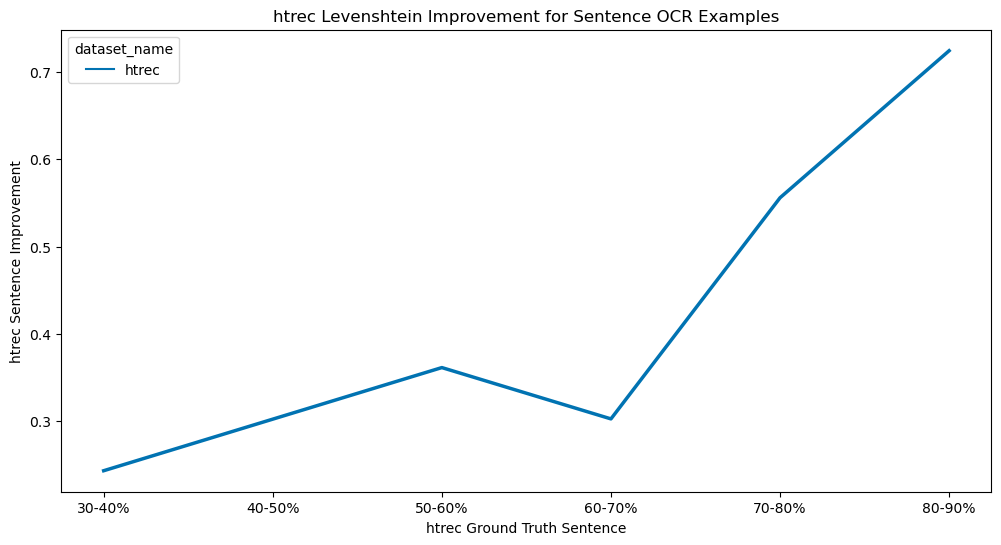

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.243506
4                 40-50%        htrec                     NaN


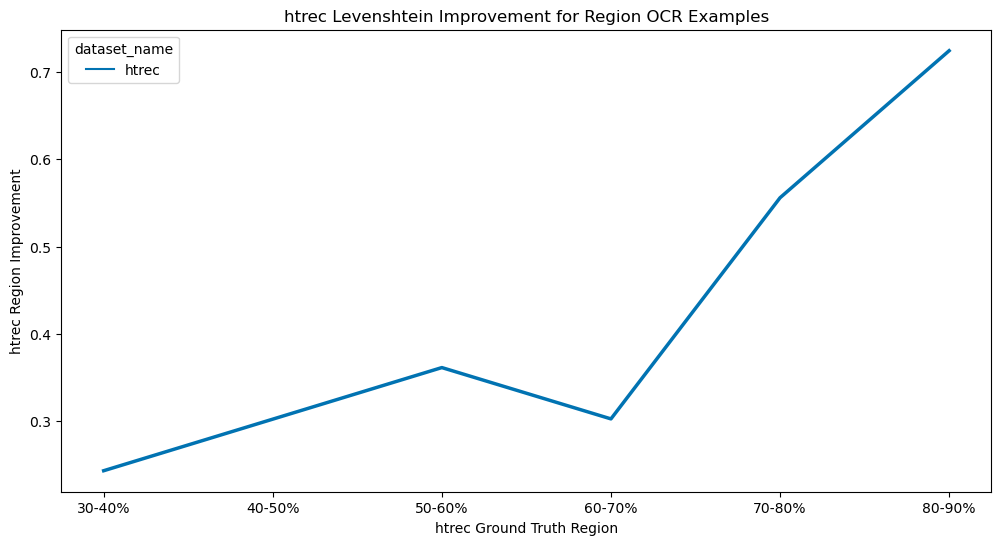

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.070286
2               20-30%        htrec              0.142216
3               30-40%        htrec              0.267550
4               40-50%        htrec              0.364119


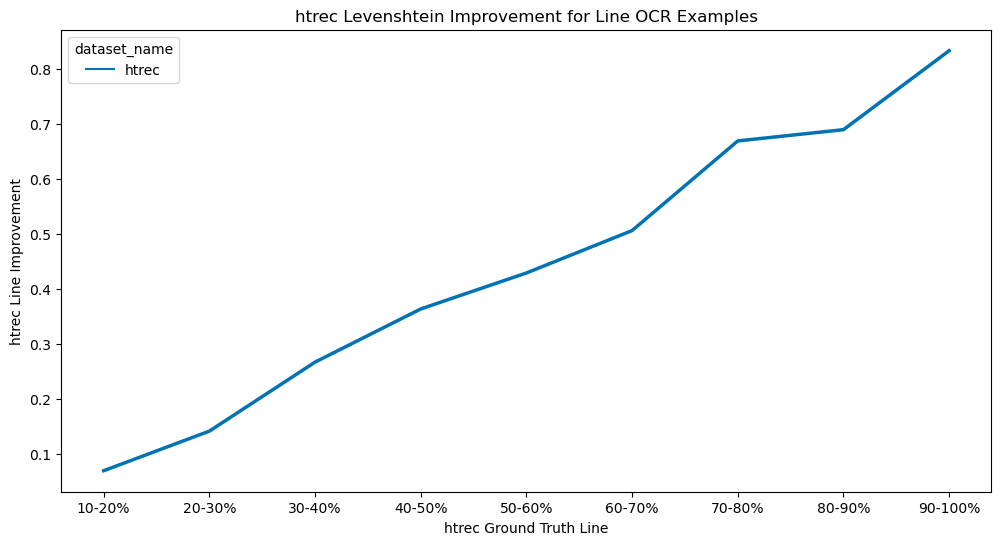

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.171171
4                   40-50%        htrec                       NaN


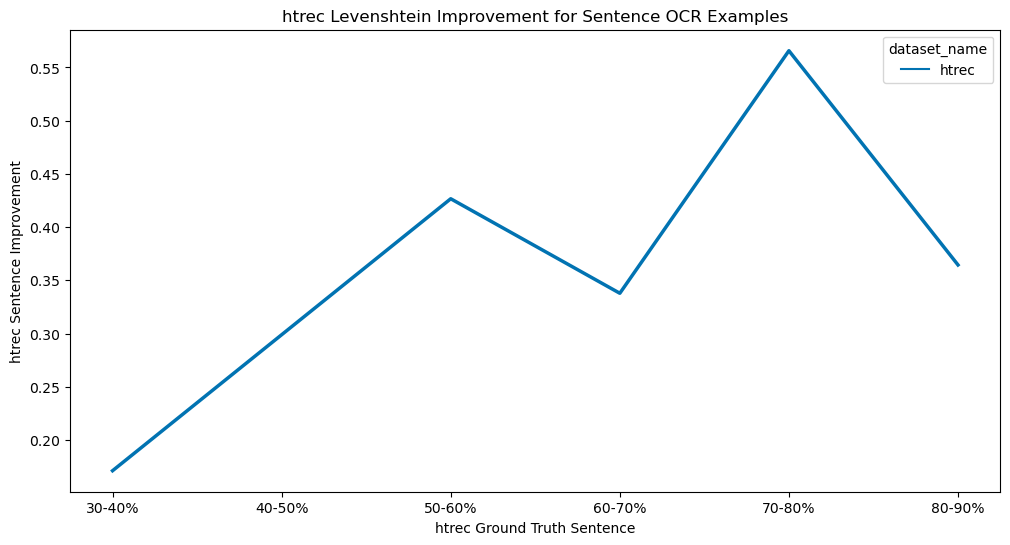

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.171171
4                 40-50%        htrec                     NaN


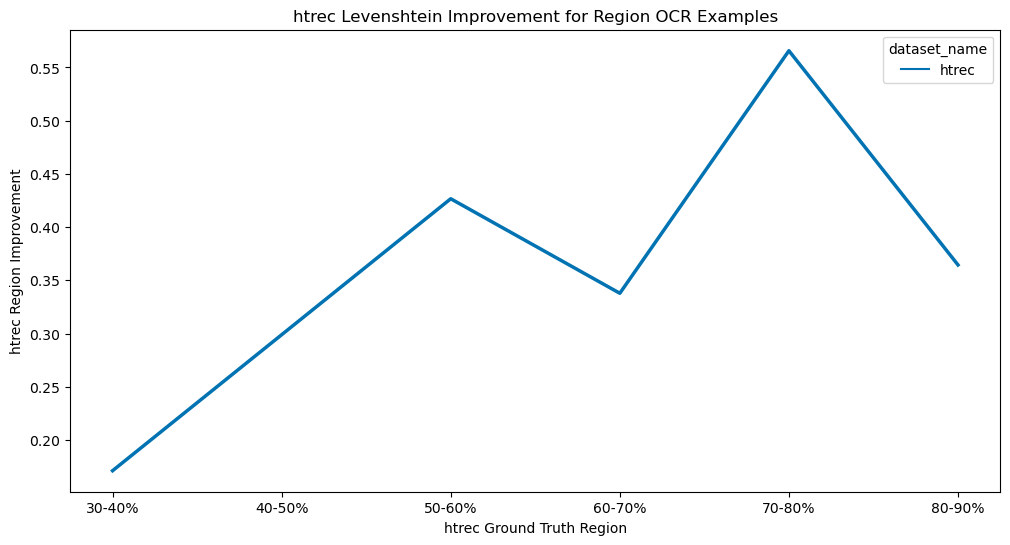

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.086650
2               20-30%        htrec              0.179167
3               30-40%        htrec              0.298208
4               40-50%        htrec              0.356982


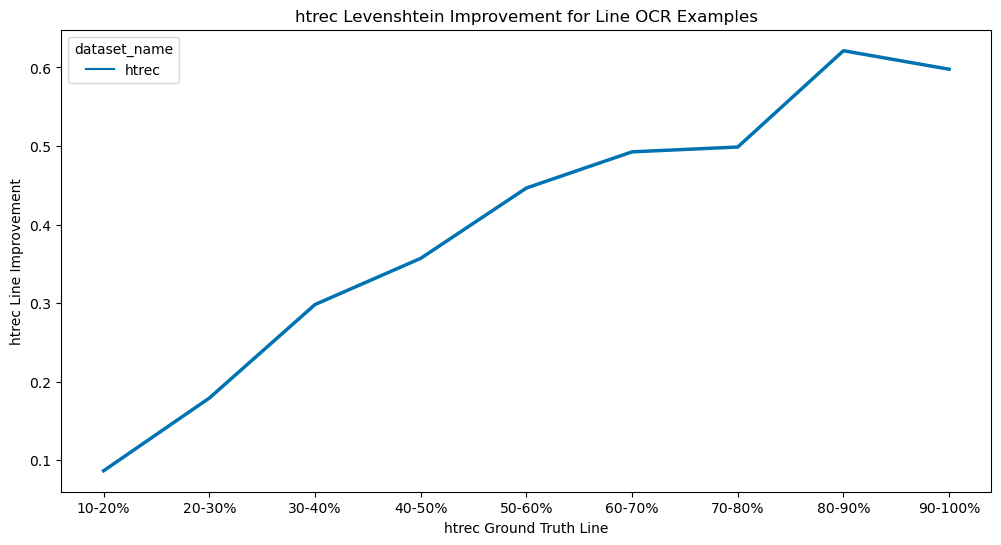

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.309309
4                   40-50%        htrec                       NaN


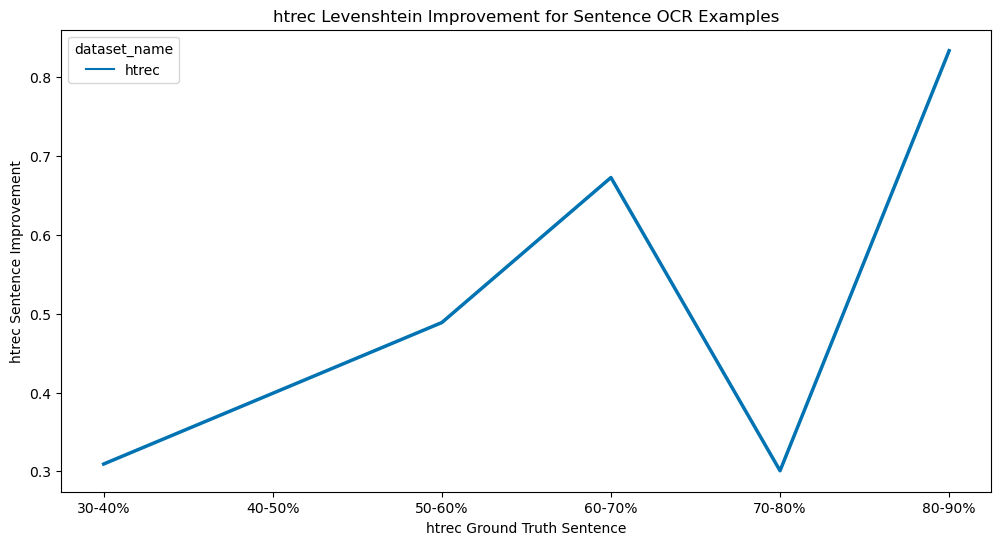

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.309309
4                 40-50%        htrec                     NaN


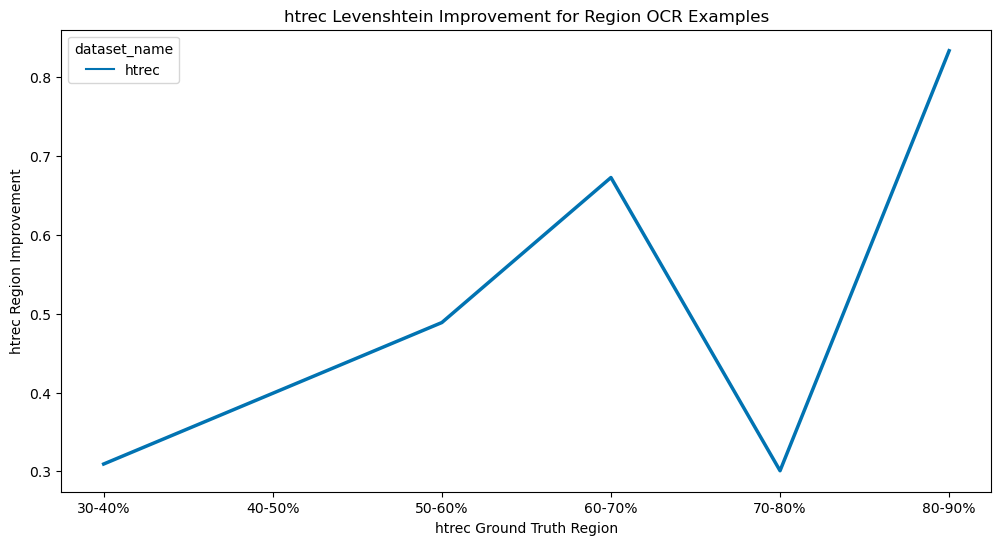

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.059211
2               20-30%        htrec              0.137489
3               30-40%        htrec              0.235366
4               40-50%        htrec              0.322780


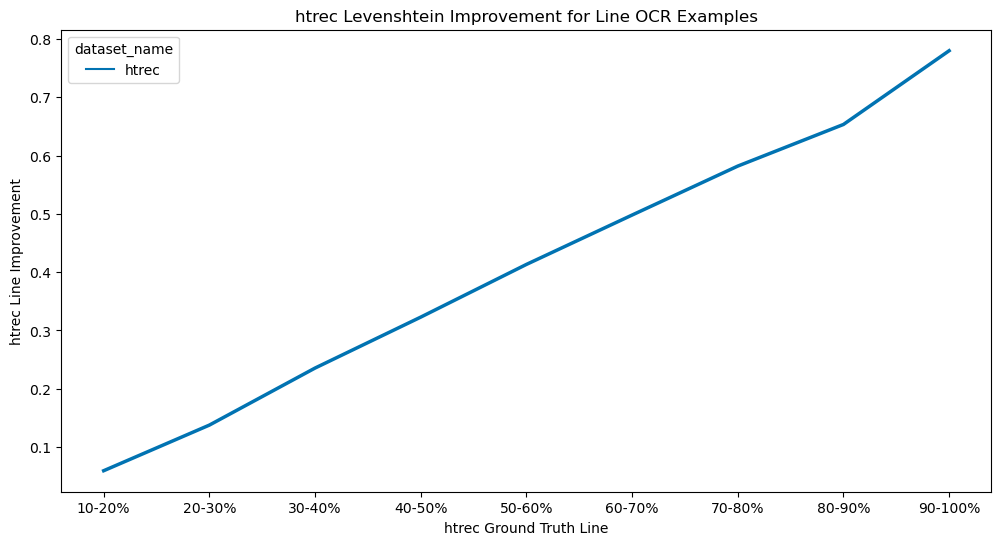

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.212372
4                   40-50%        htrec                       NaN


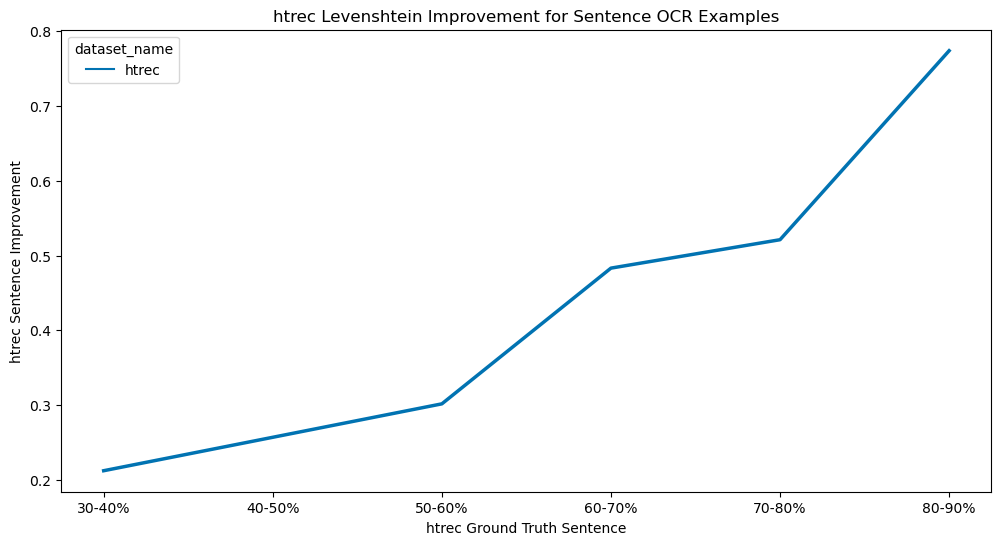

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.212372
4                 40-50%        htrec                     NaN


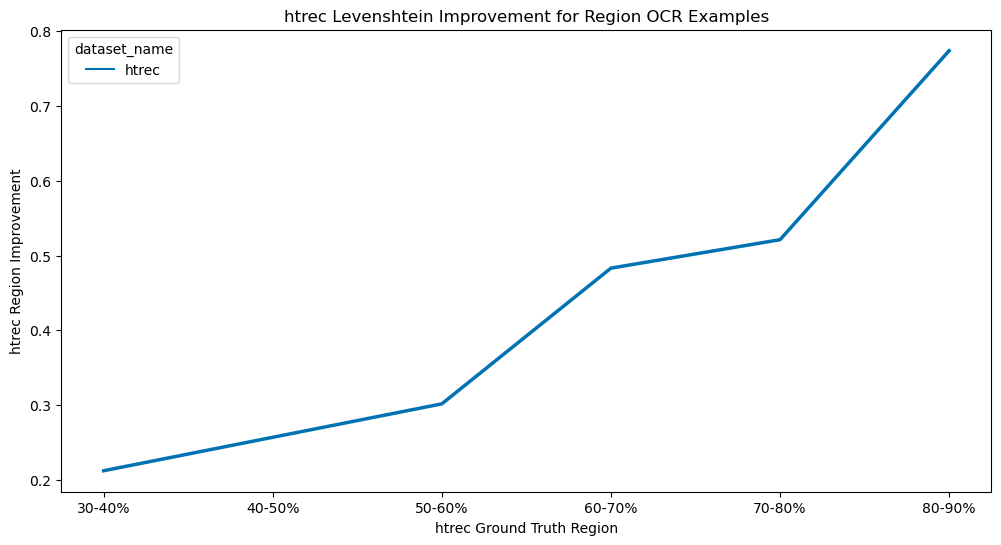

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.157615
2               20-30%        htrec              0.124839
3               30-40%        htrec              0.246324
4               40-50%        htrec              0.362368


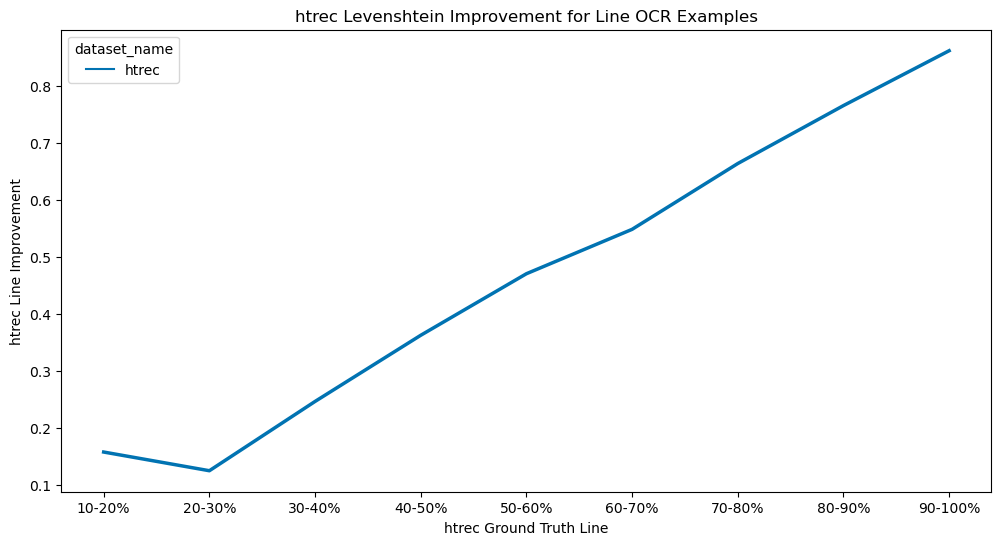

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.303745
4                   40-50%        htrec                       NaN


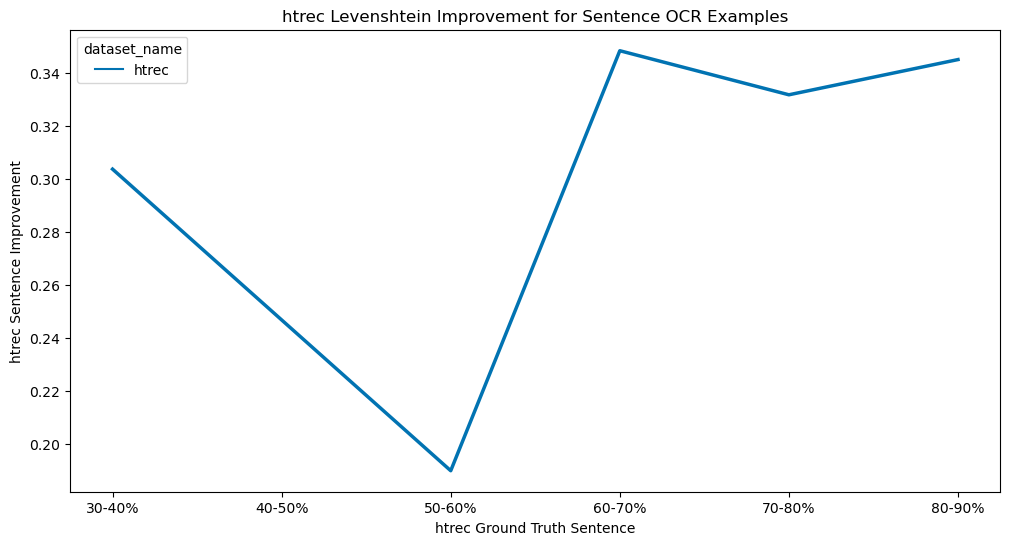

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.303745
4                 40-50%        htrec                     NaN


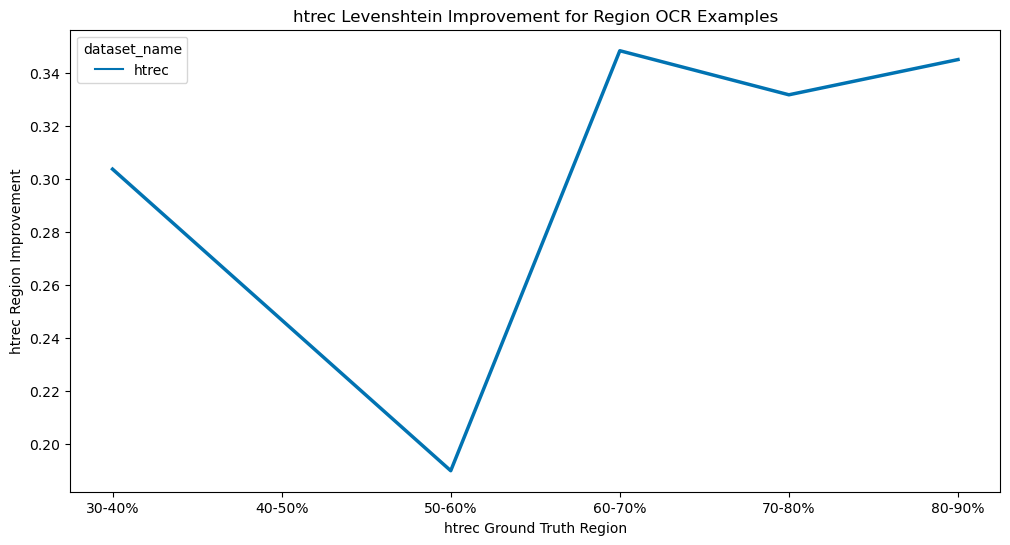

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%        htrec                   NaN
1               10-20%        htrec              0.153907
2               20-30%        htrec              0.156195
3               30-40%        htrec              0.177687
4               40-50%        htrec              0.296599


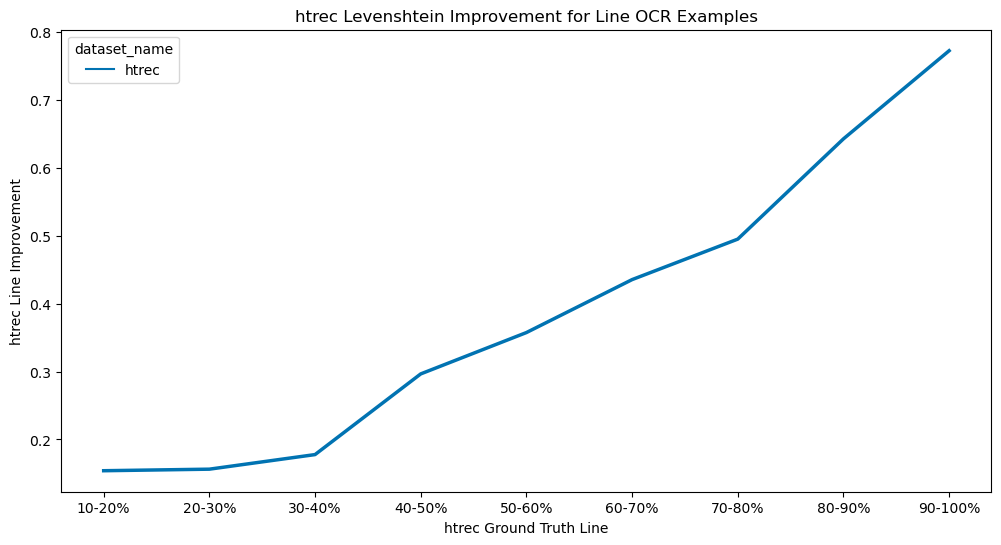

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%        htrec                       NaN
1                   10-20%        htrec                       NaN
2                   20-30%        htrec                       NaN
3                   30-40%        htrec                  0.318609
4                   40-50%        htrec                       NaN


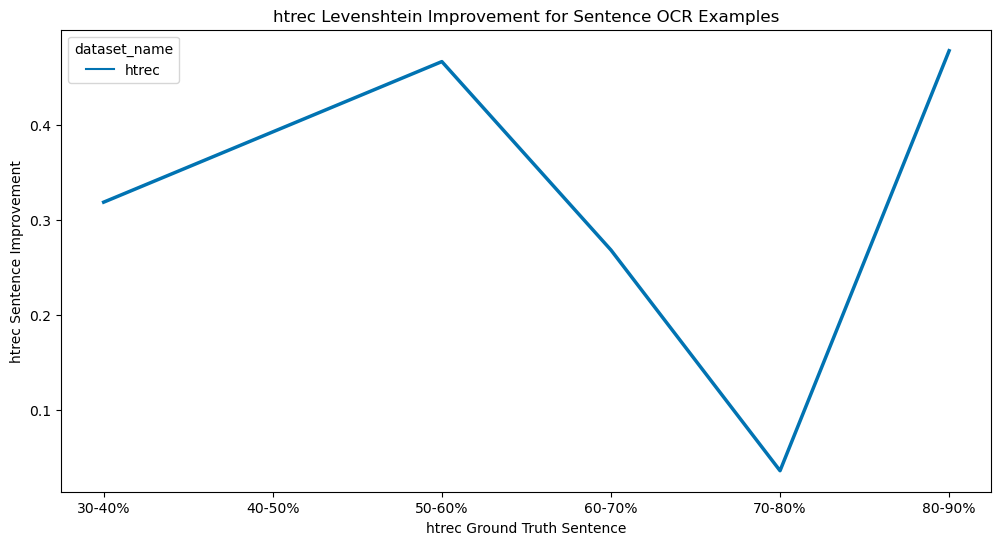

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%        htrec                     NaN
1                 10-20%        htrec                     NaN
2                 20-30%        htrec                     NaN
3                 30-40%        htrec                0.318609
4                 40-50%        htrec                     NaN


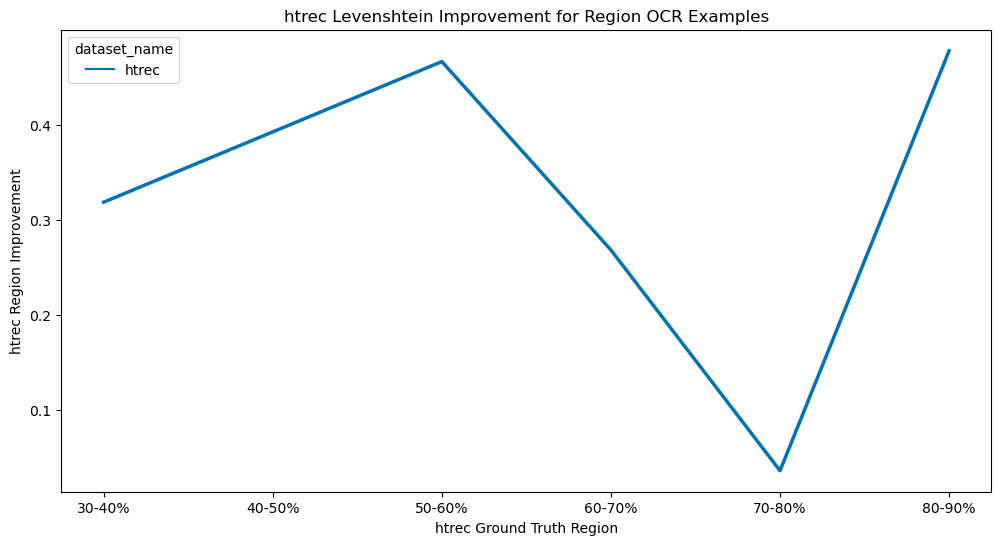

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.049195
1               10-20%   ajmc-mixed             -0.007904
2               20-30%   ajmc-mixed              0.064834
3               30-40%   ajmc-mixed              0.181261
4               40-50%   ajmc-mixed              0.338653


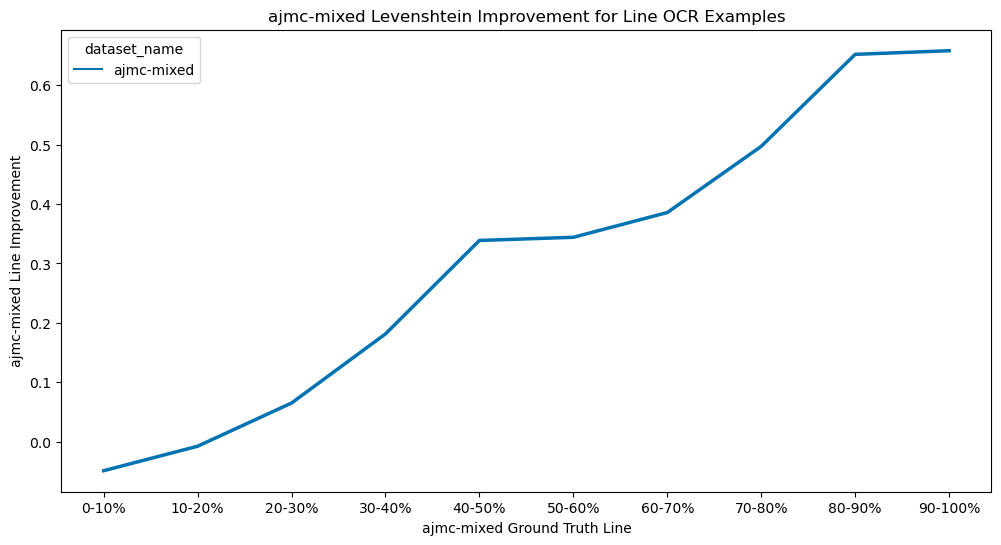

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.051055
1                   10-20%   ajmc-mixed                  0.051765
2                   20-30%   ajmc-mixed                  0.116641
3                   30-40%   ajmc-mixed                  0.231966
4                   40-50%   ajmc-mixed                  0.388201


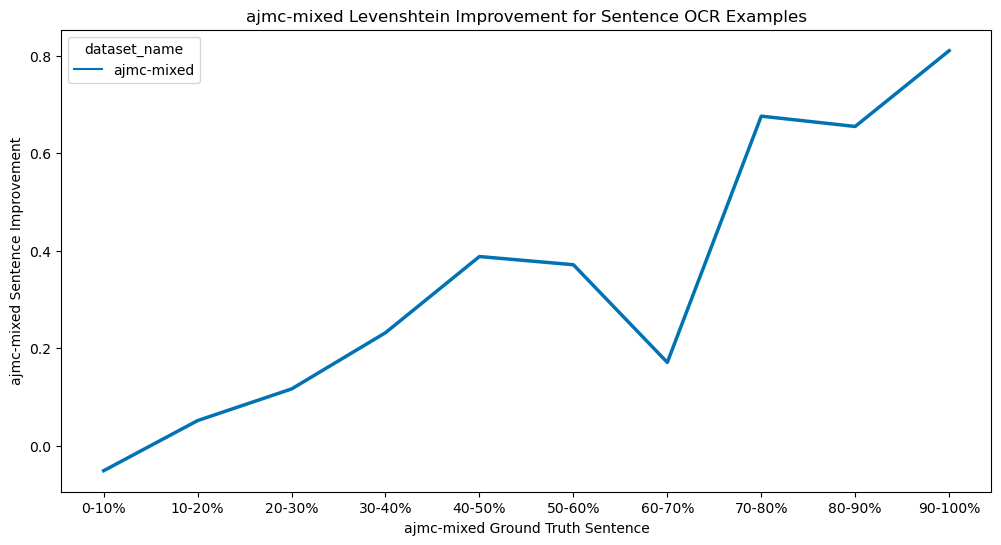

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.189649
4                 40-50%   ajmc-mixed                0.431838


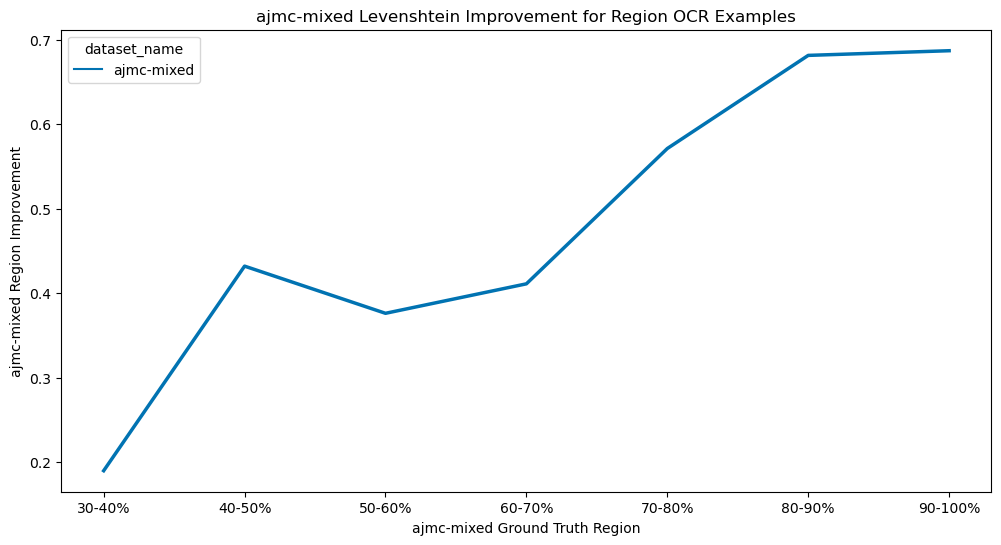

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.053850
1               10-20%   ajmc-mixed             -0.003358
2               20-30%   ajmc-mixed              0.089748
3               30-40%   ajmc-mixed              0.197676
4               40-50%   ajmc-mixed              0.427504


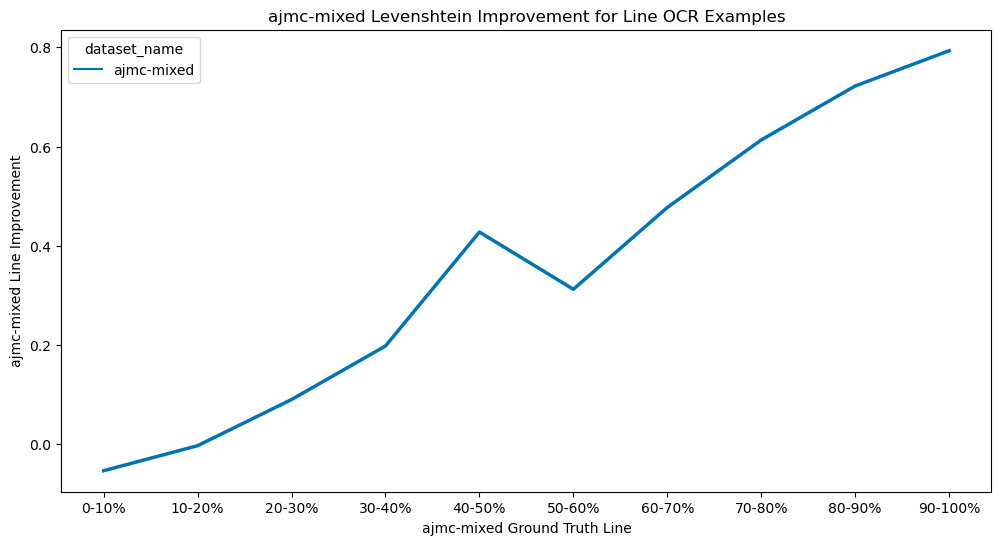

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.047440
1                   10-20%   ajmc-mixed                  0.104601
2                   20-30%   ajmc-mixed                  0.122182
3                   30-40%   ajmc-mixed                  0.286839
4                   40-50%   ajmc-mixed                  0.480087


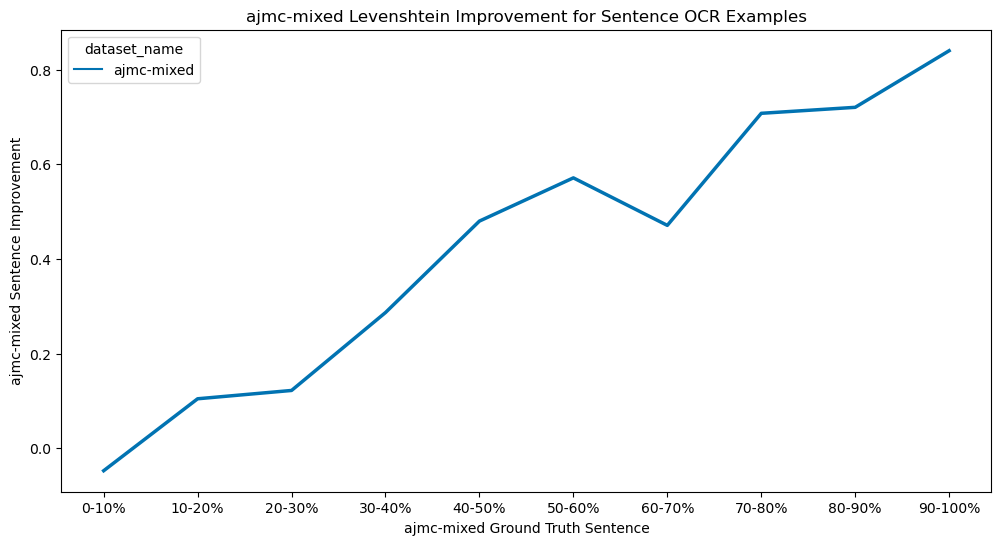

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.240273
4                 40-50%   ajmc-mixed                0.373556


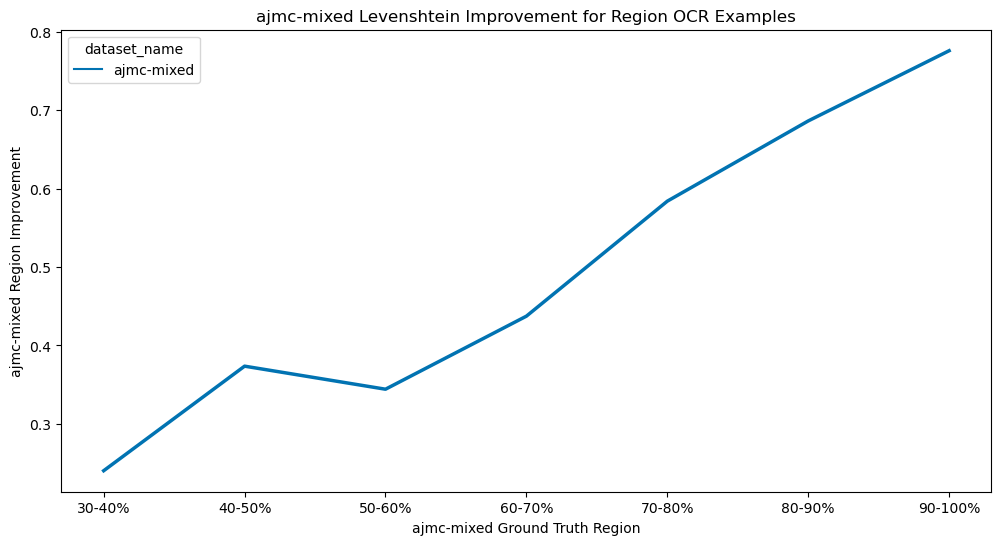

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.058739
1               10-20%   ajmc-mixed              0.007294
2               20-30%   ajmc-mixed              0.084954
3               30-40%   ajmc-mixed              0.222301
4               40-50%   ajmc-mixed              0.379230


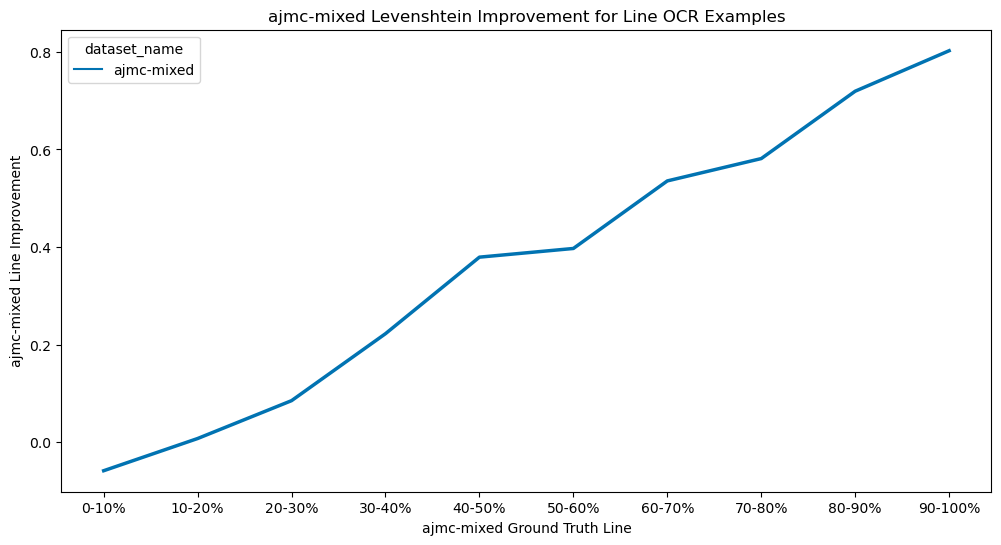

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.041431
1                   10-20%   ajmc-mixed                  0.019283
2                   20-30%   ajmc-mixed                  0.103419
3                   30-40%   ajmc-mixed                  0.245755
4                   40-50%   ajmc-mixed                  0.475238


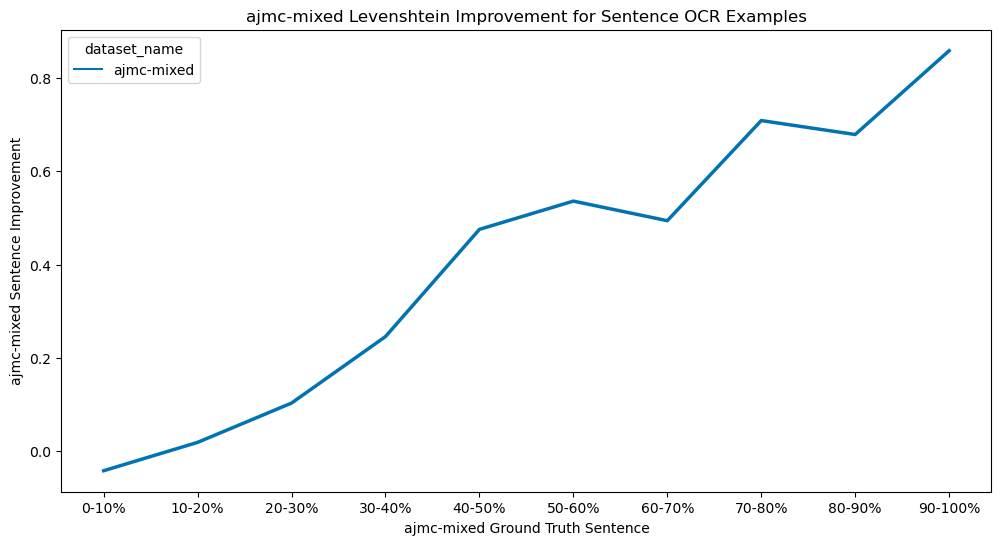

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.103813
4                 40-50%   ajmc-mixed                0.304442


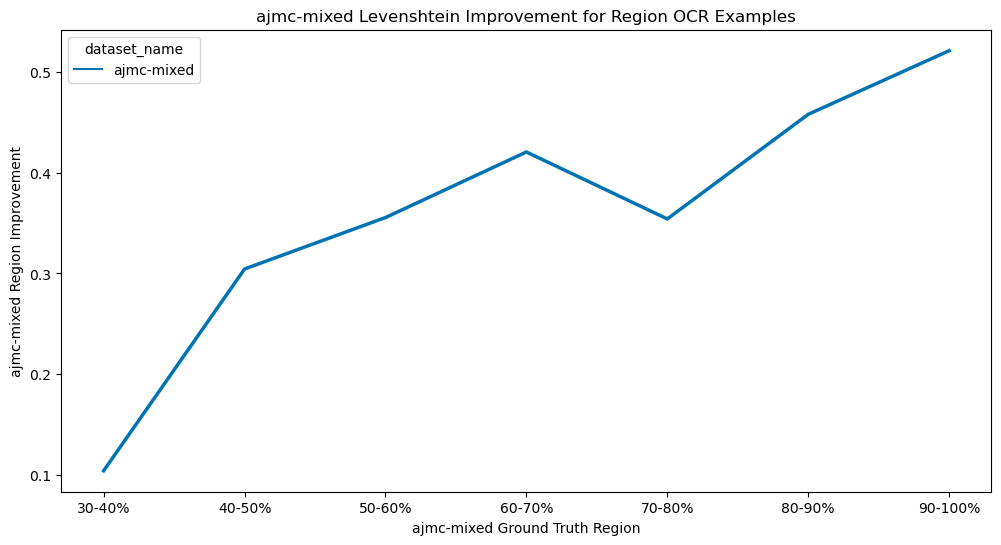

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.050761
1               10-20%   ajmc-mixed             -0.003819
2               20-30%   ajmc-mixed              0.087521
3               30-40%   ajmc-mixed              0.152120
4               40-50%   ajmc-mixed              0.323608


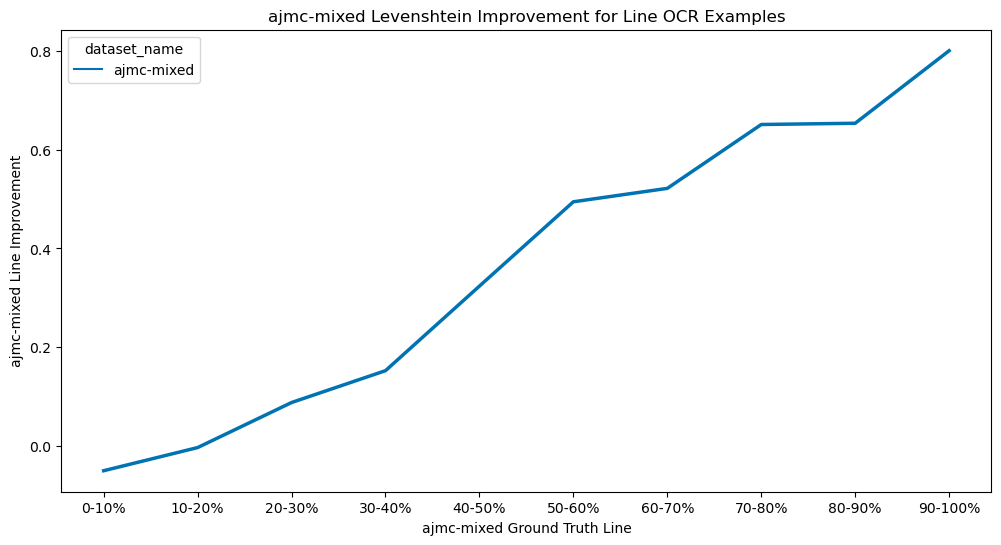

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.040857
1                   10-20%   ajmc-mixed                  0.033262
2                   20-30%   ajmc-mixed                  0.155979
3                   30-40%   ajmc-mixed                  0.286722
4                   40-50%   ajmc-mixed                  0.476720


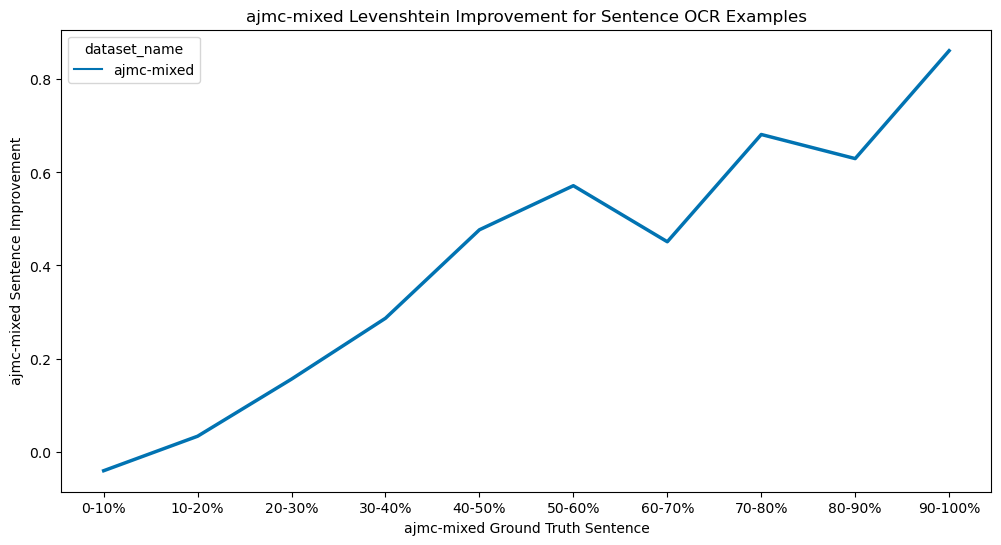

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.113890
4                 40-50%   ajmc-mixed                0.375768


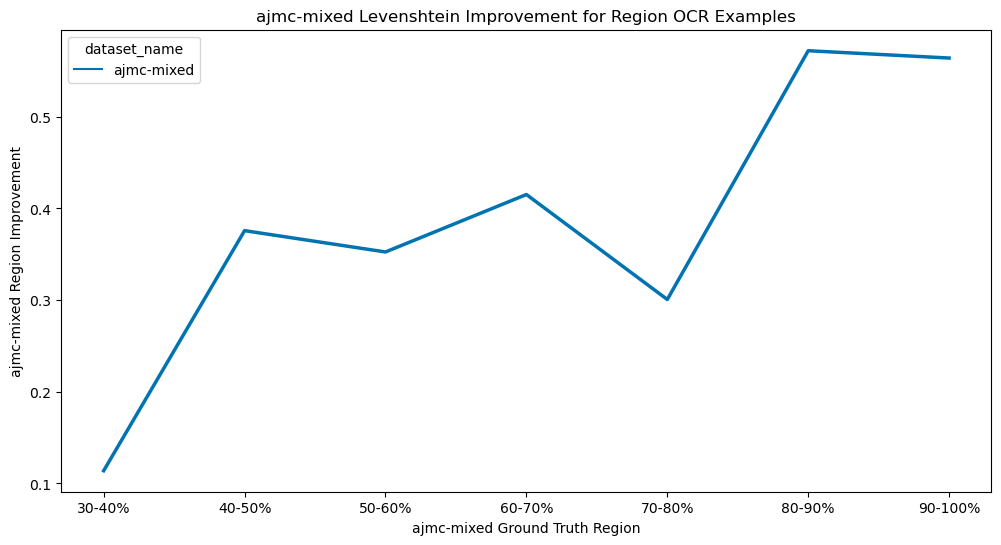

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.013767
1               10-20%   ajmc-mixed             -0.000966
2               20-30%   ajmc-mixed              0.013667
3               30-40%   ajmc-mixed              0.063369
4               40-50%   ajmc-mixed              0.134875


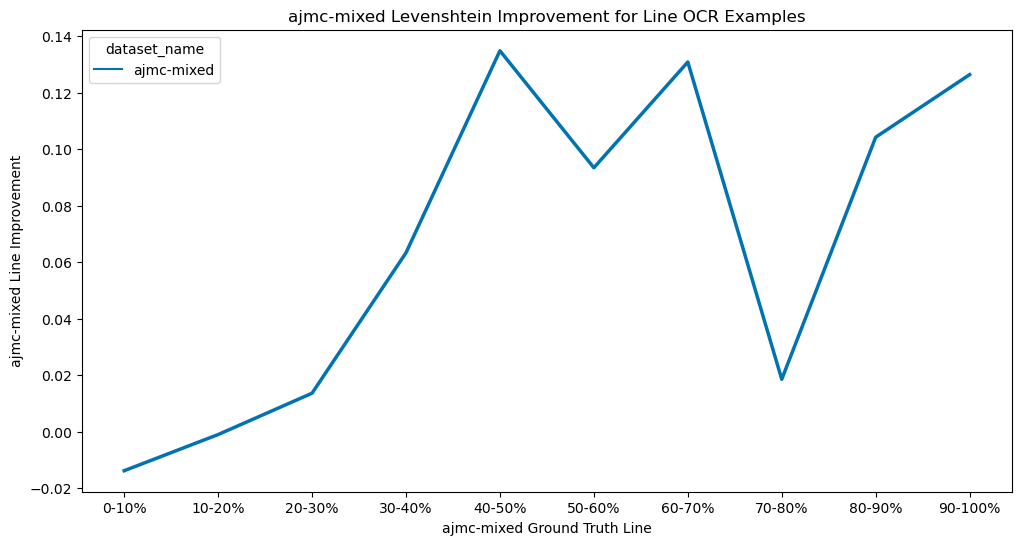

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.036265
1                   10-20%   ajmc-mixed                  0.036429
2                   20-30%   ajmc-mixed                  0.048189
3                   30-40%   ajmc-mixed                  0.088119
4                   40-50%   ajmc-mixed                  0.009524


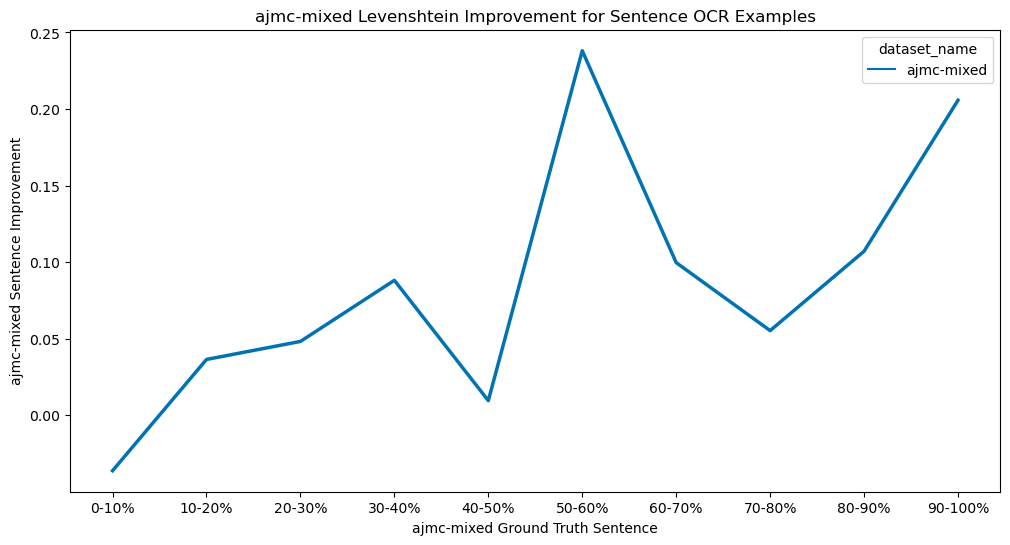

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.022352
4                 40-50%   ajmc-mixed               -0.050000


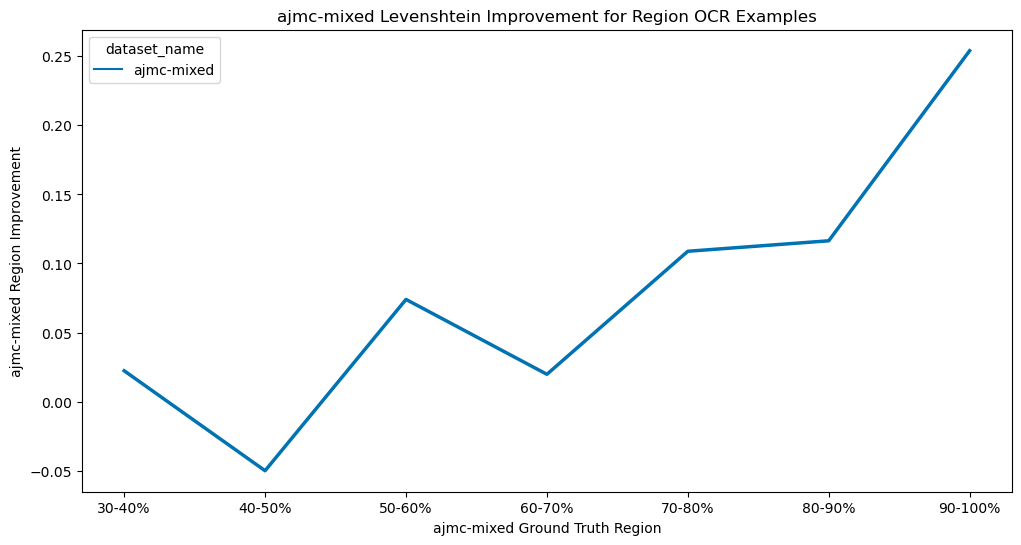

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.060282
1               10-20%   ajmc-mixed             -0.000813
2               20-30%   ajmc-mixed              0.082056
3               30-40%   ajmc-mixed              0.167133
4               40-50%   ajmc-mixed              0.199442


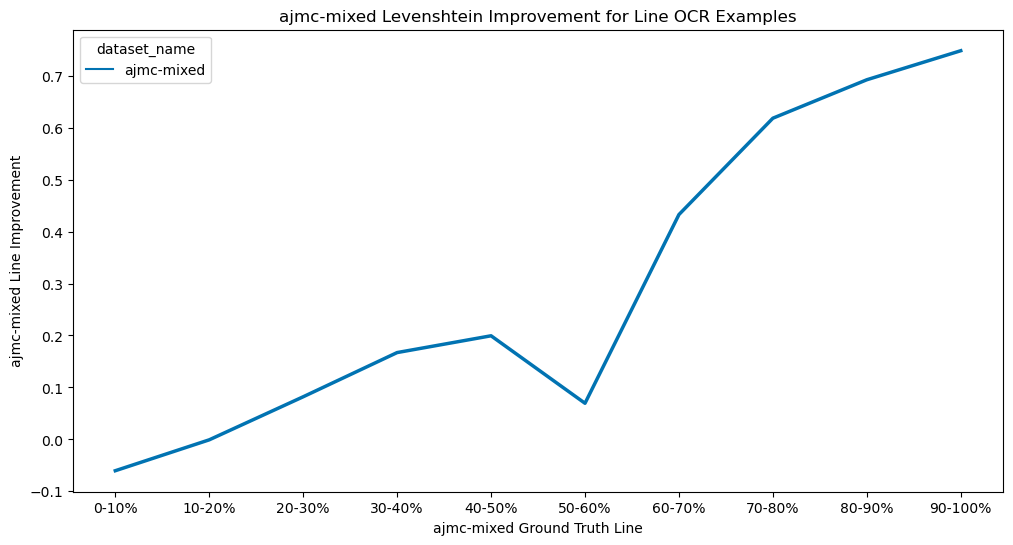

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.013758
1                   10-20%   ajmc-mixed                  0.036765
2                   20-30%   ajmc-mixed                  0.095335
3                   30-40%   ajmc-mixed                  0.253557
4                   40-50%   ajmc-mixed                  0.362698


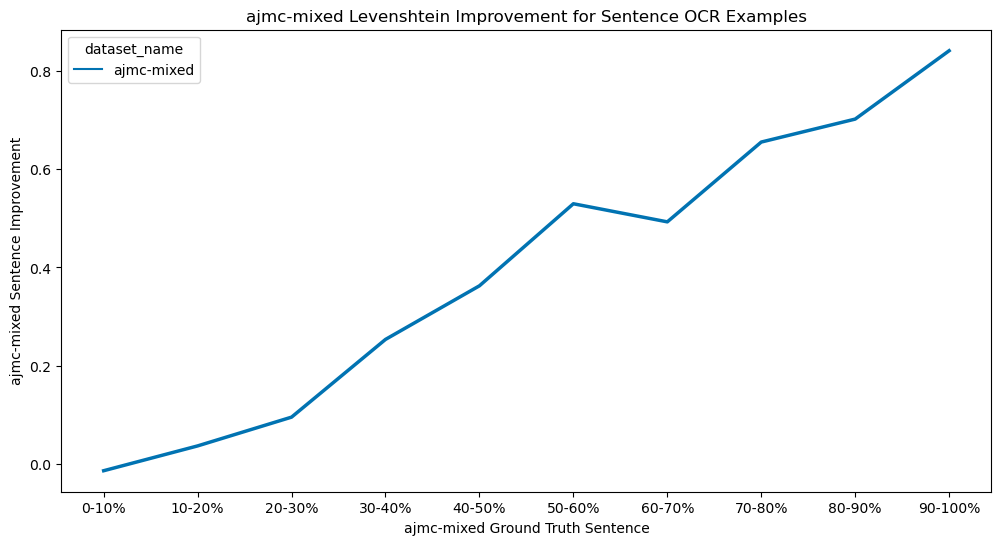

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.234485
4                 40-50%   ajmc-mixed                0.374020


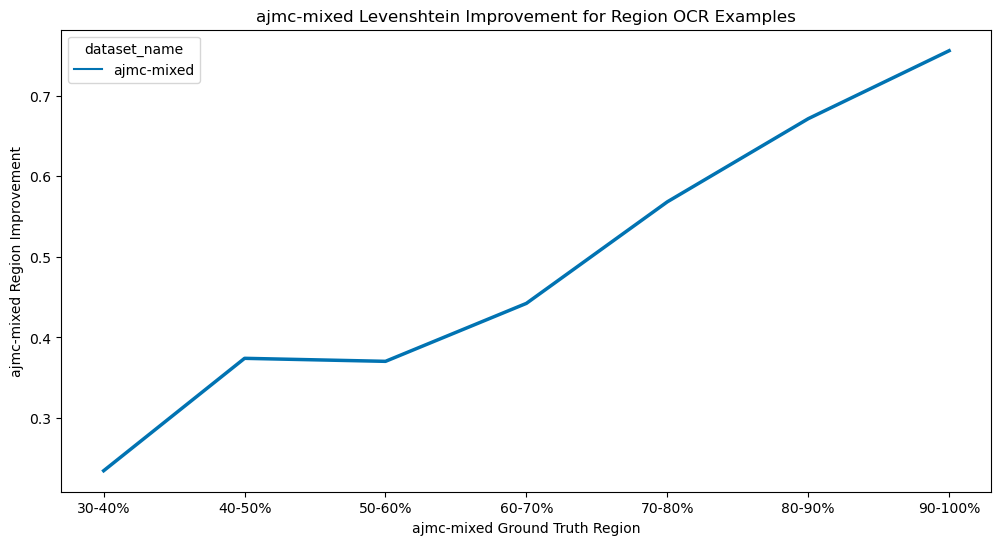

  line-ocr-noise-group dataset_name  line-lev-improvement
0                0-10%   ajmc-mixed             -0.044618
1               10-20%   ajmc-mixed             -0.001590
2               20-30%   ajmc-mixed              0.037087
3               30-40%   ajmc-mixed              0.065474
4               40-50%   ajmc-mixed              0.035748


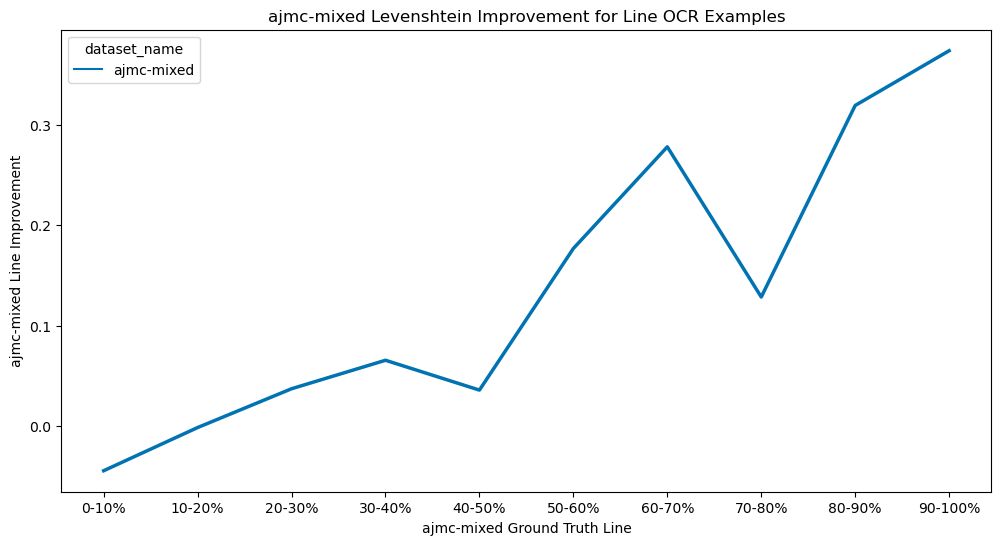

  sentence-ocr-noise-group dataset_name  sentence-lev-improvement
0                    0-10%   ajmc-mixed                 -0.057357
1                   10-20%   ajmc-mixed                  0.001145
2                   20-30%   ajmc-mixed                  0.100000
3                   30-40%   ajmc-mixed                  0.202623
4                   40-50%   ajmc-mixed                  0.444762


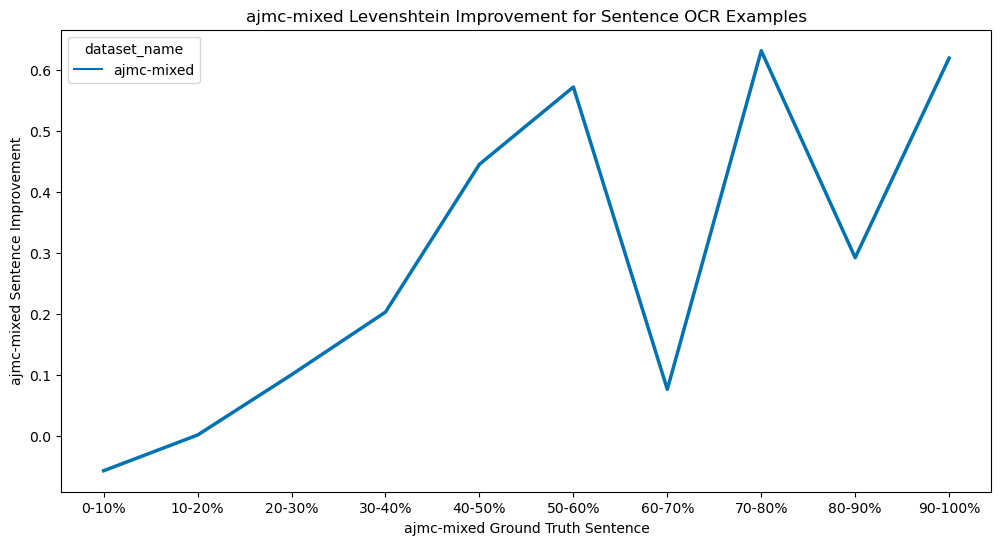

  region-ocr-noise-group dataset_name  region-lev-improvement
0                  0-10%   ajmc-mixed                     NaN
1                 10-20%   ajmc-mixed                     NaN
2                 20-30%   ajmc-mixed                     NaN
3                 30-40%   ajmc-mixed                0.259836
4                 40-50%   ajmc-mixed                0.032650


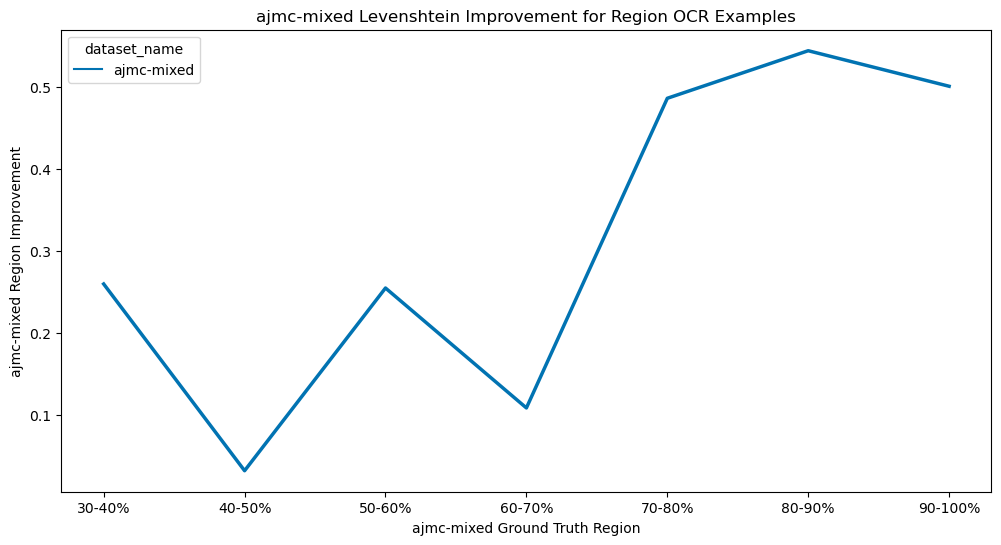

KeyError: 'line-ocr-noise-group'

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the colorblind color palette
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))

for result in results:
    
    dataset_name = result['dataset_name'].unique()[0]
    
    for segment_type in ['line', 'sentence', 'region']:
        
        #grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"]).size().reset_index(name="count")
        
        grouped_results = result.groupby([f"{segment_type}-ocr-noise-group", "dataset_name"])[f"{segment_type}-lev-improvement"].mean().reset_index()

        print(grouped_results.head())
        
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        _ = sns.lineplot(x=f"{segment_type}-ocr-noise-group", y=f'{segment_type}-lev-improvement', hue='dataset_name',
                 data=grouped_results, ax=ax, markers=True, linestyle='-', linewidth=2.5)


        # Set plot labels
        ax.set_xlabel(f"{dataset_name} Ground Truth {segment_type.capitalize()}")
        ax.set_ylabel(f"{dataset_name} {segment_type.capitalize()} Improvement")
        ax.set_title(f"{dataset_name} Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


        # Show the plot
        plt.show()

